# PROJECT  : Covid- 19 Vulnerability PROJECT

## Compiled by: Mashele G.P

## Data Description
* total_households:Total number of households in ward
* total_individuals :	Total number of individuals in ward
* target_pct_vunerable :	Percentage of large households who have to leave their premises for water
* dw_00	Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm
* dw_01	Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials
* dw_02	Percentage of dwellings of type: Flat or apartment in a block of flats
* dw_03	Percentage of dwellings of type: Cluster house in complex
* dw_04	Percentage of dwellings of type: Townhouse (semi-detached house in a complex)
* dw_05	Percentage of dwellings of type: Semi-detached house
* dw_06	Percentage of dwellings of type: House/flat/room in backyard
* dw_07	Percentage of dwellings of type: Informal dwelling (shack in backyard)
* dw_08	Percentage of dwellings of type: Informal dwelling (shack not in backyard e.g. in an informal/squatter settlement or on a farm)
* dw_09	Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat
* dw_10	Percentage of dwellings of type: Caravan/tent
* dw_11	Percentage of dwellings of type: Other
* dw_12	Percentage of dwellings of type: Unspecified
* dw_13	Percentage of dwellings of type: Not applicable
* psa_00	Percentage listing present school attendance as:  Yes
* psa_01	Percentage listing present school attendance as:  No
* psa_02	Percentage listing present school attendance as:  Do not know
* psa_03	Percentage listing present school attendance as:  Unspecified
* psa_04	Percentage listing present school attendance as:  Not applicable
* stv_00	Percentage of households with Satellite TV:  Yes
* stv_01	Percentage of households with Satellite TV:  No
* car_00	Percentage of households with a car:  Yes
* car_01	Percentage of households with a car:  No
* lln_00	Percentage listing landline ownership as:  Yes
* lln_01	Percentage listing landline ownership as:  No
* lan_00	Percentage listing language as:  Afrikaans
* lan_01	Percentage listing language as:  English
* lan_02	Percentage listing language as:  IsiNdebele
* lan_03	Percentage listing language as:  IsiXhosa
* lan_04	Percentage listing language as:  IsiZulu
* lan_05	Percentage listing language as:  Sepedi
* lan_06	Percentage listing language as:  Sesotho
* lan_07	Percentage listing language as:  Setswana
* lan_08	Percentage listing language as:  Sign language
* lan_09	Percentage listing language as:  SiSwati
* lan_10	Percentage listing language as:  Tshivenda
* lan_11	Percentage listing language as:  Xitsonga
* lan_12	Percentage listing language as:  Other
* lan_13	Percentage listing language as:  Unspecified
* lan_14	Percentage listing language as:  Not applicable
* pg_00	Percentage in population group:  Black African
* pg_01	Percentage in population group:  Coloured
* pg_02	Percentage in population group:  Indian or Asian
* pg_03	Percentage in population group:  White
* pg_04	Percentage in population group:  Other
* lgt_00	Percentage using electricity for lighting

In [ ]:
!pip3 install catboost

### Import the necessary libraries

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Libaries to assist with visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
# To tune model, get different metric scores, and split data
from sklearn.metrics import (mean_squared_error,mean_absolute_error,r2_score)
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
# To be used for data scaling 
from sklearn.preprocessing import StandardScaler
# To be used for categorical feature selection
from sklearn.feature_selection import chi2
# To oversample and undersample data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# To do hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To help with model building
from catboost import CatBoostRegressor
# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)
# To suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Now lets read the train and test  dataset
train_data = pd.read_csv('Covid_Train_data.csv')
test_data = pd.read_csv('Covid_Test_data.csv')

In [4]:
# Print the first five rows of the  train dataset
train_data.head()  

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,9D9BEUB,13569.978,39024.031,1.740,0.355,0.005,0.170,0.008,0.007,0.023,0.015,0.044,0.361,0.005,0.001,0.007,0,0,0.193,0.627,0.000,0.071,0.109,0.275,0.725,0.344,0.656,0.326,0.674,0.013,0.482,0.010,0.109,0.300,0.002,0.015,0.005,0.004,0.004,0.001,0.002,0.028,0,0.027,0.525,0.041,0.395,0.029,0.010,0.599
1,RERH3XM,13593.883,32879.946,1.993,0.262,0.002,0.078,0.001,0.001,0.004,0.100,0.231,0.289,0.025,0.000,0.007,0,0,0.166,0.701,0.001,0.017,0.115,0.060,0.940,0.081,0.919,0.034,0.966,0.003,0.013,0.011,0.234,0.486,0.029,0.112,0.012,0.004,0.011,0.006,0.042,0.021,0,0.016,0.994,0.002,0.001,0.001,0.003,0.699
2,GJWA3BO,2698.300,8261.711,0.038,0.728,0.002,0.052,0.008,0.001,0.005,0.059,0.133,0.001,0.002,0.001,0.006,0,0,0.294,0.534,0.000,0.028,0.144,0.170,0.830,0.109,0.891,0.056,0.944,0.009,0.020,0.004,0.220,0.078,0.002,0.560,0.019,0.010,0.005,0.003,0.015,0.006,0,0.049,0.990,0.004,0.003,0.003,0.001,0.972
3,GW6VRB7,1965.967,9069.777,7.411,0.613,0.138,0.005,0.003,0.000,0.003,0.007,0.119,0.107,0.002,0.001,0.002,0,0,0.317,0.519,0.000,0.027,0.137,0.106,0.894,0.242,0.758,0.068,0.932,0.059,0.016,0.011,0.005,0.795,0.005,0.072,0.004,0.004,0.009,0.001,0.003,0.003,0,0.014,0.929,0.004,0.010,0.055,0.002,0.735
4,CN9JZJC,1852.078,9908.844,8.224,0.797,0.121,0.061,0.001,0.001,0.001,0.002,0.007,0.001,0.002,0.000,0.007,0,0,0.421,0.403,0.000,0.029,0.146,0.058,0.942,0.136,0.864,0.060,0.940,0.002,0.008,0.015,0.002,0.961,0.002,0.001,0.005,0.003,0.000,0.000,0.000,0.001,0,0.000,0.994,0.000,0.004,0.001,0.001,0.647


In [5]:
# Print the last five rows of the training dataset
train_data.tail()

,ward,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
3169,HFWMU2J,703.709,2757.179,3.501,0.816,0.071,0.004,0.005,0.000,0.000,0.001,0.006,0.049,0.011,0.012,0.024,0,0,0.215,0.649,0.000,0.015,0.121,0.186,0.814,0.278,0.722,0.026,0.974,0.983,0.006,0.000,0.001,0.000,0.001,0.001,0.002,0.001,0.000,0.001,0.000,0.001,0,0.002,0.032,0.924,0.002,0.036,0.005,0.692
3170,8LVBHRG,8265.556,29868.099,0.116,0.914,0.000,0.001,0.000,0.000,0.001,0.026,0.016,0.037,0.001,0.000,0.003,0,0,0.293,0.534,0.001,0.080,0.093,0.453,0.547,0.381,0.619,0.167,0.833,0.002,0.022,0.025,0.008,0.037,0.054,0.029,0.743,0.003,0.008,0.006,0.050,0.013,0,0.001,0.995,0.001,0.001,0.000,0.002,0.981
3171,5WDYHUG,6338.670,29458.486,0.959,0.758,0.018,0.038,0.001,0.002,0.000,0.011,0.034,0.132,0.002,0.000,0.004,0,0,0.235,0.565,0.000,0.105,0.094,0.271,0.729,0.149,0.851,0.171,0.829,0.002,0.016,0.011,0.012,0.937,0.002,0.007,0.004,0.005,0.001,0.000,0.001,0.002,0,0.000,0.996,0.001,0.001,0.001,0.000,0.960
3172,7ODH7UJ,13115.348,43637.187,1.025,0.686,0.004,0.004,0.000,0.000,0.001,0.009,0.174,0.092,0.003,0.000,0.027,0,0,0.269,0.563,0.001,0.042,0.125,0.152,0.848,0.184,0.816,0.013,0.987,0.007,0.015,0.057,0.019,0.113,0.254,0.073,0.179,0.004,0.025,0.035,0.168,0.050,0,0.000,0.988,0.003,0.002,0.001,0.006,0.923
3173,UDW539J,4237.965,14931.466,5.283,0.797,0.013,0.003,0.000,0.001,0.002,0.005,0.041,0.129,0.000,0.000,0.009,0,0,0.224,0.631,0.000,0.015,0.129,0.127,0.873,0.216,0.784,0.089,0.911,0.149,0.014,0.009,0.032,0.014,0.003,0.071,0.699,0.004,0.000,0.000,0.003,0.002,0,0.001,0.849,0.020,0.002,0.128,0.001,0.576


In [6]:
## Code to print the dimension of the training dataset
train_data.shape

(3174, 50)

In [7]:
print(f" The training dataset consist of {train_data.shape[0]} rows and {train_data.shape[1]} columns")

 The training dataset consist of 3174 rows and 50 columns


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ward                  3174 non-null   object 
 1   total_households      3174 non-null   float64
 2   total_individuals     3174 non-null   float64
 3   target_pct_vunerable  3174 non-null   float64
 4   dw_00                 3174 non-null   float64
 5   dw_01                 3174 non-null   float64
 6   dw_02                 3174 non-null   float64
 7   dw_03                 3174 non-null   float64
 8   dw_04                 3174 non-null   float64
 9   dw_05                 3174 non-null   float64
 10  dw_06                 3174 non-null   float64
 11  dw_07                 3174 non-null   float64
 12  dw_08                 3174 non-null   float64
 13  dw_09                 3174 non-null   float64
 14  dw_10                 3174 non-null   float64
 15  dw_11                

In [9]:
## Code to  display the statistical summary for the training dataset
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_households,3174.000,3429.319,3117.343,1.000,1668.368,2263.922,3681.155,39595.195
total_individuals,3174.000,12407.680,9310.300,402.000,6972.025,9217.505,13463.544,91716.746
target_pct_vunerable,3174.000,10.259,12.847,0.000,0.430,3.715,17.763,100.000
dw_00,3174.000,0.711,0.217,0.000,0.591,0.767,0.886,0.995
dw_01,3174.000,0.097,0.188,0.000,0.003,0.011,0.075,0.931
dw_02,3174.000,0.032,0.079,0.000,0.002,0.006,0.028,0.952
dw_03,3174.000,0.006,0.019,0.000,0.000,0.001,0.003,0.264
dw_04,3174.000,0.008,0.029,0.000,0.000,0.001,0.002,0.392
dw_05,3174.000,0.006,0.024,0.000,0.000,0.001,0.003,0.436
dw_06,3174.000,0.022,0.037,0.000,0.003,0.008,0.025,0.413


In [10]:
## Code to print the first five rows of the testing dataset
test_data.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,00A93O0,2514.042,8037.062,0.672,0.061,0.102,0.007,0.021,0.016,0.036,0.011,0.031,0.001,0.005,0.039,0,0,0.328,0.400,0.000,0.091,0.181,0.082,0.918,0.170,0.830,0.028,0.972,0.007,0.026,0.001,0.865,0.010,0.002,0.004,0.001,0.008,0.000,0.000,0.000,0.011,0,0.064,0.979,0.010,0.003,0.003,0.005,0.521
1,01V40KO,1829.719,7494.869,0.543,0.391,0.040,0.000,0.000,0.000,0.003,0.005,0.010,0.000,0.001,0.008,0,0,0.396,0.449,0.002,0.016,0.137,0.029,0.971,0.087,0.913,0.014,0.986,0.003,0.009,0.002,0.968,0.005,0.002,0.002,0.002,0.007,0.000,0.000,0.000,0.000,0,0.000,0.999,0.000,0.000,0.000,0.000,0.694
2,01ZHVW0,1721.990,5847.433,0.968,0.004,0.001,0.000,0.000,0.000,0.019,0.005,0.001,0.000,0.000,0.003,0,0,0.315,0.551,0.000,0.010,0.124,0.108,0.892,0.115,0.885,0.047,0.953,0.037,0.019,0.001,0.919,0.003,0.001,0.002,0.002,0.006,0.000,0.002,0.001,0.007,0,0.000,0.956,0.012,0.000,0.030,0.002,0.934
3,028YQJX,12388.023,52211.669,0.397,0.005,0.001,0.000,0.001,0.198,0.005,0.065,0.317,0.004,0.000,0.007,0,0,0.242,0.568,0.001,0.066,0.122,0.146,0.854,0.224,0.776,0.174,0.826,0.485,0.240,0.003,0.242,0.004,0.001,0.008,0.004,0.004,0.001,0.001,0.001,0.008,0,0.000,0.294,0.695,0.003,0.001,0.008,0.921
4,02G8W11,1754.257,4266.576,0.815,0.017,0.079,0.009,0.048,0.015,0.007,0.000,0.001,0.007,0.001,0.001,0,0,0.111,0.664,0.000,0.025,0.201,0.723,0.277,0.931,0.069,0.809,0.191,0.458,0.335,0.001,0.006,0.001,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.017,0,0.179,0.111,0.054,0.006,0.823,0.005,0.996


In [11]:
### Code to  check for missing values in the dataset
train_data.isnull().sum().sum()

0

### Observation
* There are no missing values in the training dataset

In [12]:
###  Code to check for duplicates in the training dataset
train_data.duplicated().sum()

0

### Observation
* There are duplicates present in the training dataset

In [13]:
### Code to print the dimension of the testing dataset
test_data.shape

(1102, 49)

### Observation
* The testing dataset consist of 1102 rows and 49 columns.

In [14]:
### Print the first fives rows of the testing dataset
test_data.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,00A93O0,2514.042,8037.062,0.672,0.061,0.102,0.007,0.021,0.016,0.036,0.011,0.031,0.001,0.005,0.039,0,0,0.328,0.400,0.000,0.091,0.181,0.082,0.918,0.170,0.830,0.028,0.972,0.007,0.026,0.001,0.865,0.010,0.002,0.004,0.001,0.008,0.000,0.000,0.000,0.011,0,0.064,0.979,0.010,0.003,0.003,0.005,0.521
1,01V40KO,1829.719,7494.869,0.543,0.391,0.040,0.000,0.000,0.000,0.003,0.005,0.010,0.000,0.001,0.008,0,0,0.396,0.449,0.002,0.016,0.137,0.029,0.971,0.087,0.913,0.014,0.986,0.003,0.009,0.002,0.968,0.005,0.002,0.002,0.002,0.007,0.000,0.000,0.000,0.000,0,0.000,0.999,0.000,0.000,0.000,0.000,0.694
2,01ZHVW0,1721.990,5847.433,0.968,0.004,0.001,0.000,0.000,0.000,0.019,0.005,0.001,0.000,0.000,0.003,0,0,0.315,0.551,0.000,0.010,0.124,0.108,0.892,0.115,0.885,0.047,0.953,0.037,0.019,0.001,0.919,0.003,0.001,0.002,0.002,0.006,0.000,0.002,0.001,0.007,0,0.000,0.956,0.012,0.000,0.030,0.002,0.934
3,028YQJX,12388.023,52211.669,0.397,0.005,0.001,0.000,0.001,0.198,0.005,0.065,0.317,0.004,0.000,0.007,0,0,0.242,0.568,0.001,0.066,0.122,0.146,0.854,0.224,0.776,0.174,0.826,0.485,0.240,0.003,0.242,0.004,0.001,0.008,0.004,0.004,0.001,0.001,0.001,0.008,0,0.000,0.294,0.695,0.003,0.001,0.008,0.921
4,02G8W11,1754.257,4266.576,0.815,0.017,0.079,0.009,0.048,0.015,0.007,0.000,0.001,0.007,0.001,0.001,0,0,0.111,0.664,0.000,0.025,0.201,0.723,0.277,0.931,0.069,0.809,0.191,0.458,0.335,0.001,0.006,0.001,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.017,0,0.179,0.111,0.054,0.006,0.823,0.005,0.996


In [15]:
# Code to display the dataset data types
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 49 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ward               1102 non-null   object 
 1   total_households   1102 non-null   float64
 2   total_individuals  1102 non-null   float64
 3   dw_00              1102 non-null   float64
 4   dw_01              1102 non-null   float64
 5   dw_02              1102 non-null   float64
 6   dw_03              1102 non-null   float64
 7   dw_04              1102 non-null   float64
 8   dw_05              1102 non-null   float64
 9   dw_06              1102 non-null   float64
 10  dw_07              1102 non-null   float64
 11  dw_08              1102 non-null   float64
 12  dw_09              1102 non-null   float64
 13  dw_10              1102 non-null   float64
 14  dw_11              1102 non-null   float64
 15  dw_12              1102 non-null   int64  
 16  dw_13              1102 

In [16]:
### Check the dimension of the testing datset
test_data.shape

(1102, 49)

In [17]:
### Check for duplicates in the testing dataset
test_data.duplicated().sum()

0

In [18]:
### Make copies of both the training and testing dataset
data = train_data.copy()
data_test = test_data.copy()

In [19]:
data.columns

Index(['ward', 'total_households', 'total_individuals', 'target_pct_vunerable',
       'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00'],
      dtype='object')

In [20]:
### Now lets drop the ward column
data = data.drop('ward',axis=1)
data_test = data_test.drop('ward',axis=1)

In [21]:
data.head()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,13569.978,39024.031,1.740,0.355,0.005,0.170,0.008,0.007,0.023,0.015,0.044,0.361,0.005,0.001,0.007,0,0,0.193,0.627,0.000,0.071,0.109,0.275,0.725,0.344,0.656,0.326,0.674,0.013,0.482,0.010,0.109,0.300,0.002,0.015,0.005,0.004,0.004,0.001,0.002,0.028,0,0.027,0.525,0.041,0.395,0.029,0.010,0.599
1,13593.883,32879.946,1.993,0.262,0.002,0.078,0.001,0.001,0.004,0.100,0.231,0.289,0.025,0.000,0.007,0,0,0.166,0.701,0.001,0.017,0.115,0.060,0.940,0.081,0.919,0.034,0.966,0.003,0.013,0.011,0.234,0.486,0.029,0.112,0.012,0.004,0.011,0.006,0.042,0.021,0,0.016,0.994,0.002,0.001,0.001,0.003,0.699
2,2698.300,8261.711,0.038,0.728,0.002,0.052,0.008,0.001,0.005,0.059,0.133,0.001,0.002,0.001,0.006,0,0,0.294,0.534,0.000,0.028,0.144,0.170,0.830,0.109,0.891,0.056,0.944,0.009,0.020,0.004,0.220,0.078,0.002,0.560,0.019,0.010,0.005,0.003,0.015,0.006,0,0.049,0.990,0.004,0.003,0.003,0.001,0.972
3,1965.967,9069.777,7.411,0.613,0.138,0.005,0.003,0.000,0.003,0.007,0.119,0.107,0.002,0.001,0.002,0,0,0.317,0.519,0.000,0.027,0.137,0.106,0.894,0.242,0.758,0.068,0.932,0.059,0.016,0.011,0.005,0.795,0.005,0.072,0.004,0.004,0.009,0.001,0.003,0.003,0,0.014,0.929,0.004,0.010,0.055,0.002,0.735
4,1852.078,9908.844,8.224,0.797,0.121,0.061,0.001,0.001,0.001,0.002,0.007,0.001,0.002,0.000,0.007,0,0,0.421,0.403,0.000,0.029,0.146,0.058,0.942,0.136,0.864,0.060,0.940,0.002,0.008,0.015,0.002,0.961,0.002,0.001,0.005,0.003,0.000,0.000,0.000,0.001,0,0.000,0.994,0.000,0.004,0.001,0.001,0.647


# Exploratory data analysis(EDA)

## Univariate data analysis

### Numerical data

In [22]:
# Code to select the numerical columns from the training dataset
numerical_columns = data.select_dtypes("number").columns

In [23]:
### Code to create a function to display histogram and boxplot for numerical dataset
def box_histplot(data,item):
    
    plt.figure(figsize=(15,5))                    # increase the size of the plot
    plt.title(f"Histogram for {item}")           # Give the graph a title
    plt.xlabel(item)                            # set the label on the x-axis
    plt.ylabel("frequency")                     # set the label on the y-axis
    sns.histplot(data=data,x=item,kde=False);  # histogram for numerical dataset
    plt.axvline(data[item].mean(),color="black",linestyle="--")
    plt.axvline(data[item].median(),color="red",linestyle="-")
    plt.show()
    plt.figure(figsize=(15,5))                     # increase the size of the plot
    plt.title(f"Boxplot for {item}")               # Give the plot a suitable title
    sns.boxplot(data=data,x=item,showmeans=True);   # Boxplot for numerical dataset
    plt.xlabel(item)                               # set the label on the x-axis
    plt.show()

In [24]:
numerical_columns

Index(['total_households', 'total_individuals', 'target_pct_vunerable',
       'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00'],
      dtype='object')

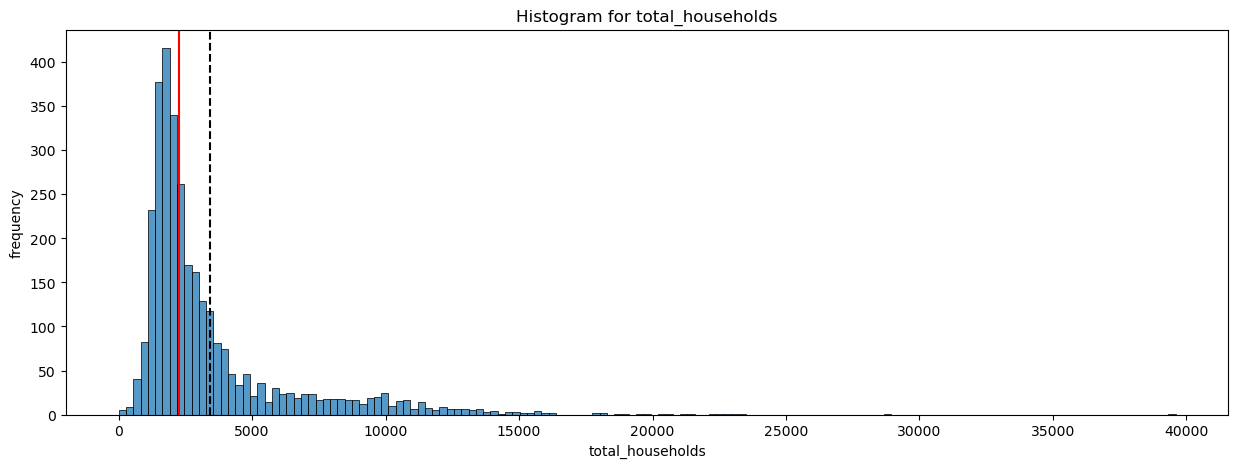

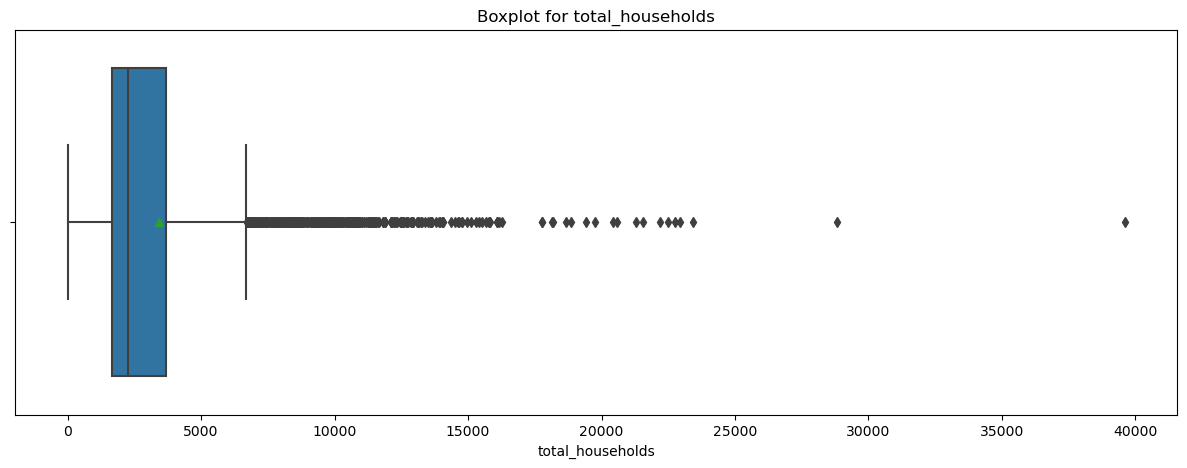

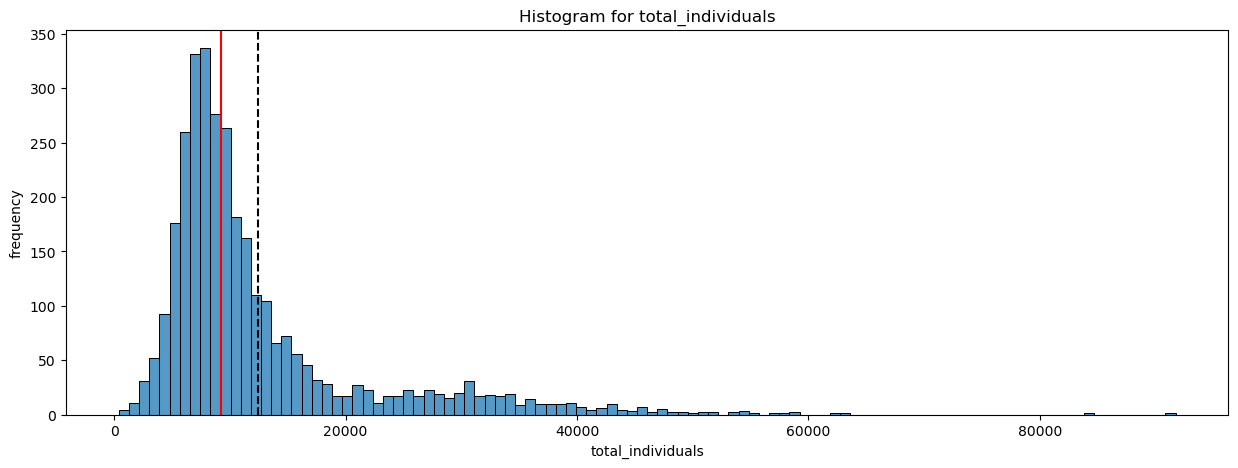

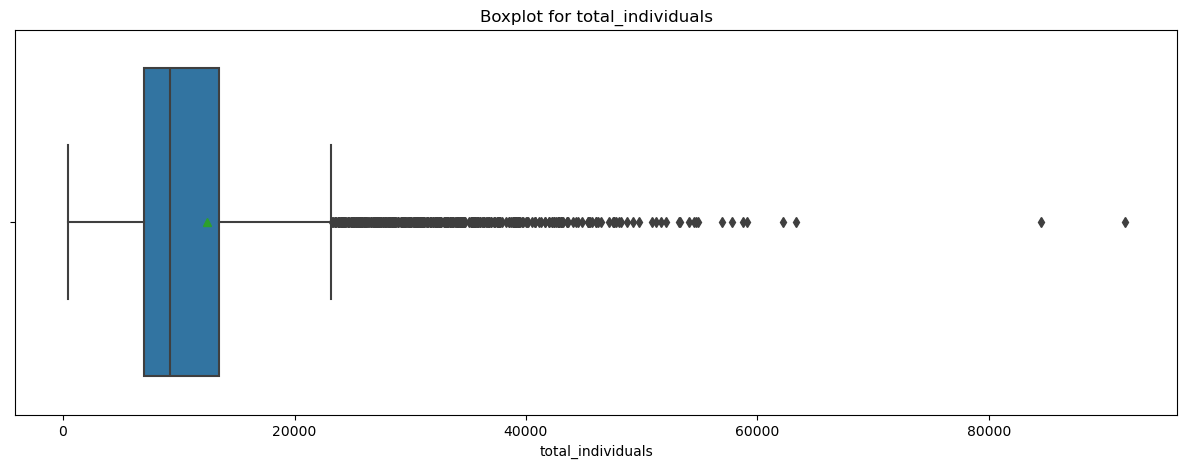

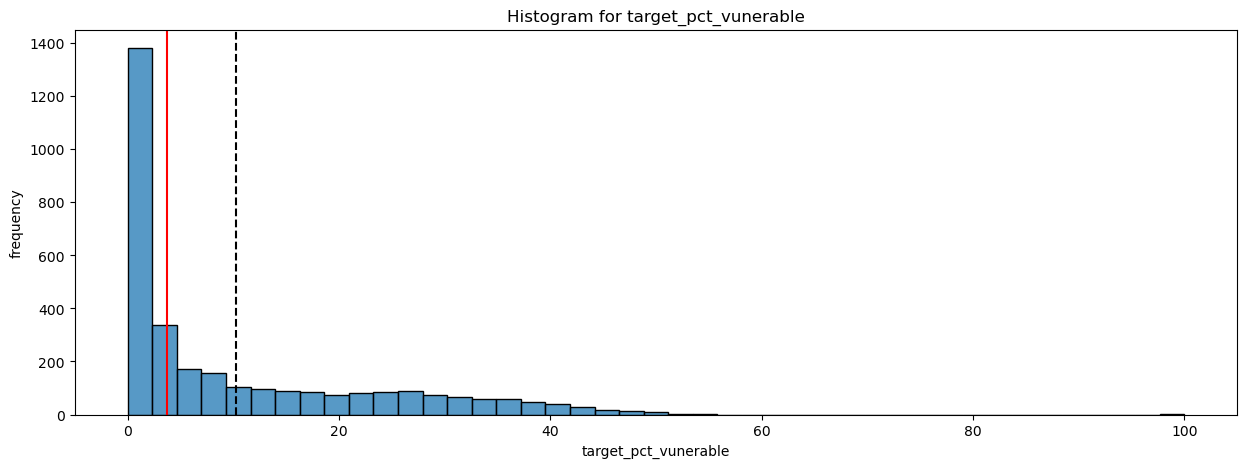

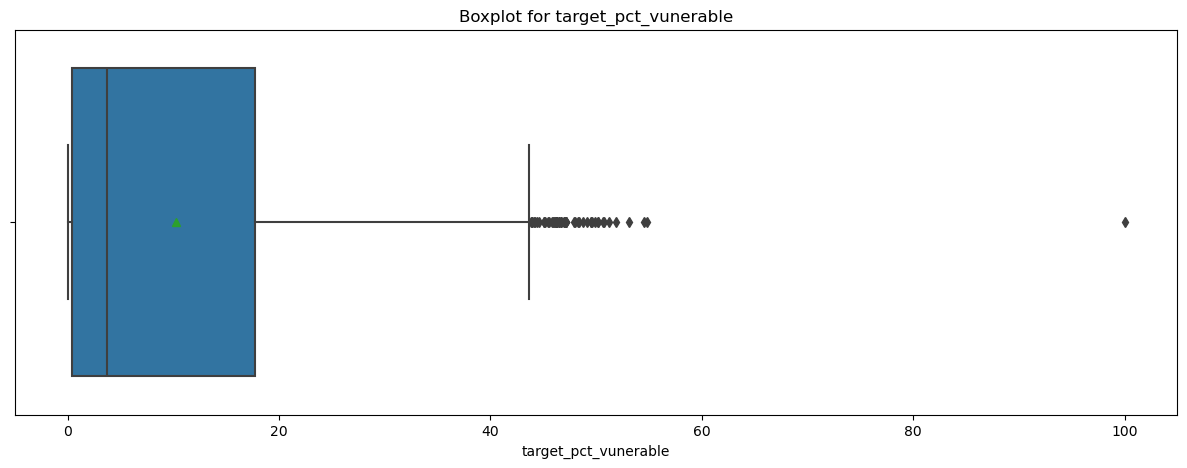

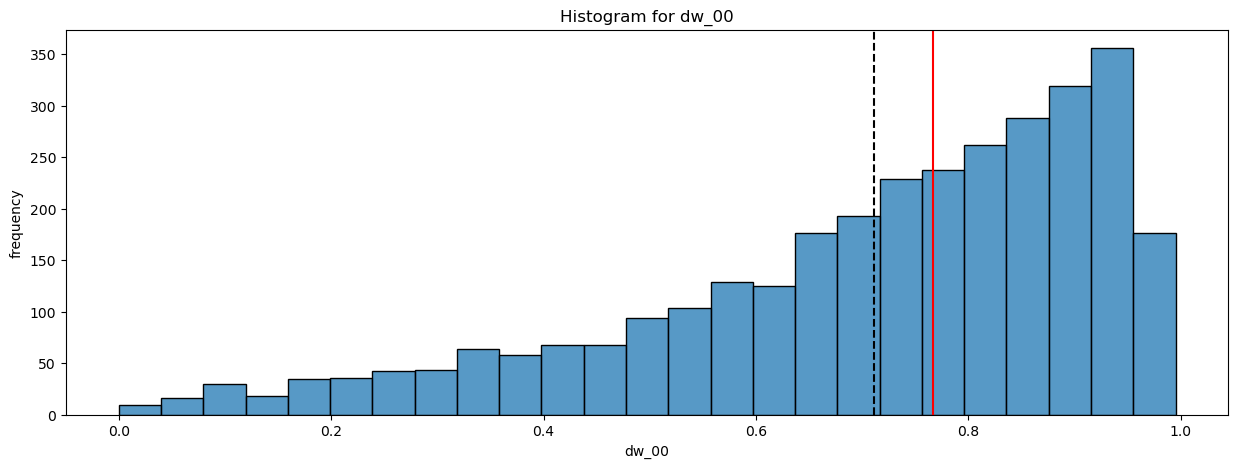

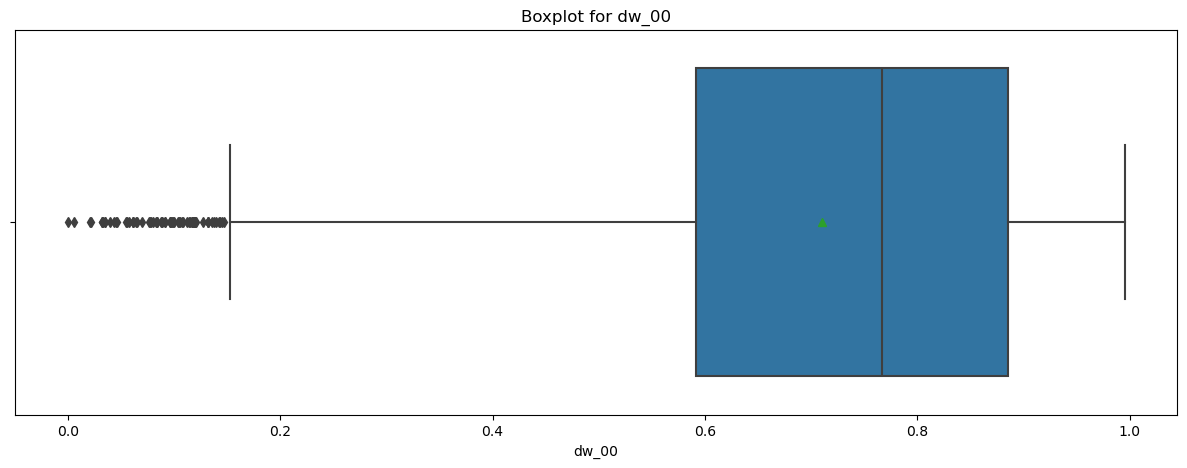

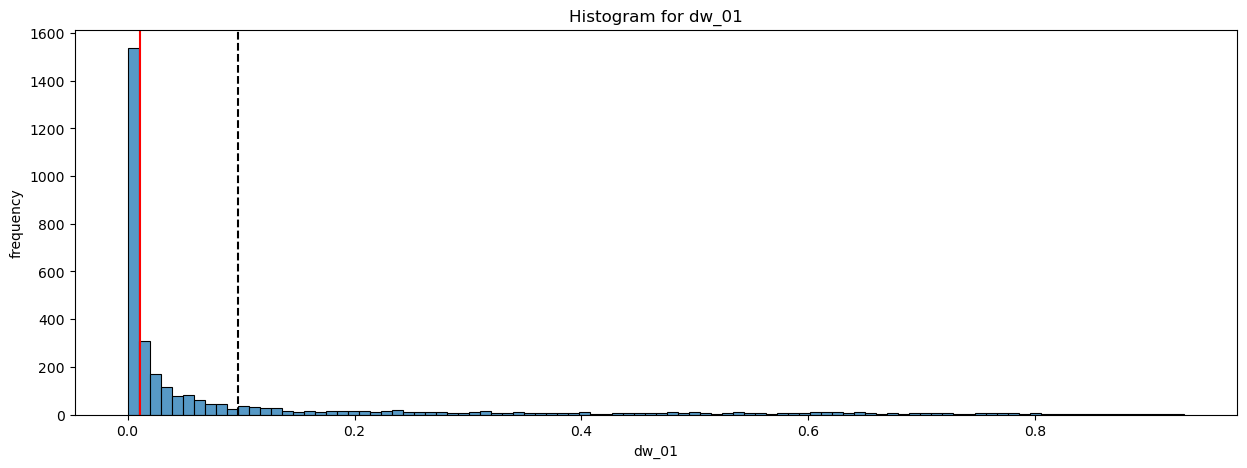

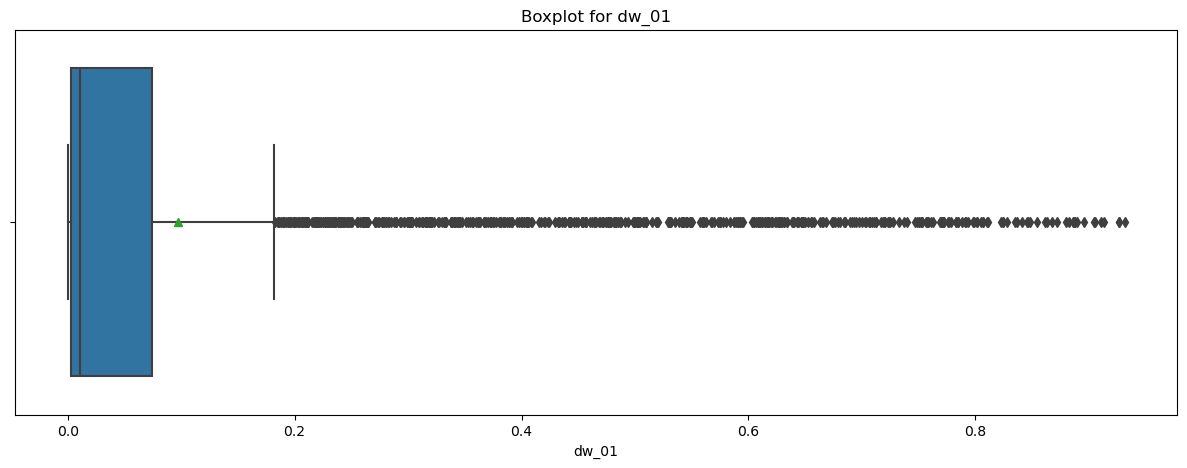

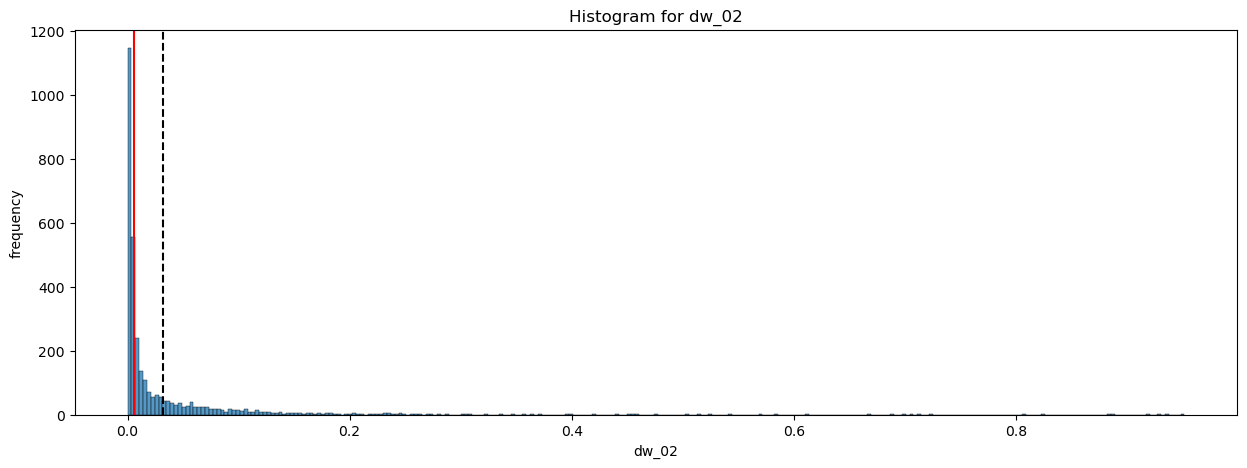

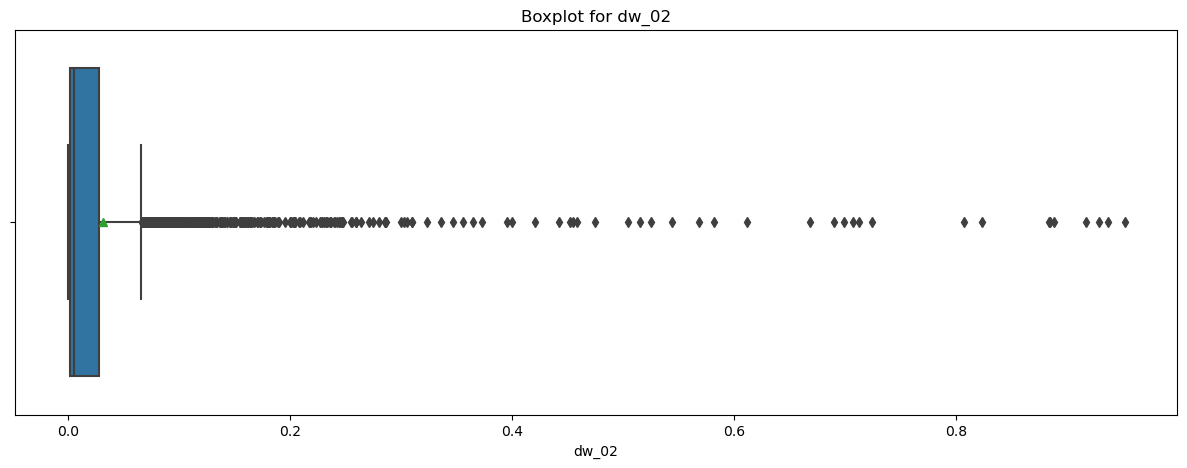

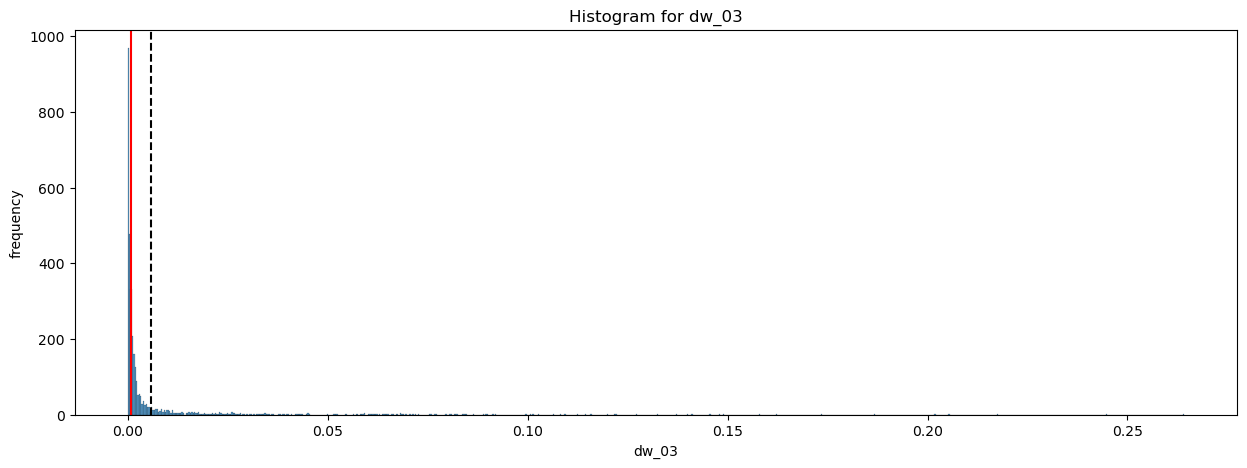

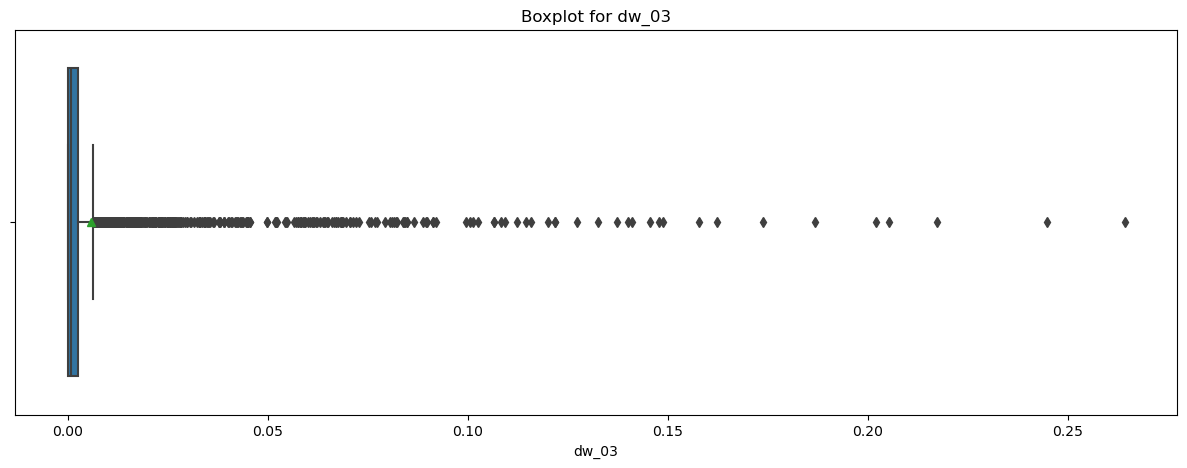

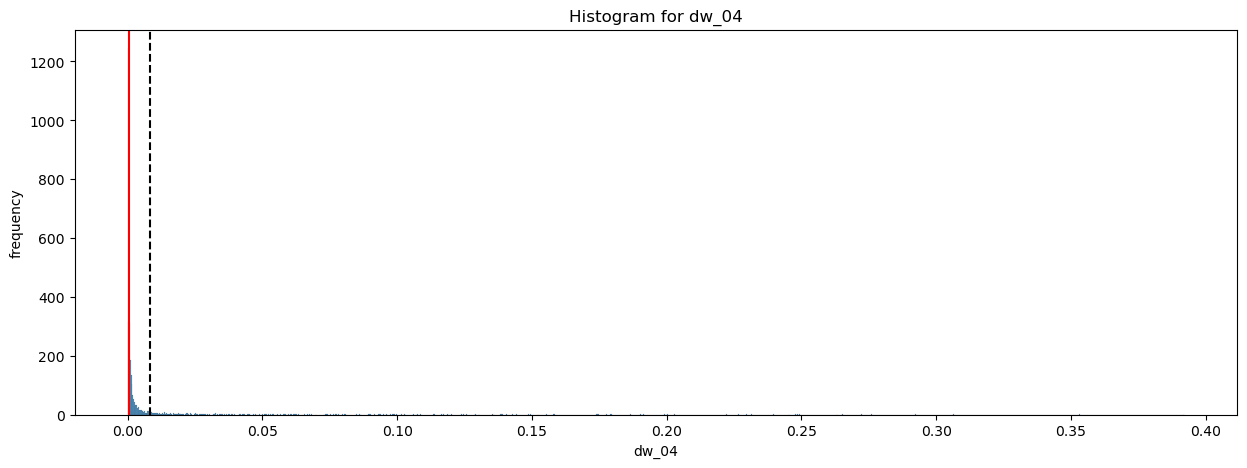

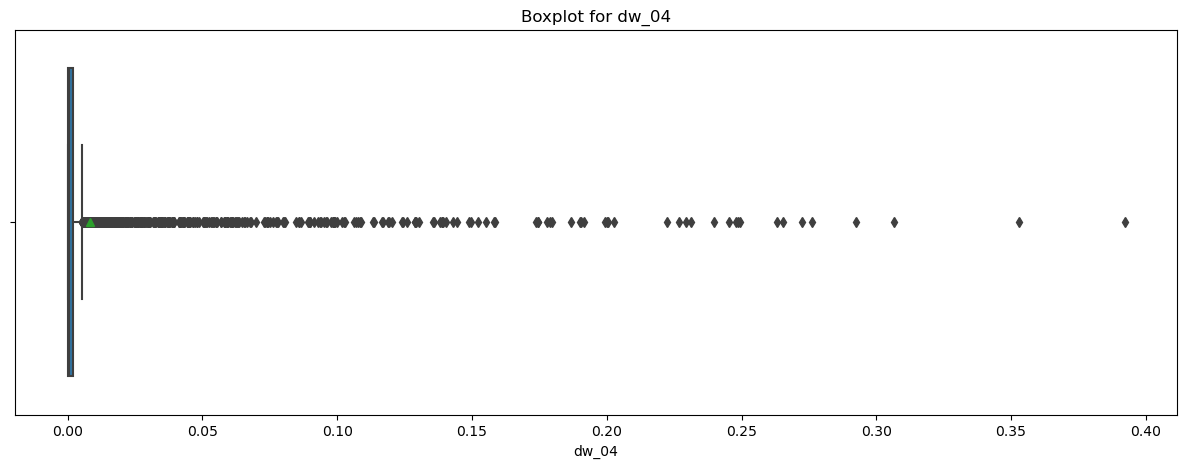

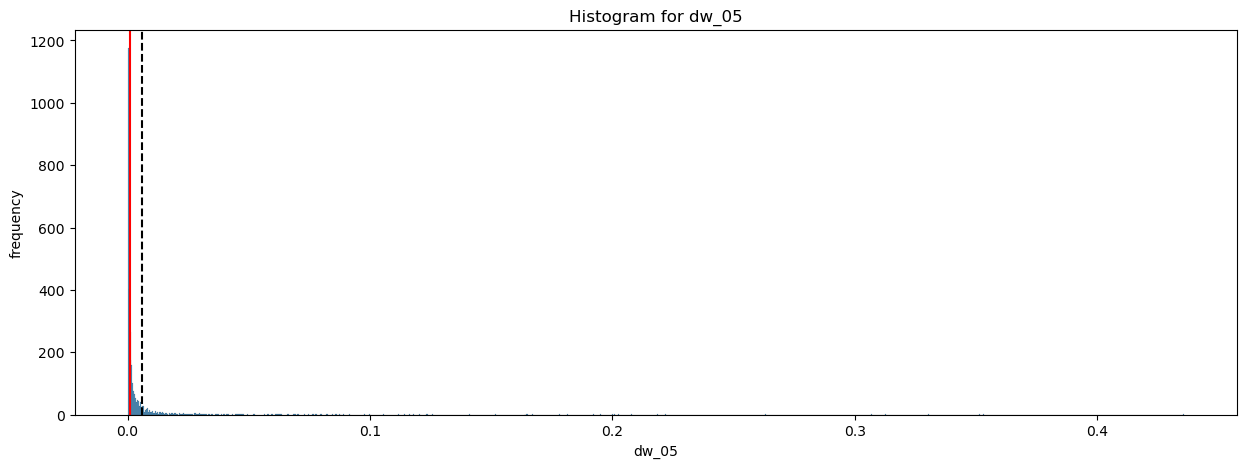

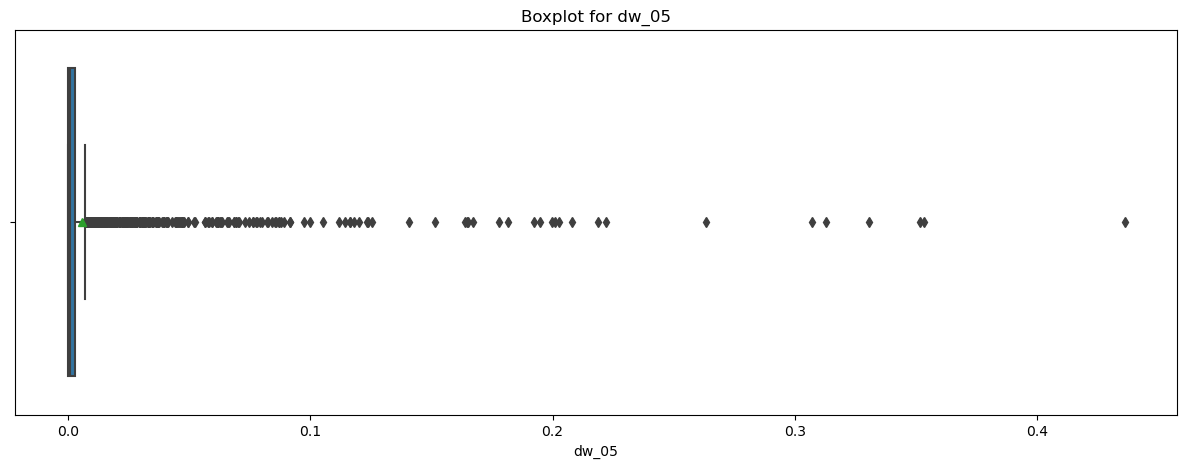

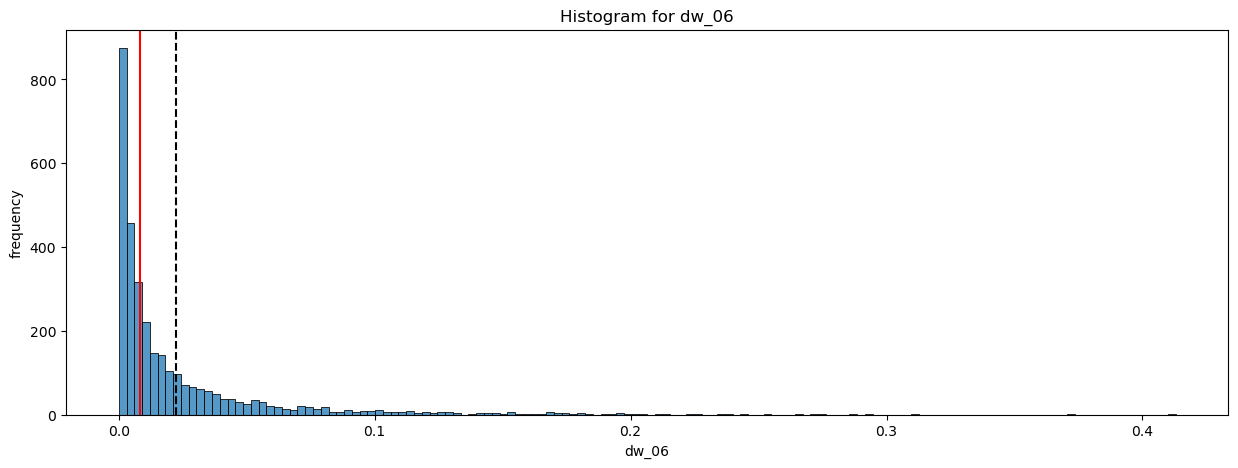

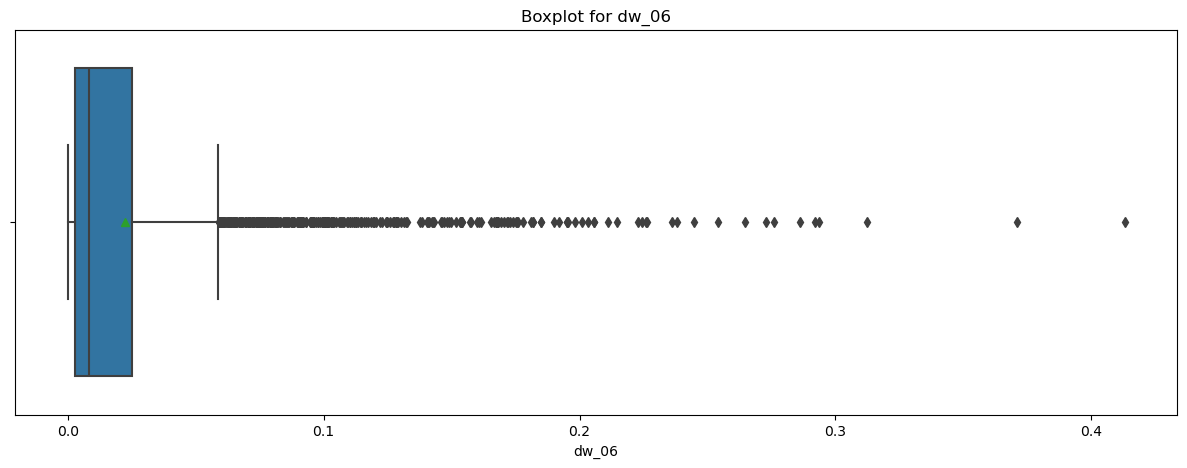

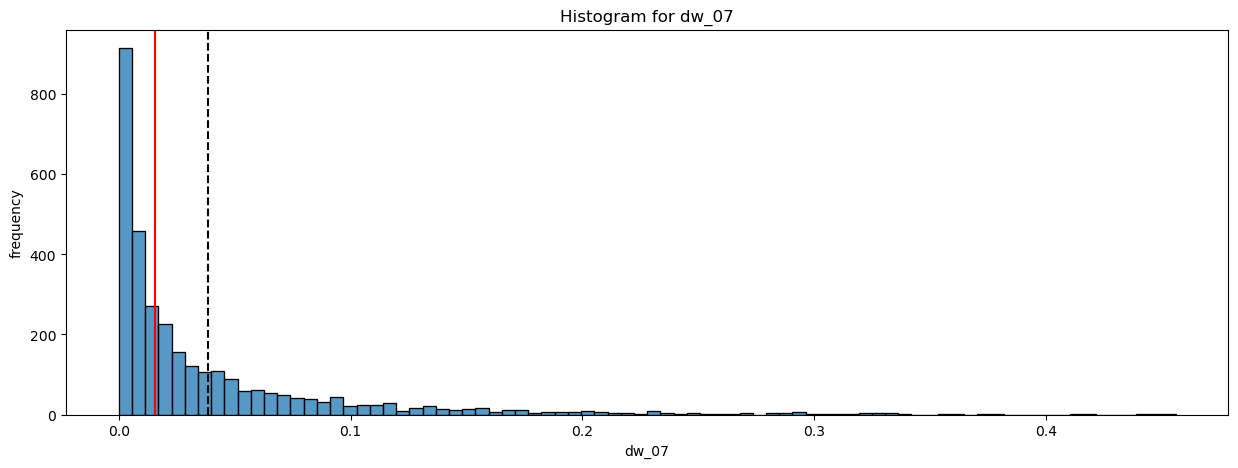

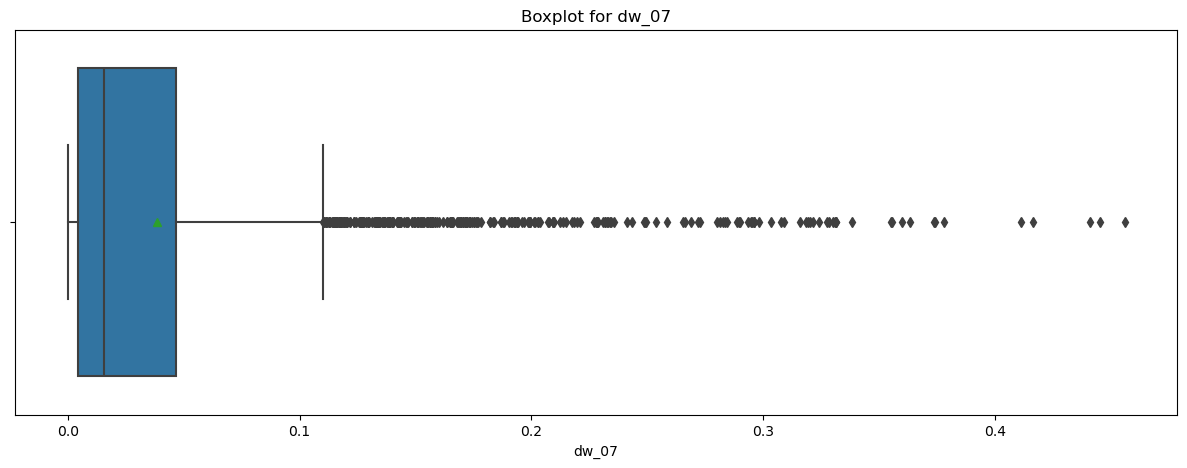

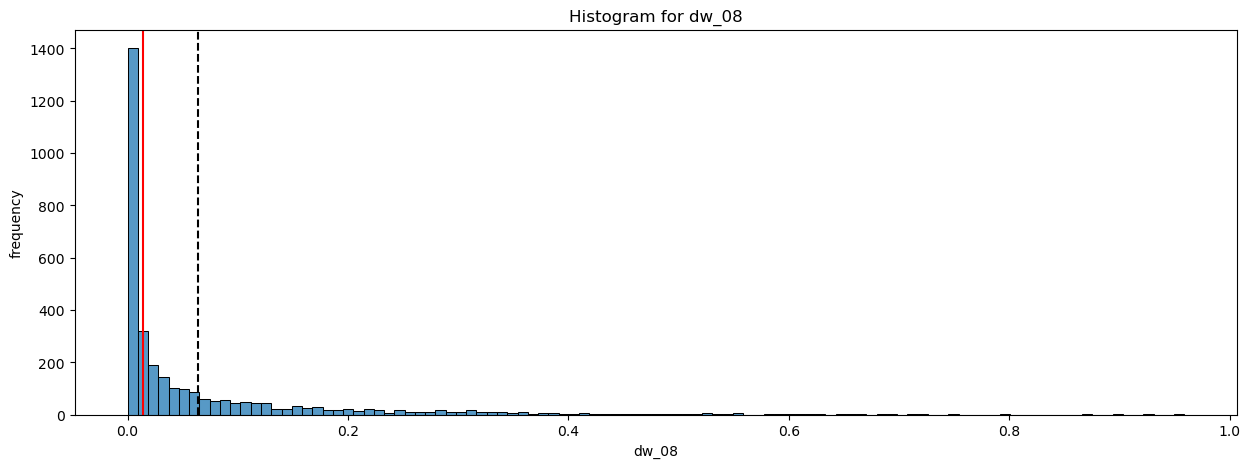

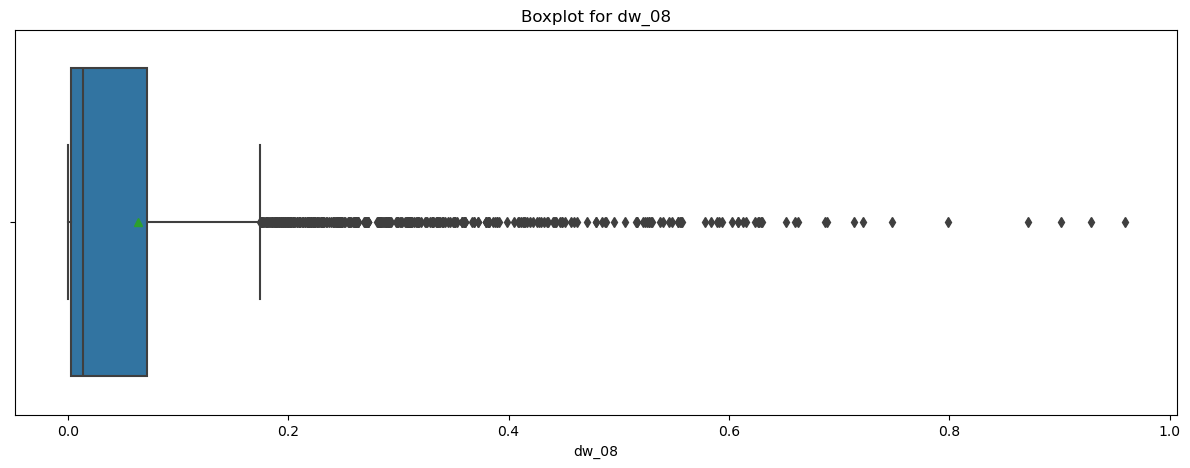

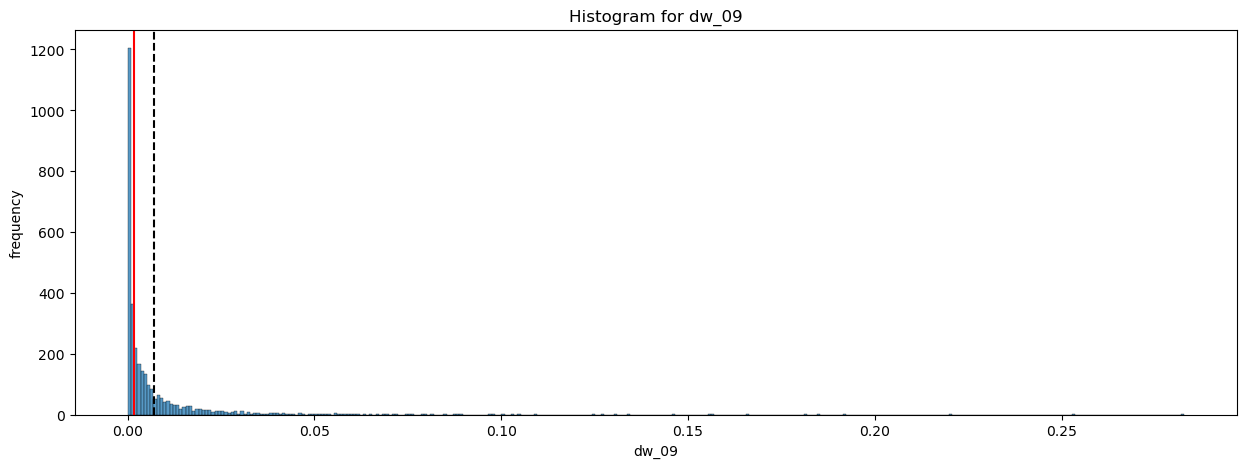

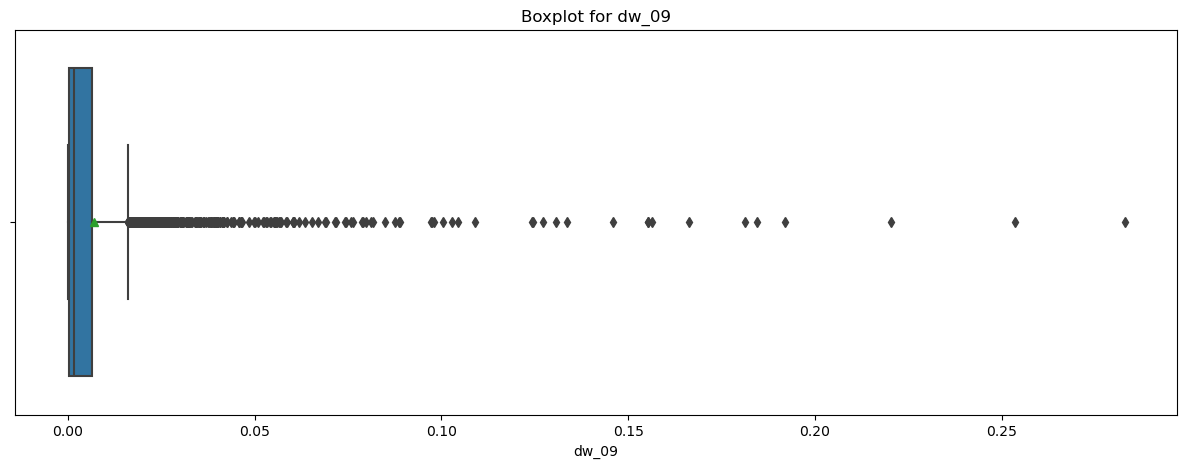

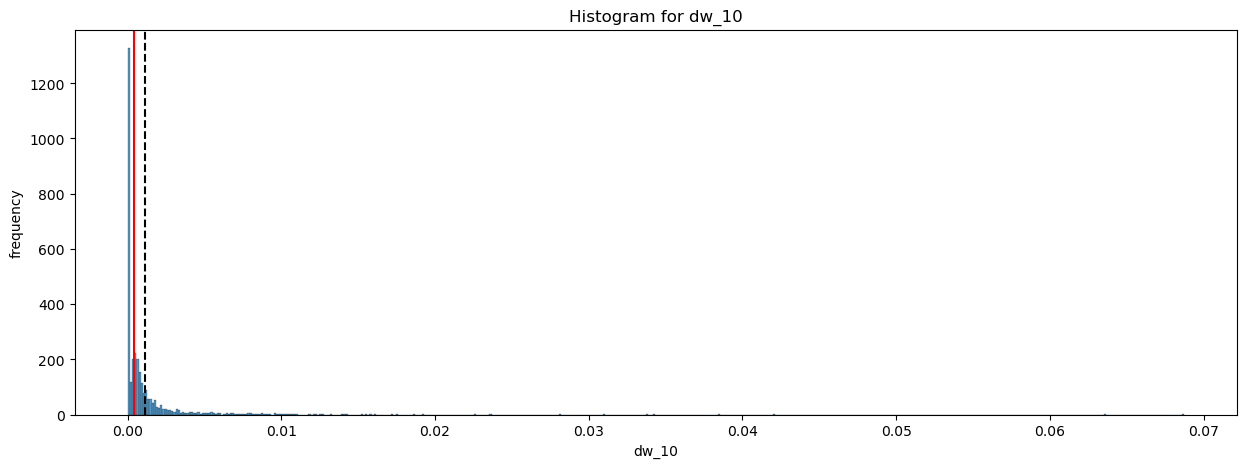

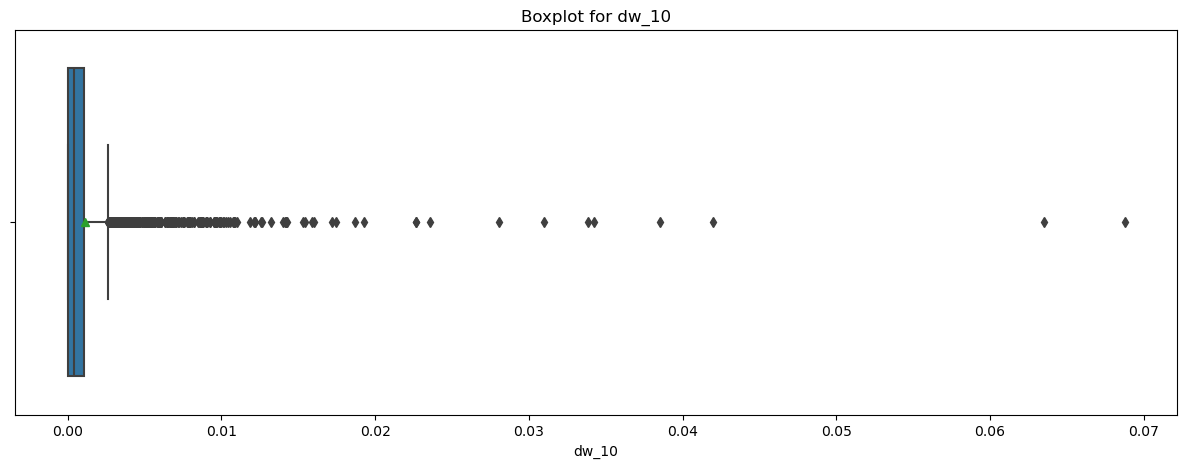

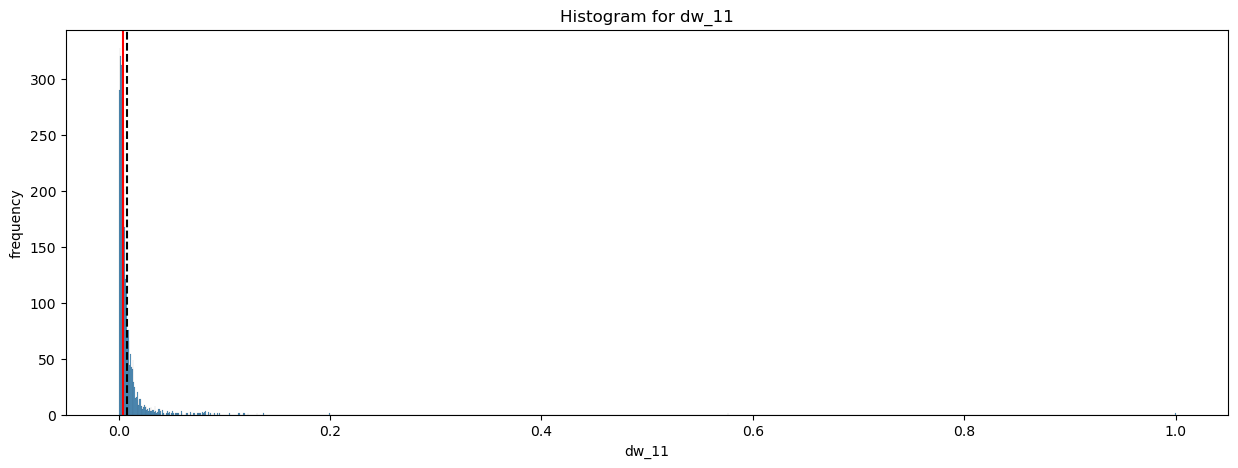

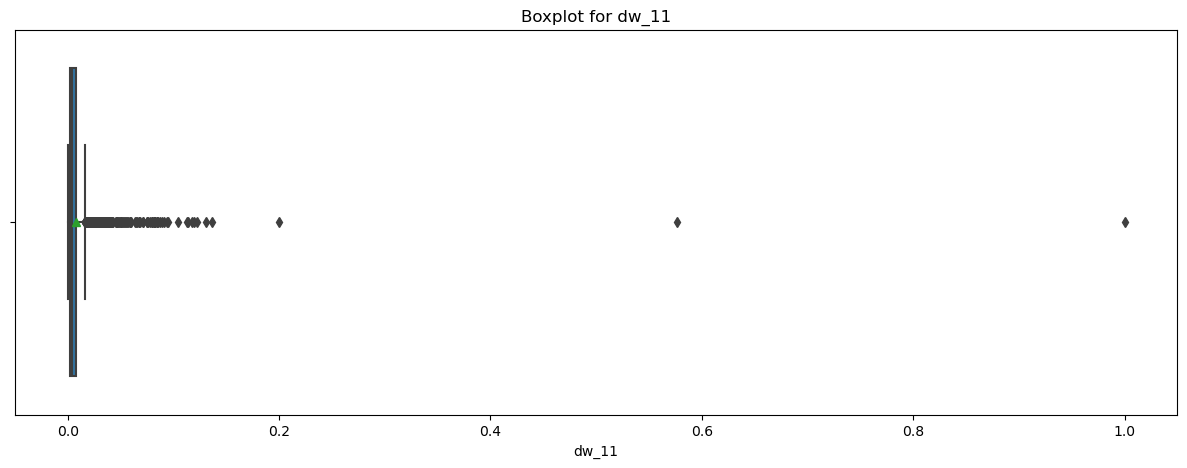

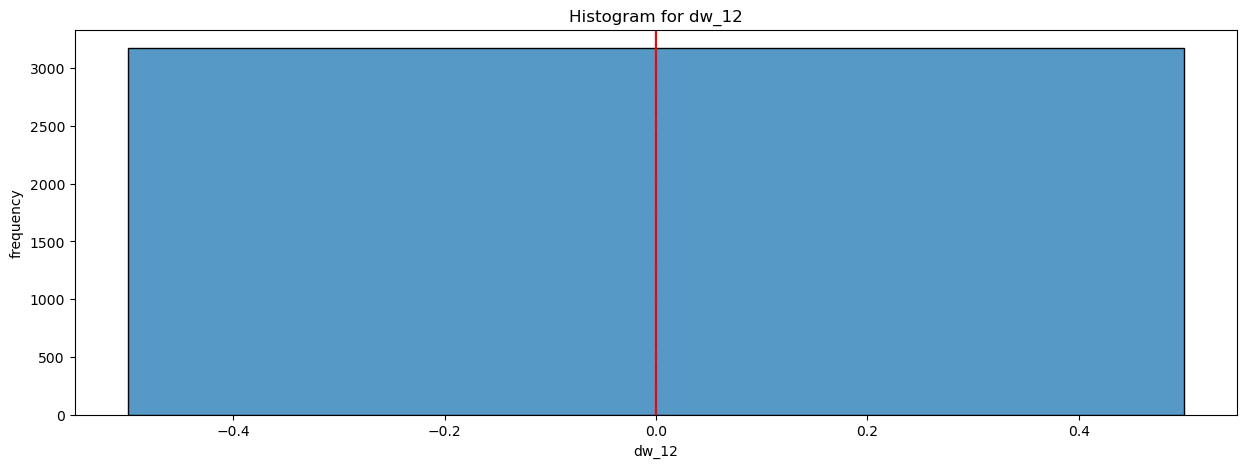

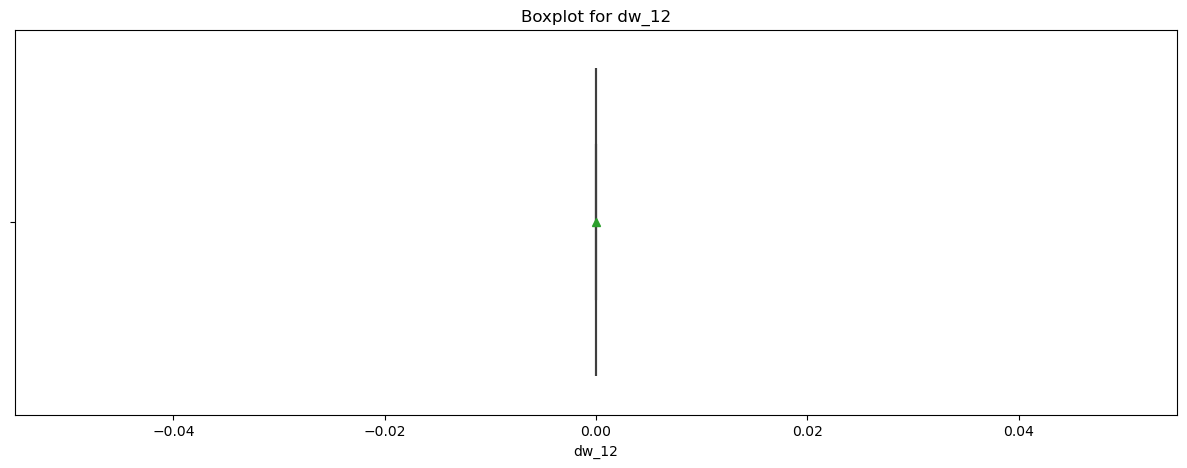

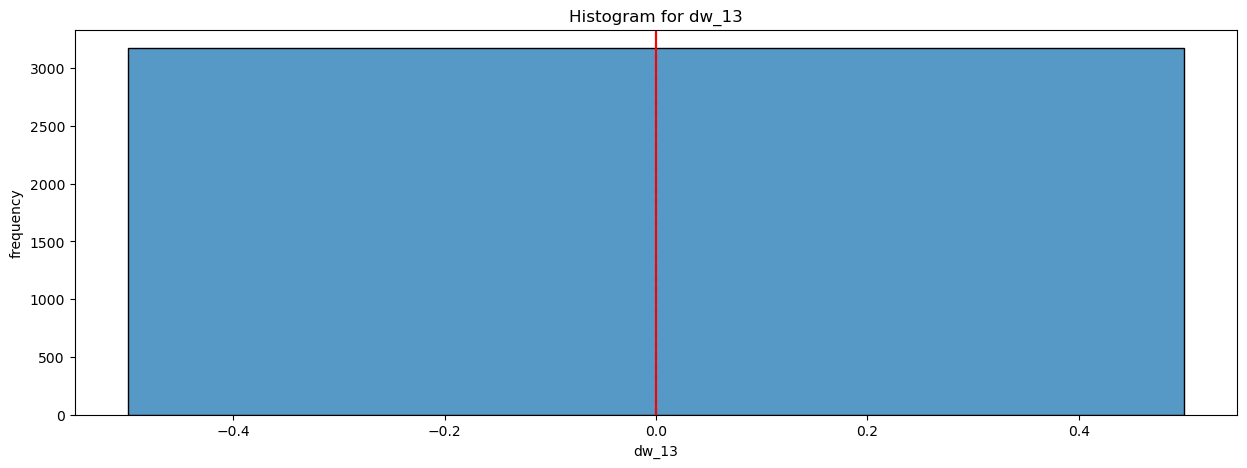

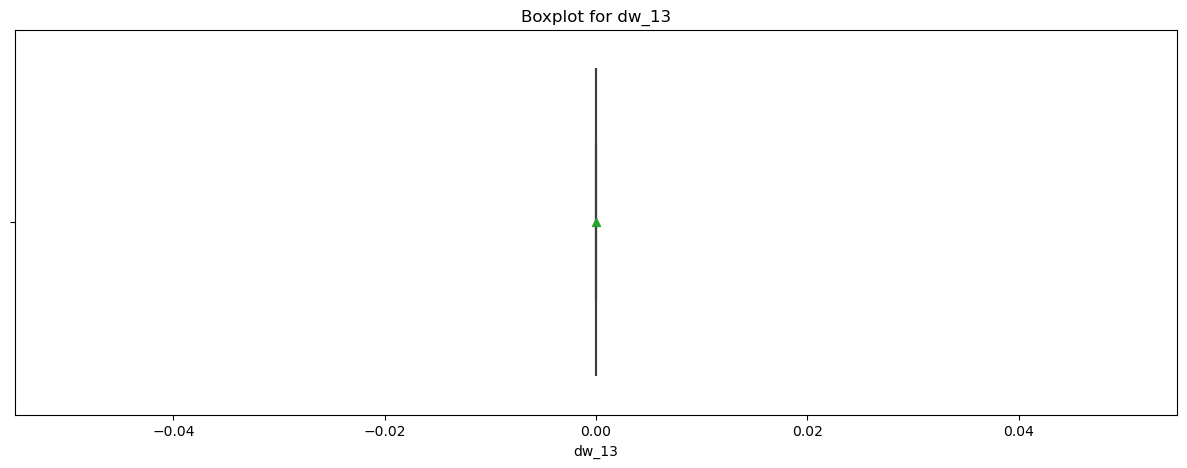

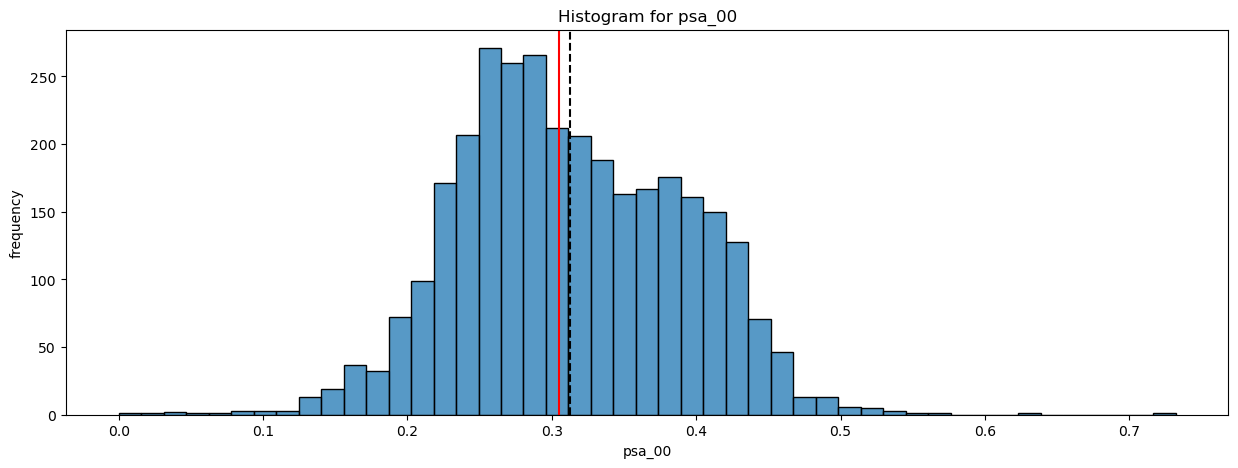

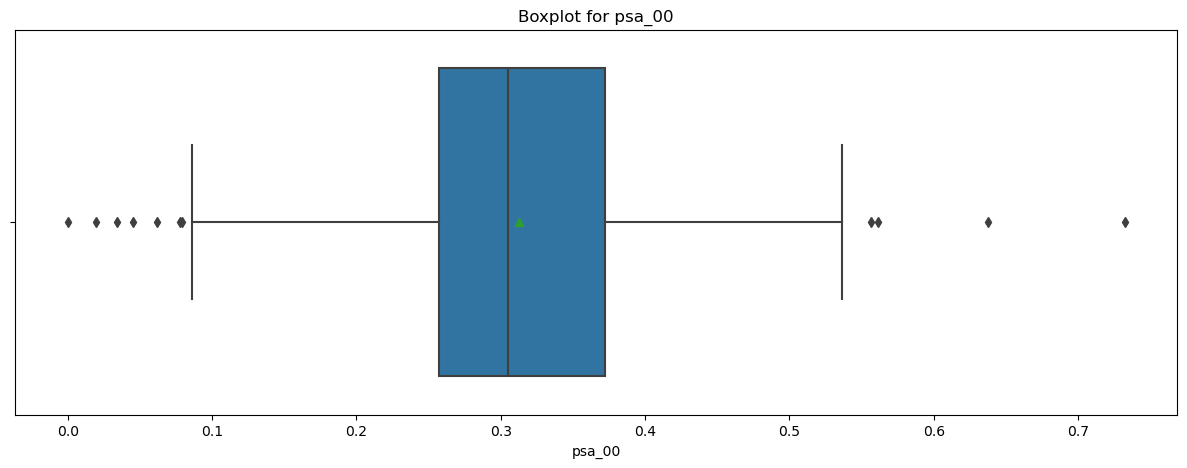

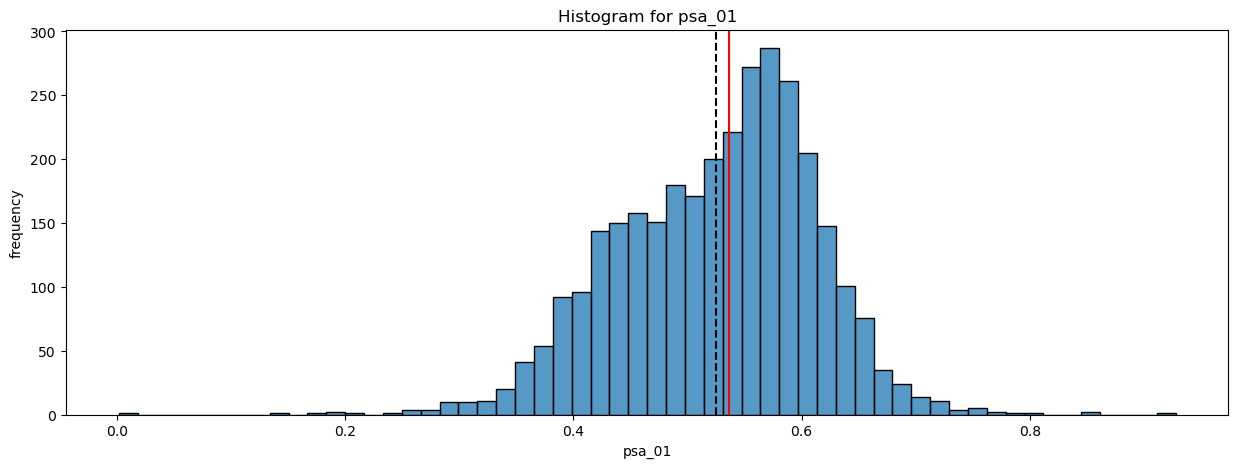

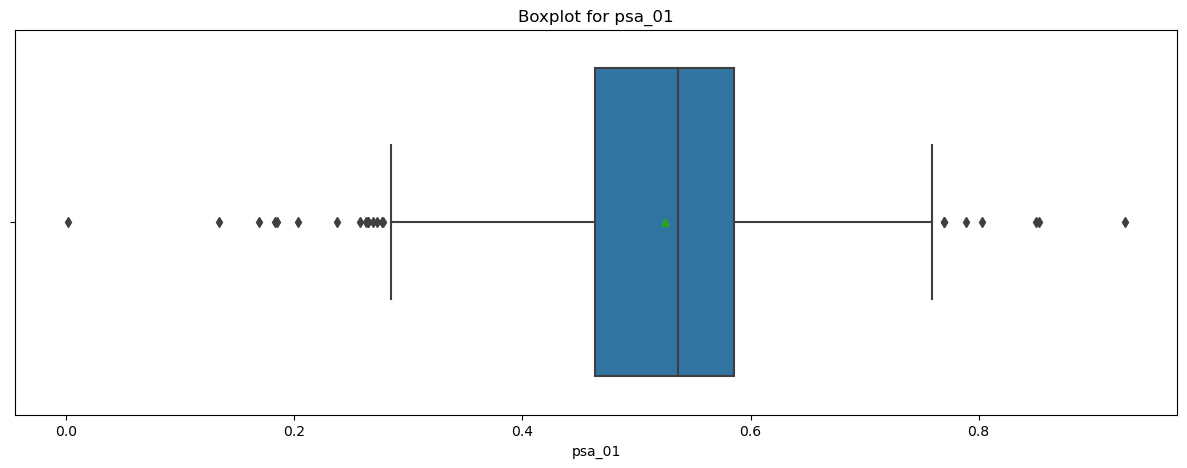

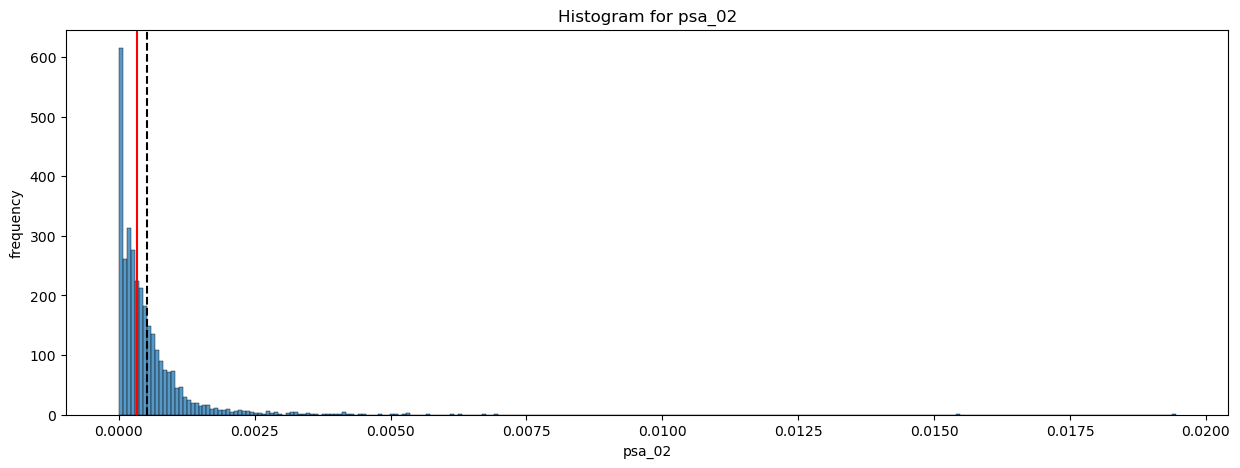

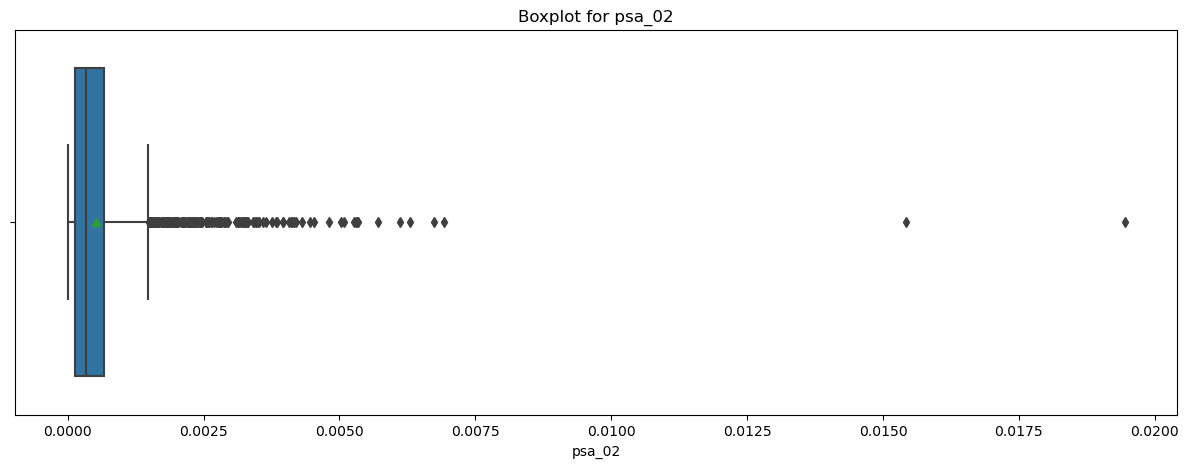

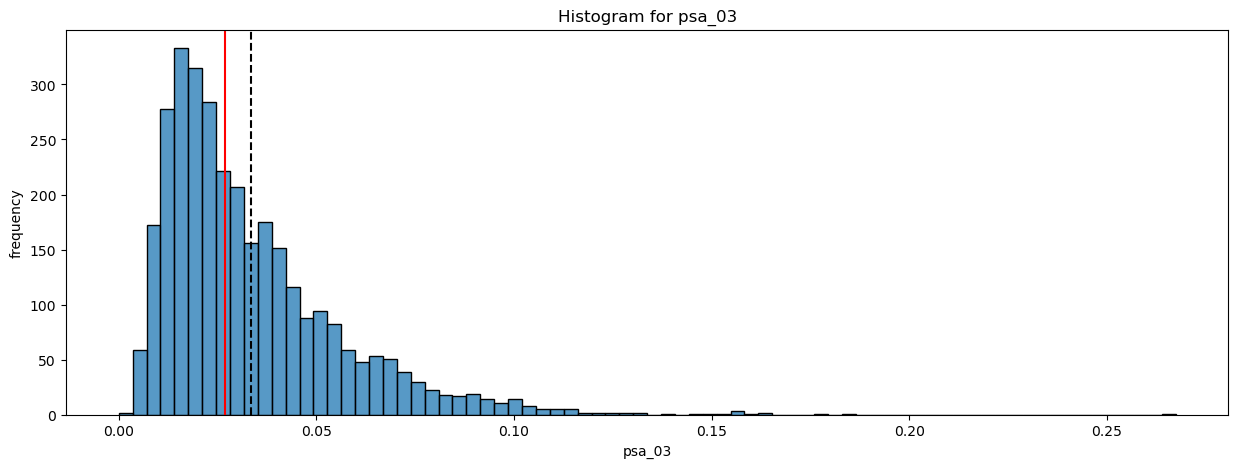

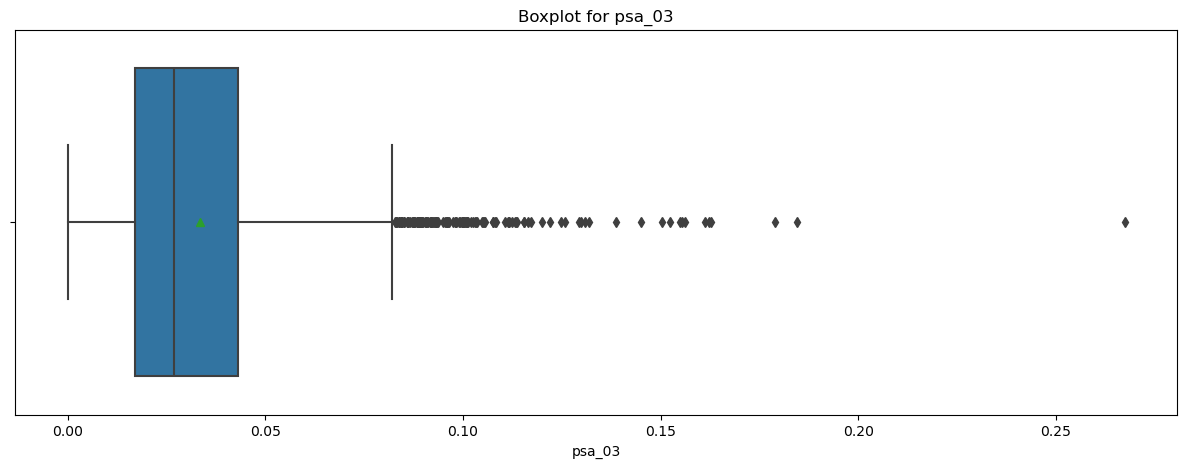

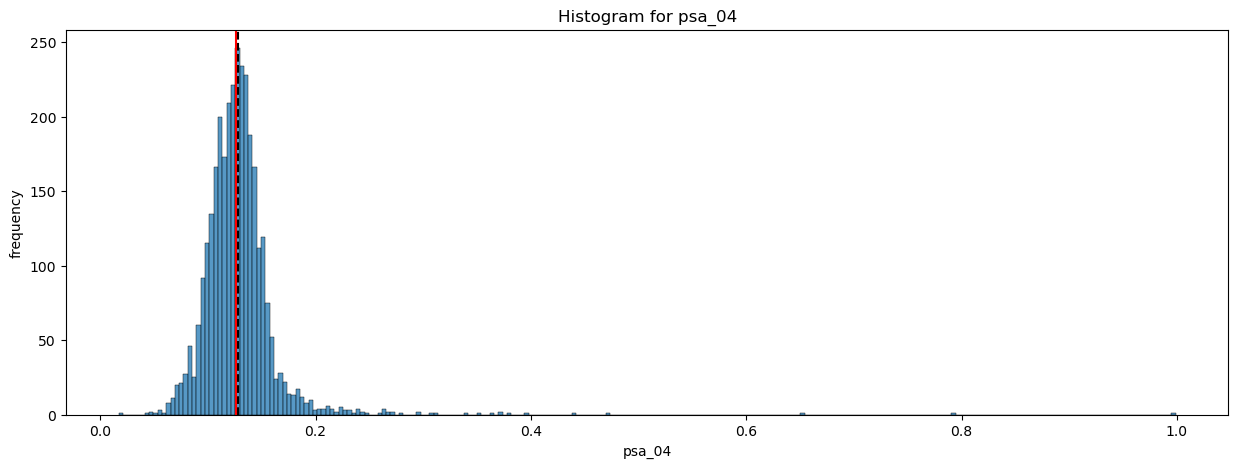

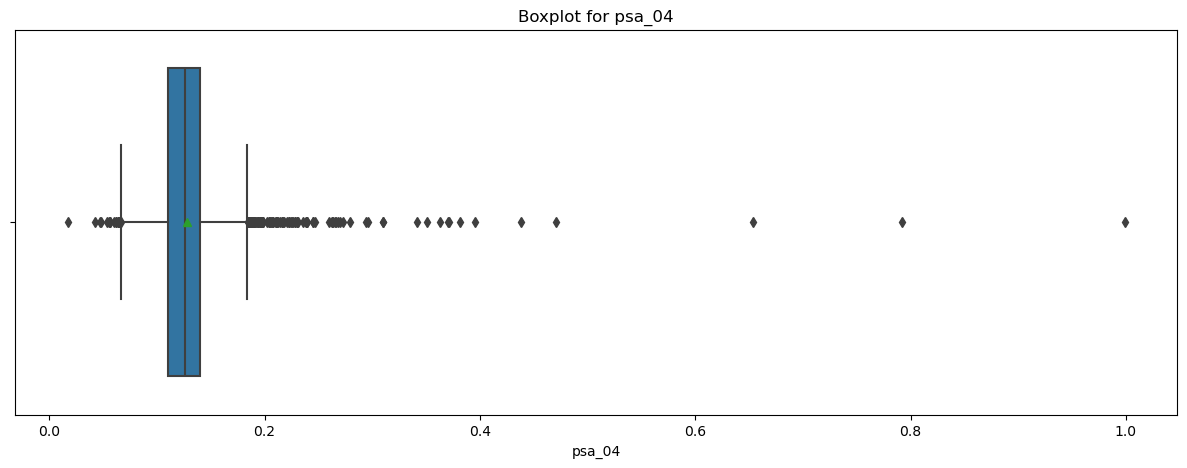

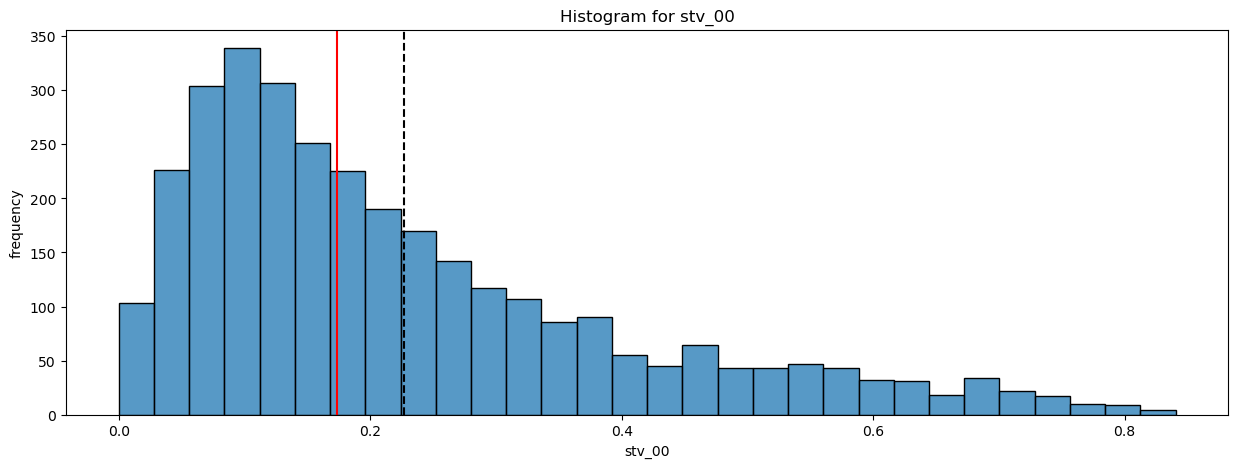

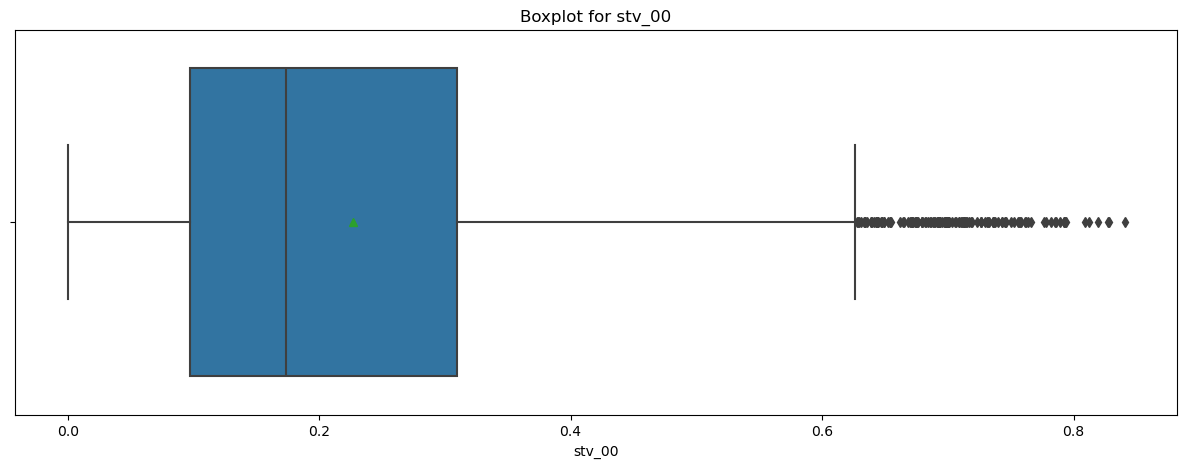

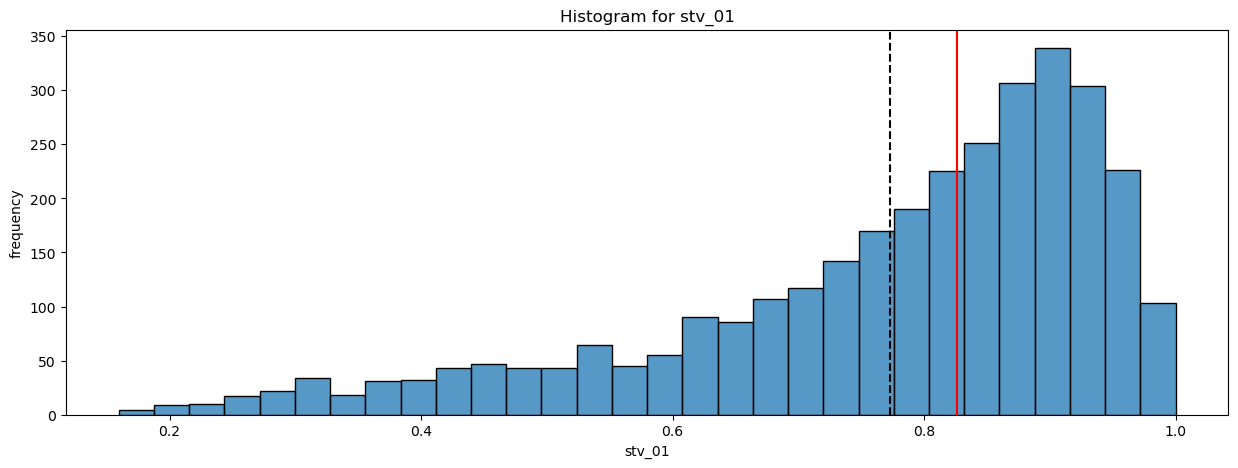

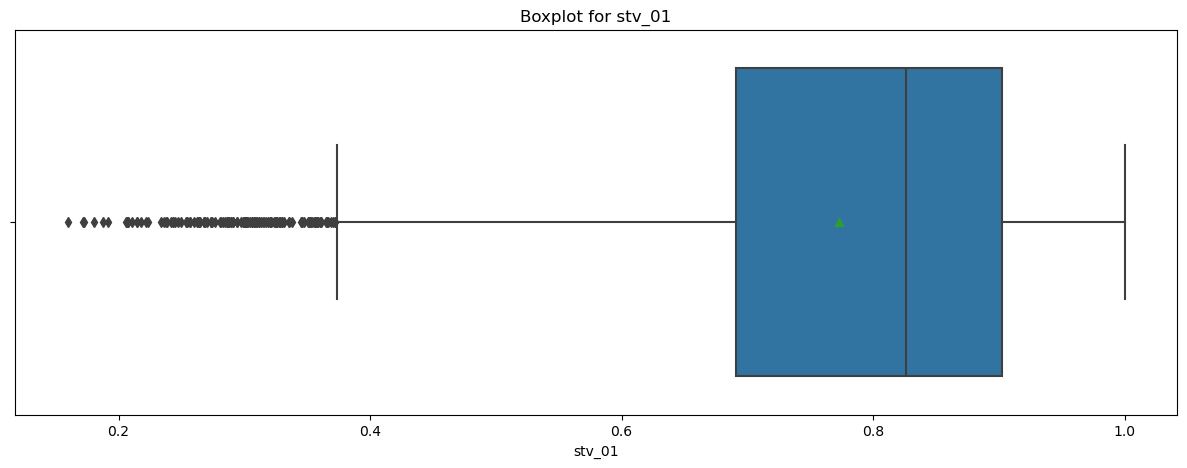

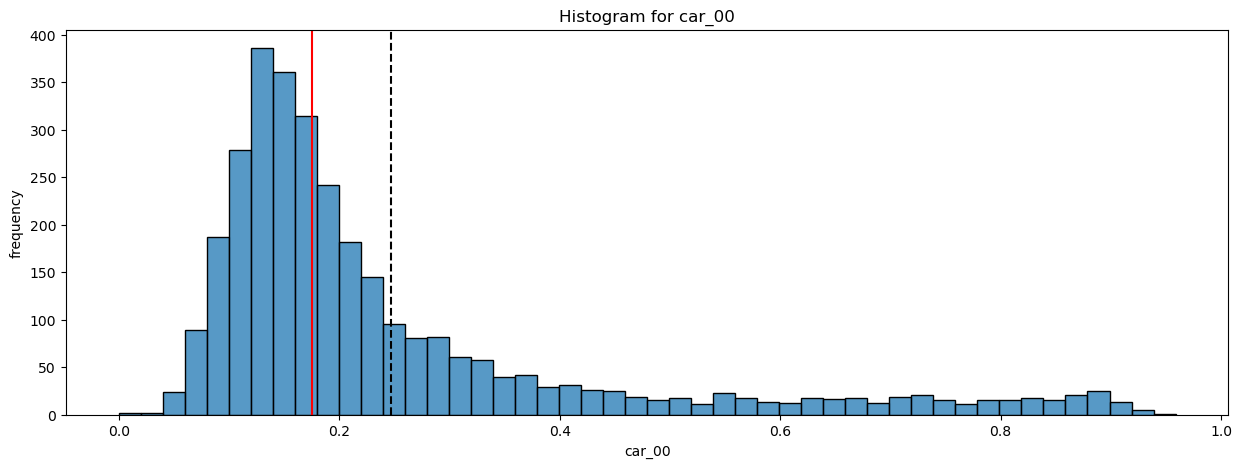

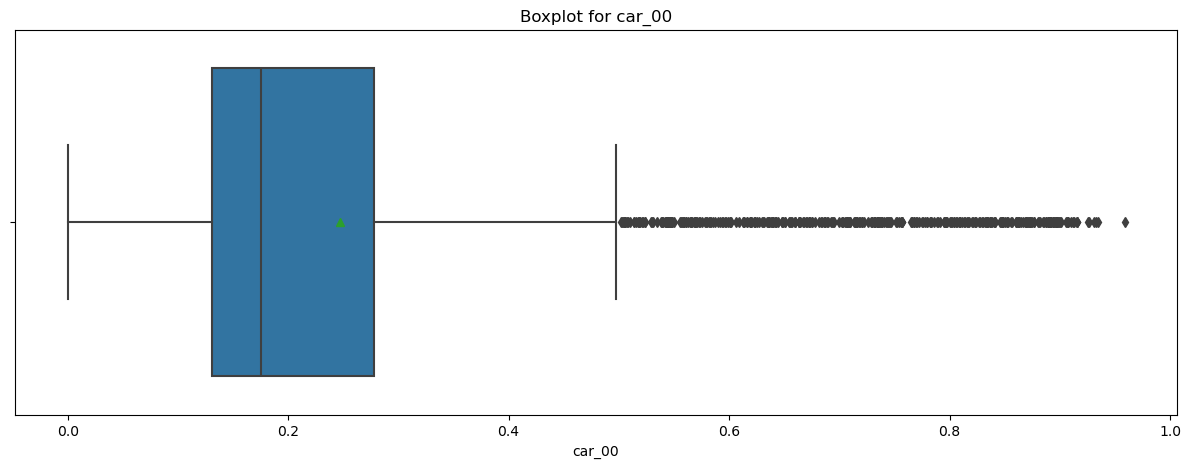

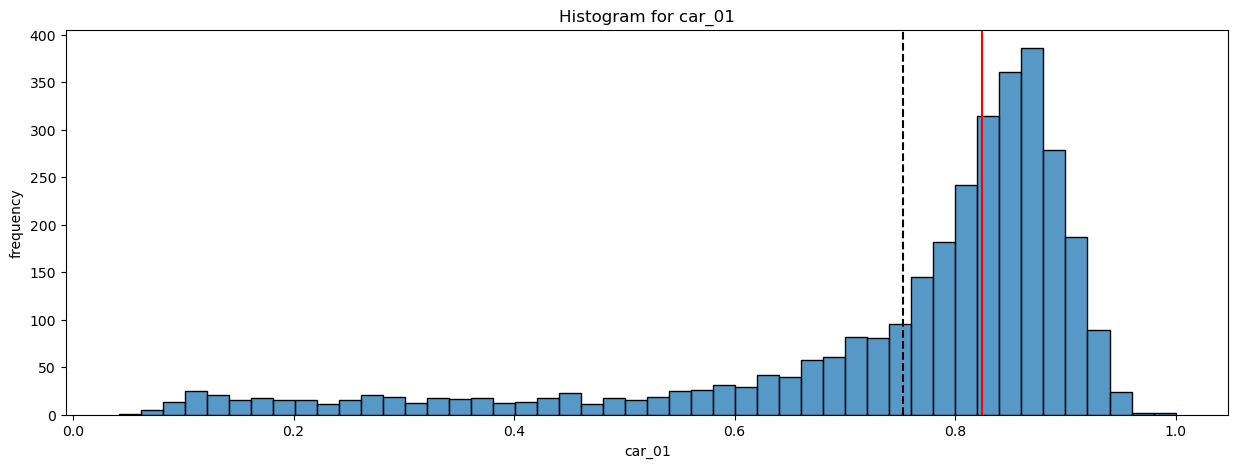

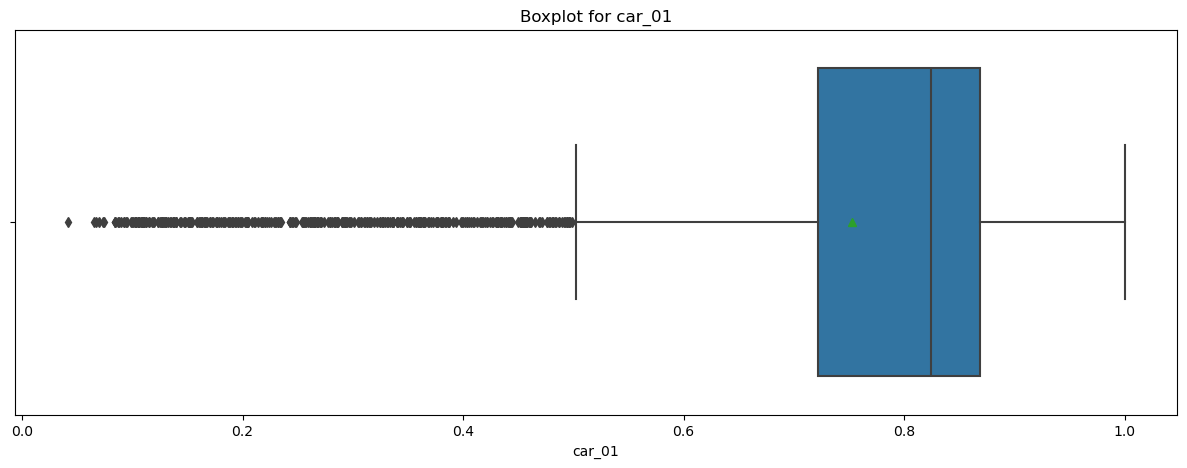

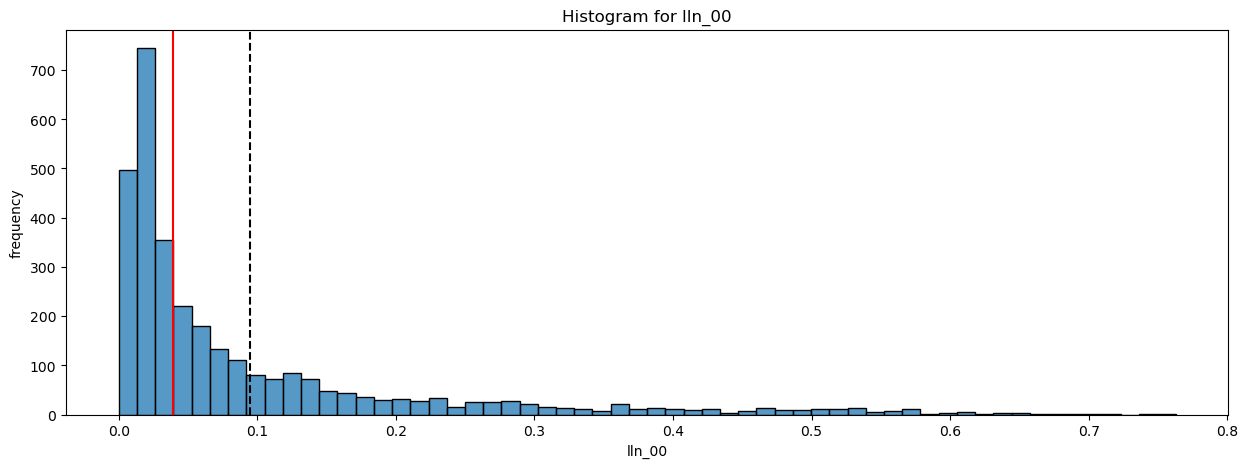

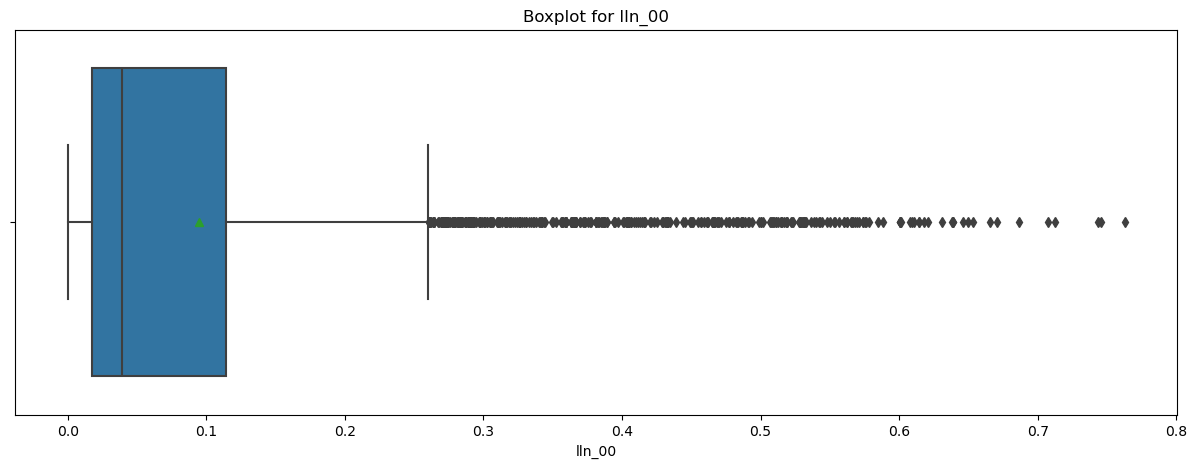

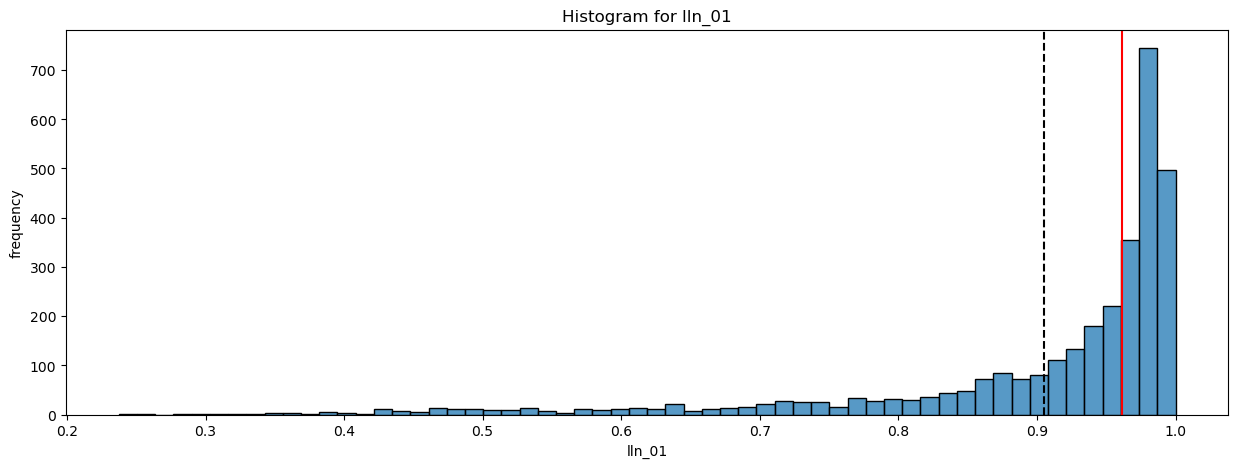

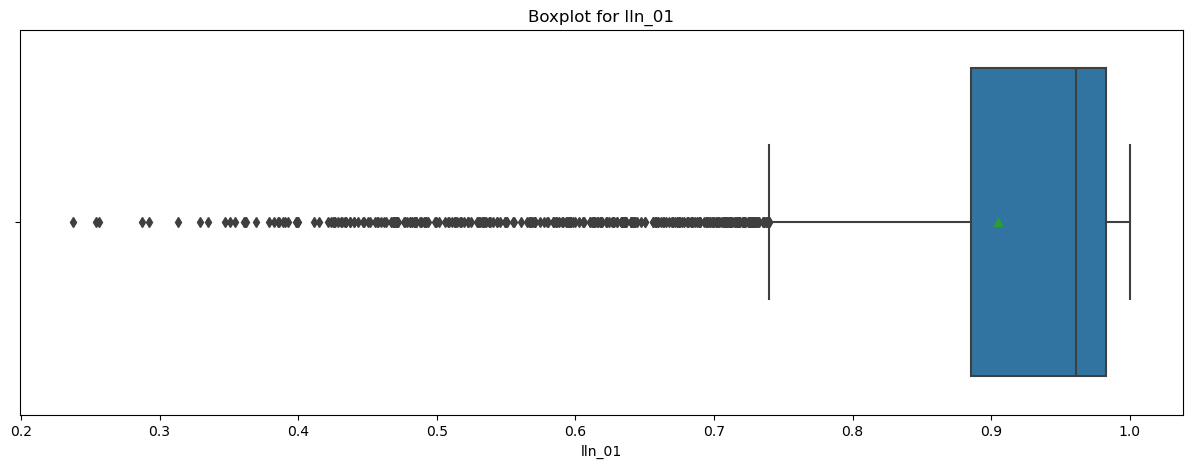

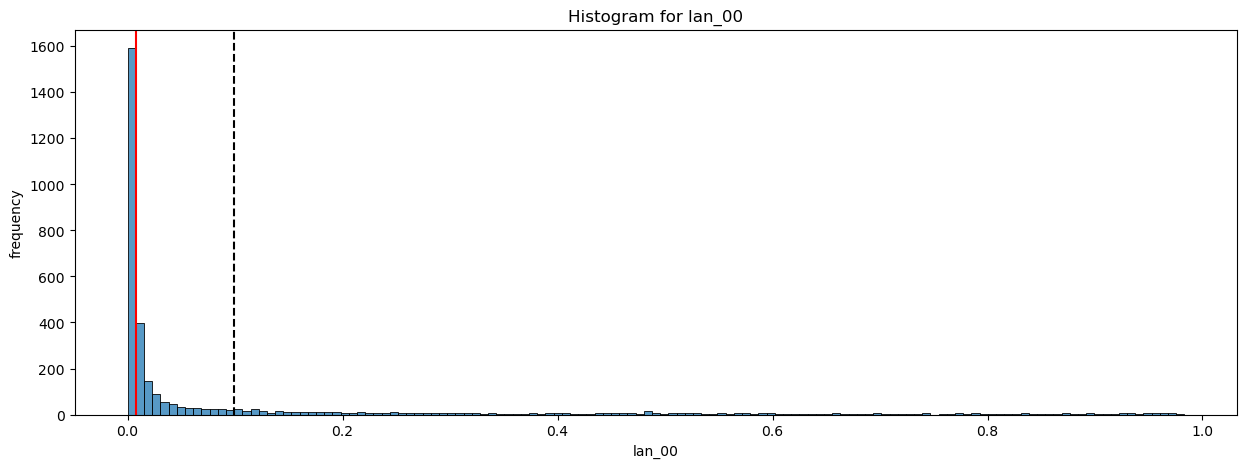

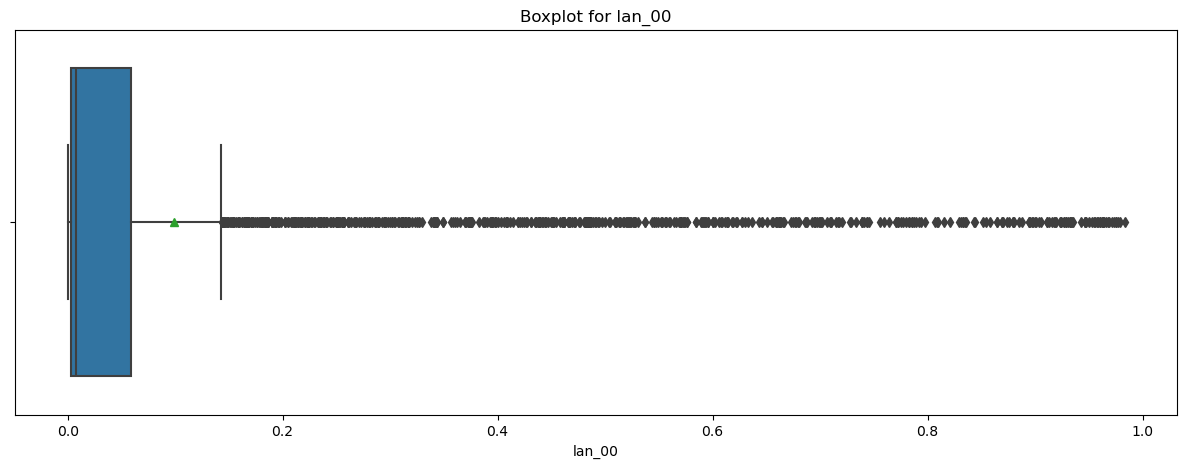

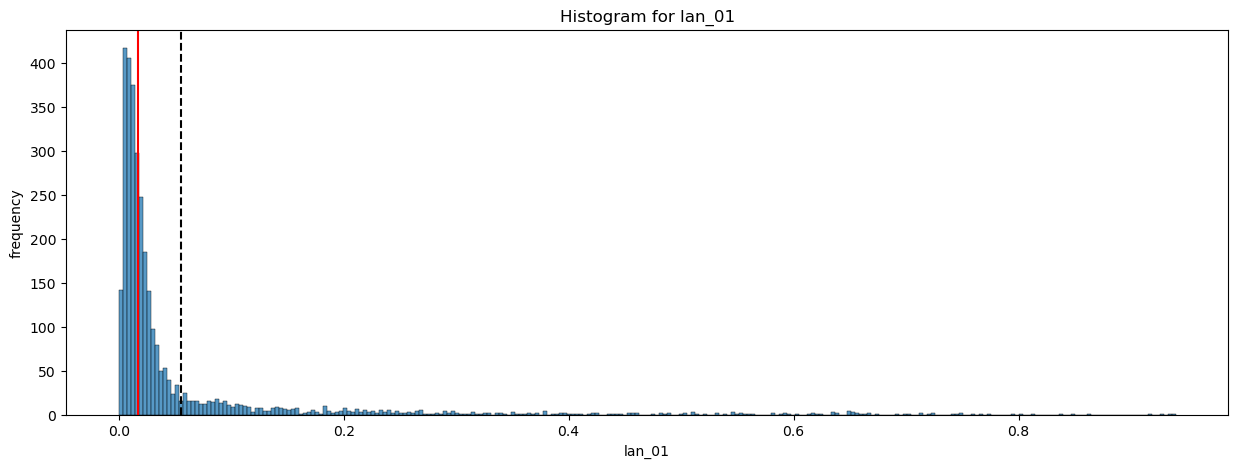

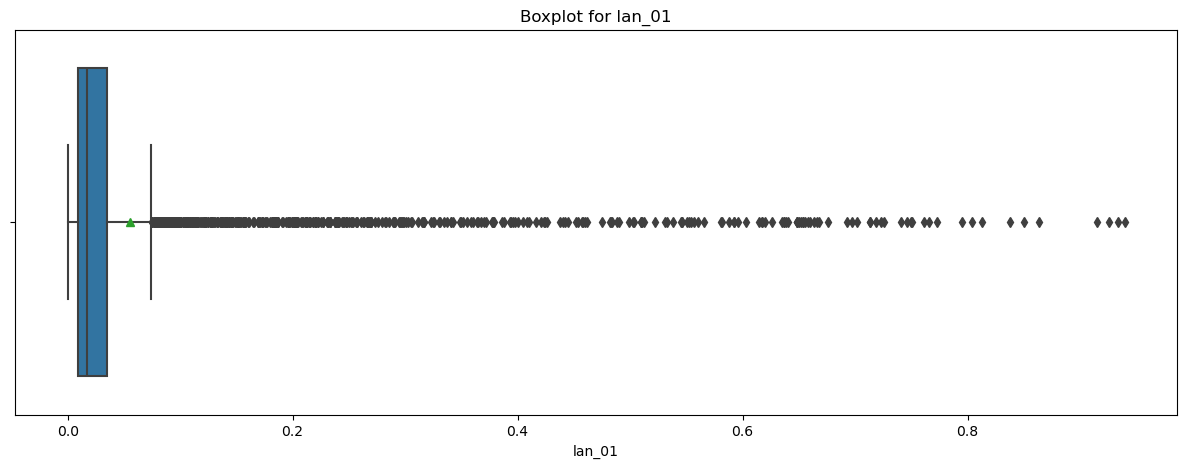

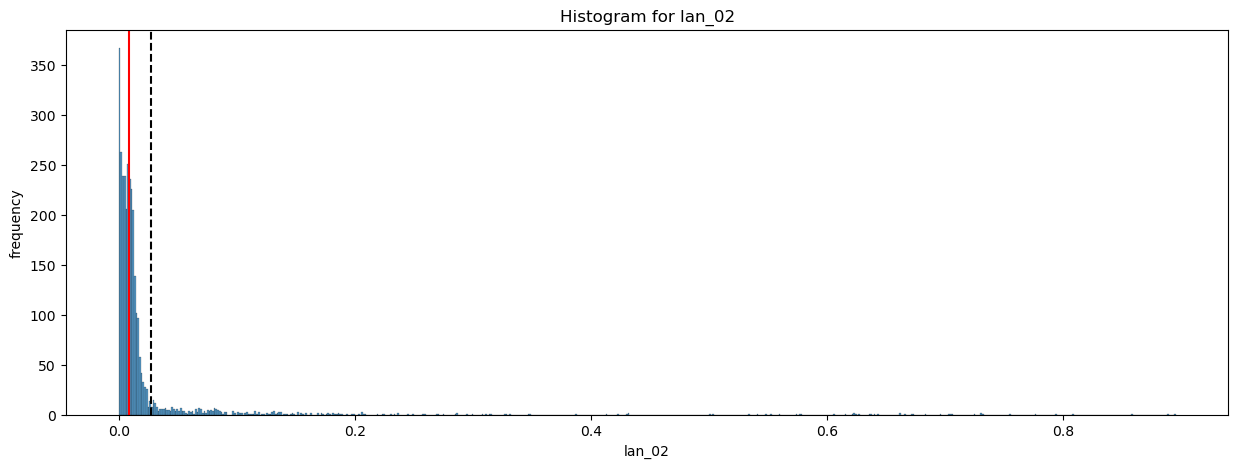

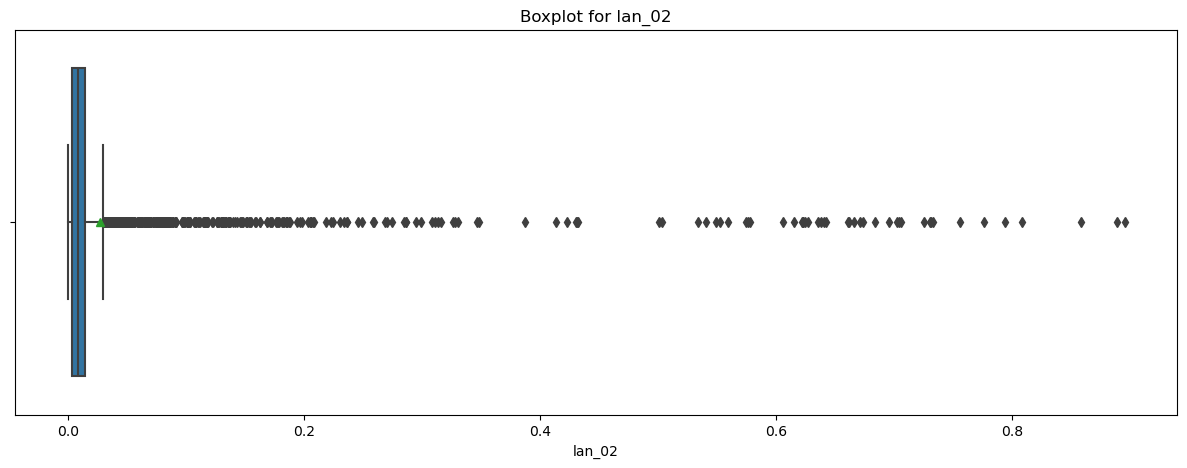

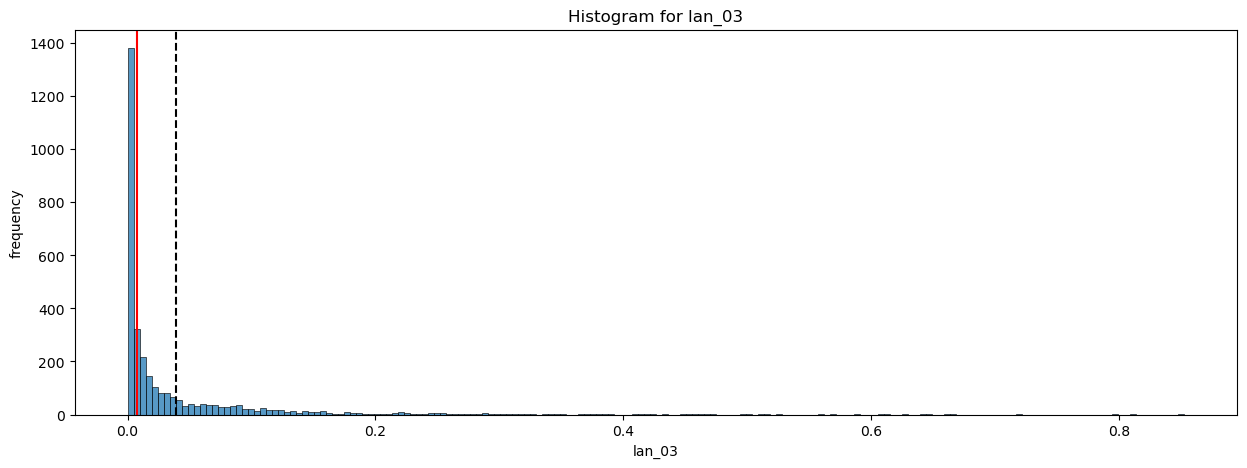

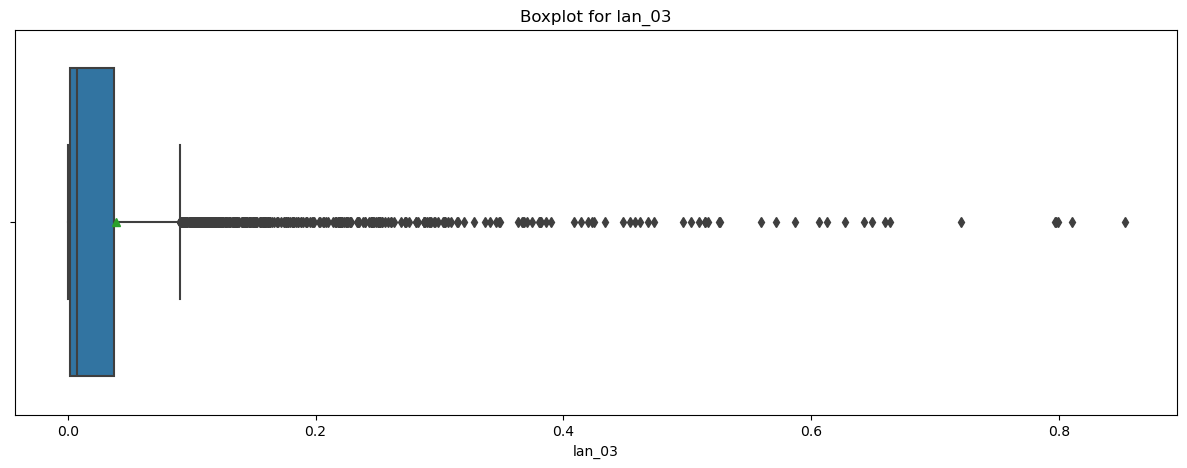

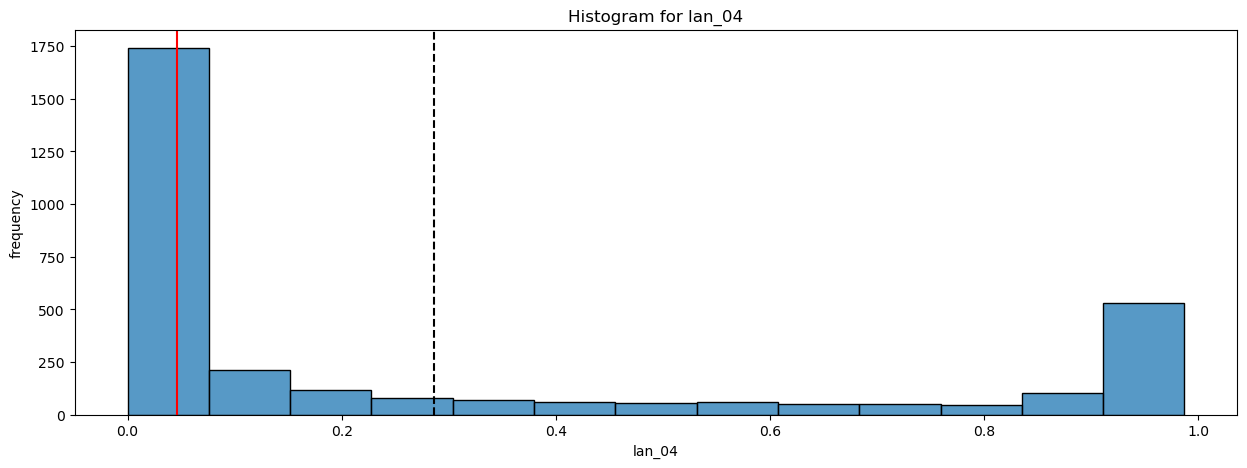

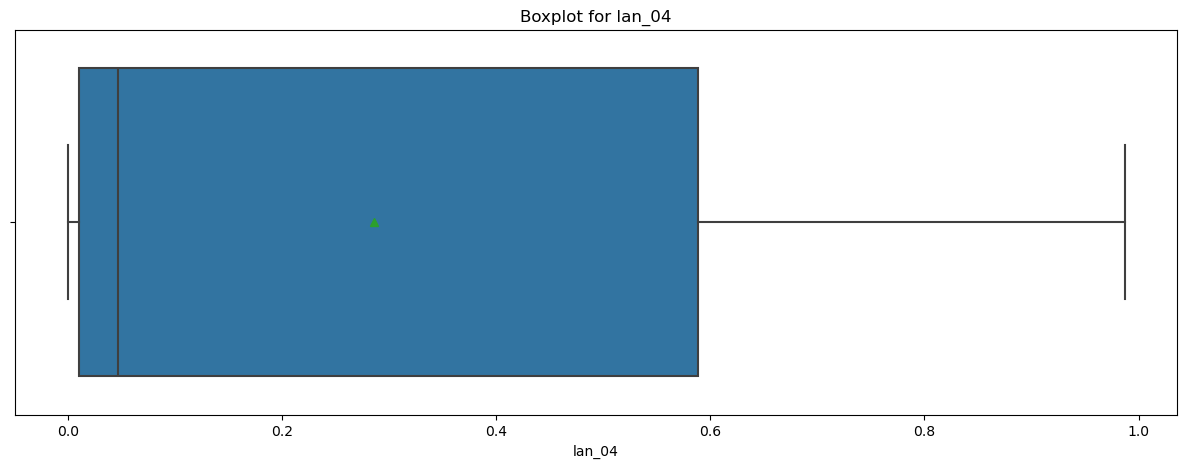

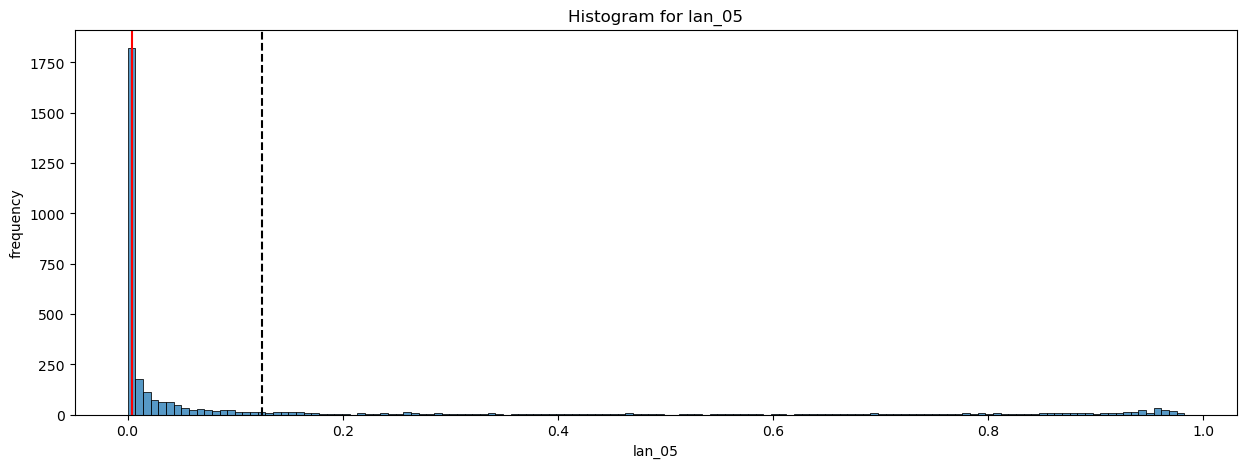

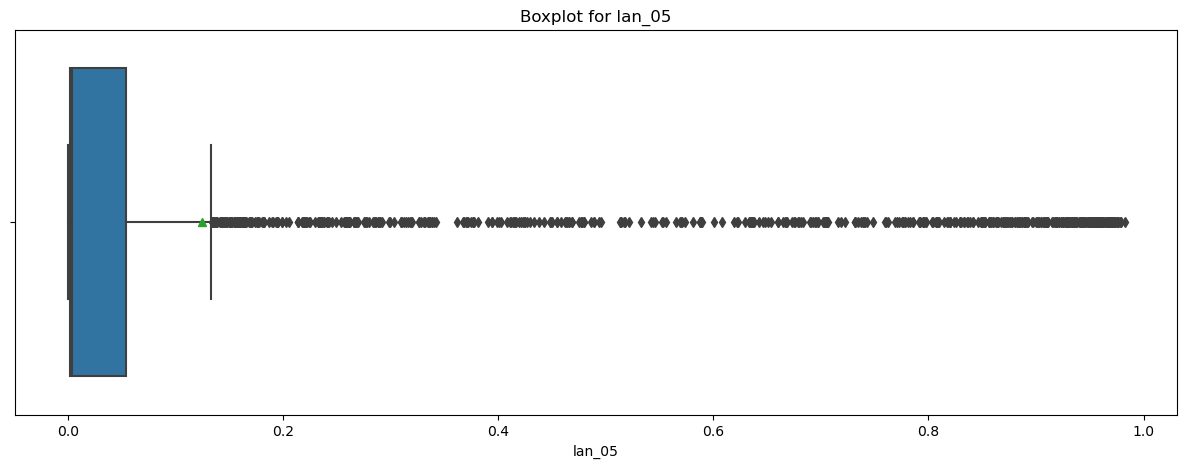

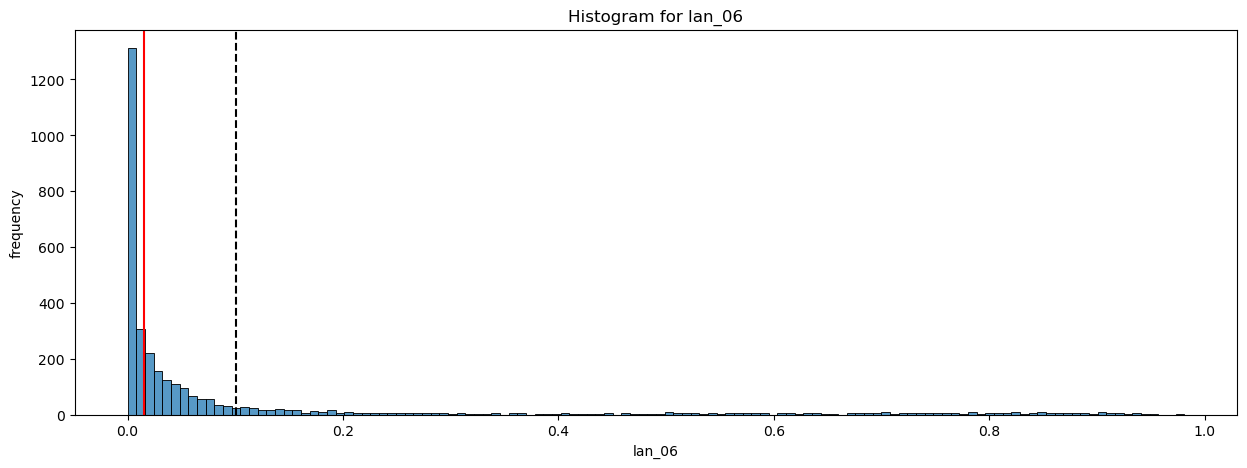

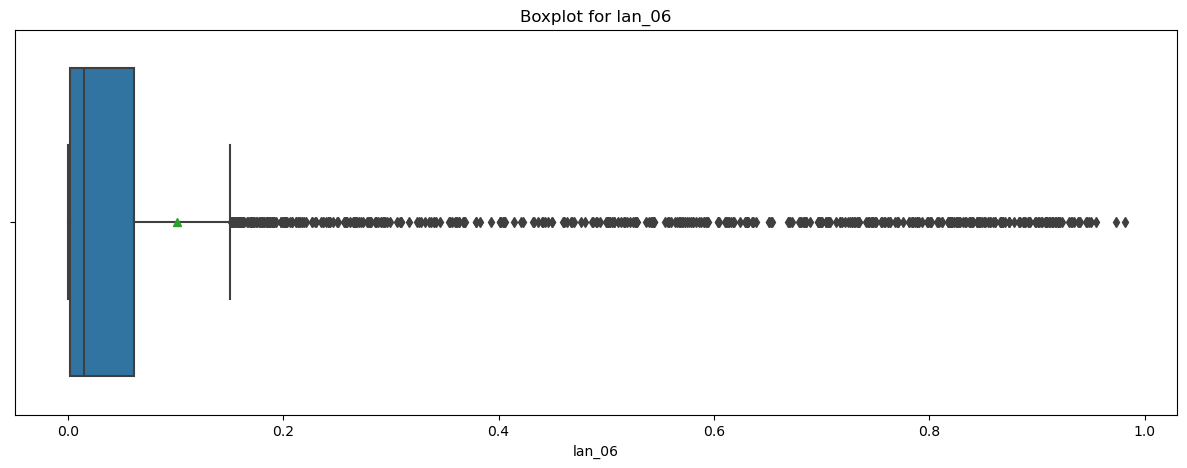

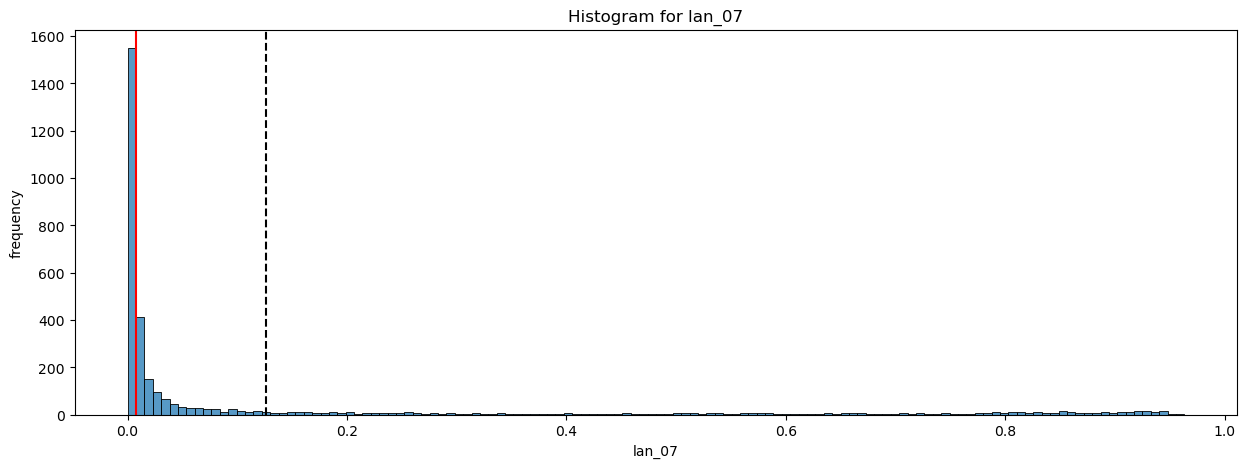

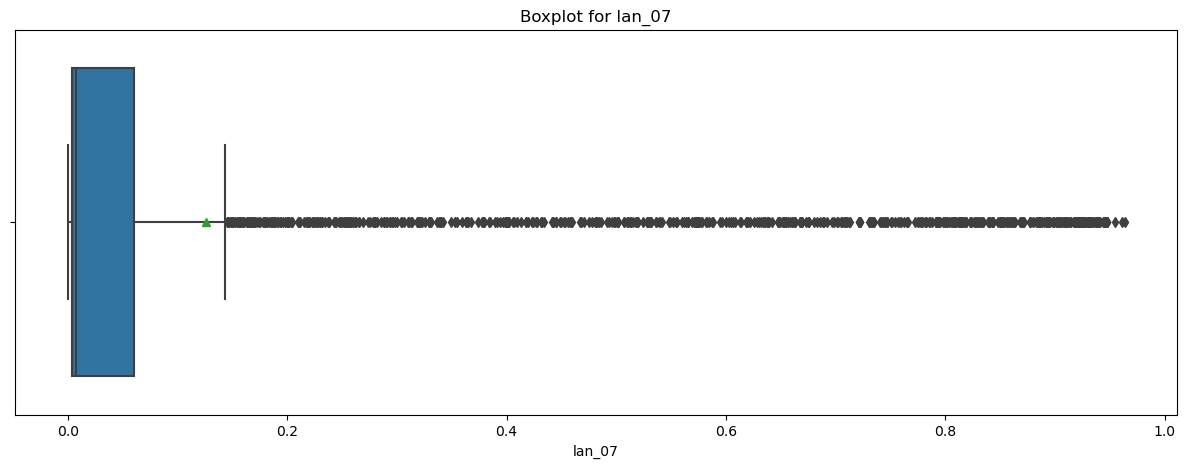

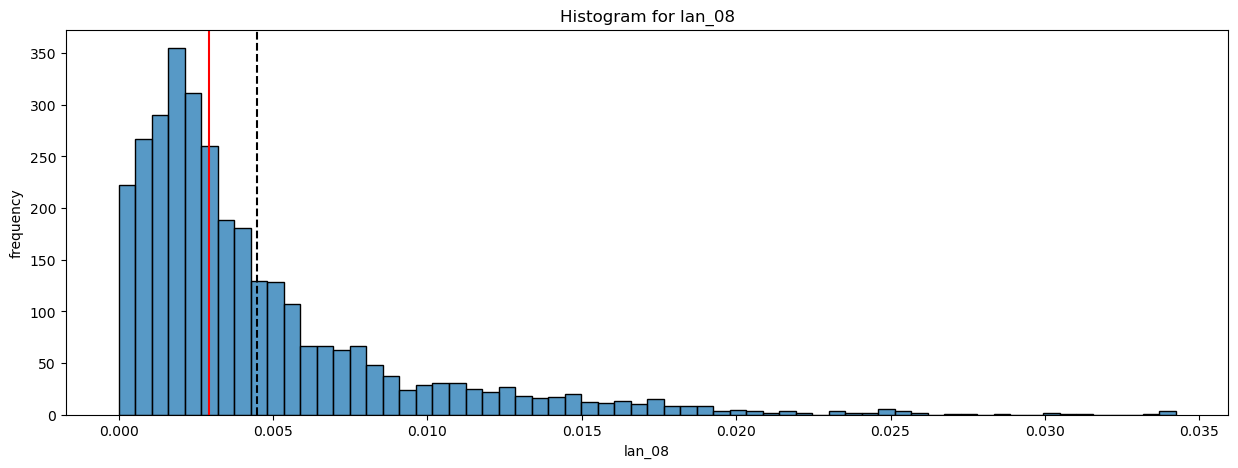

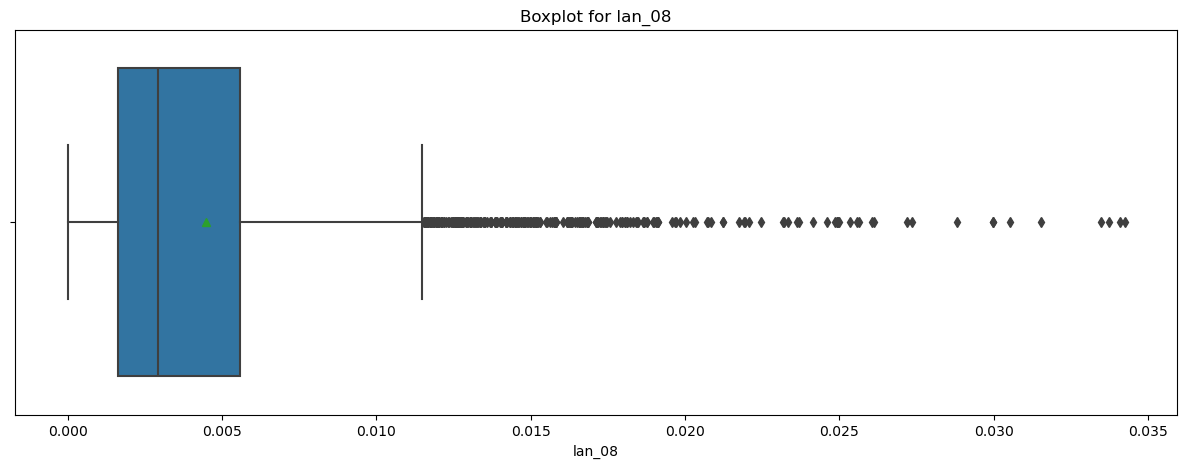

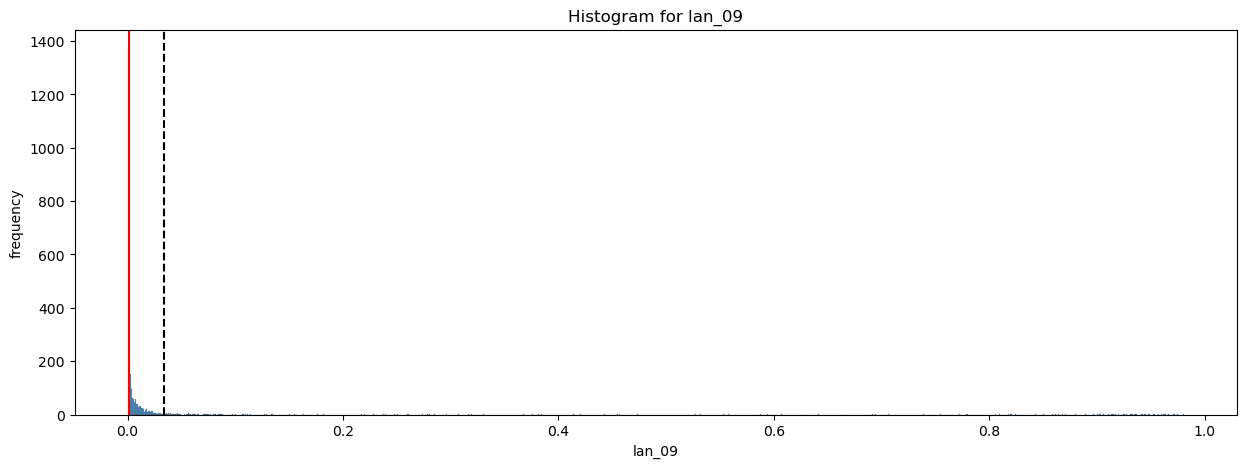

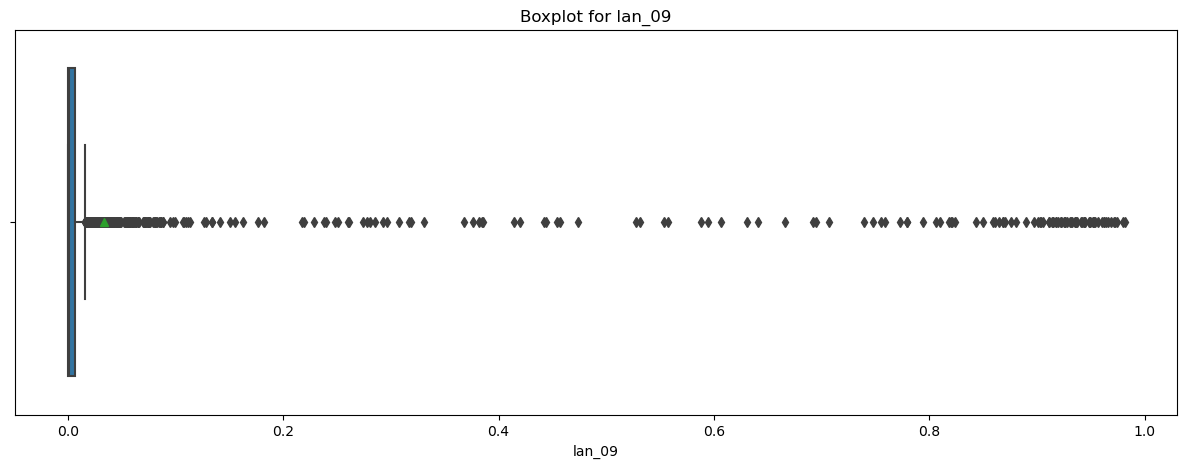

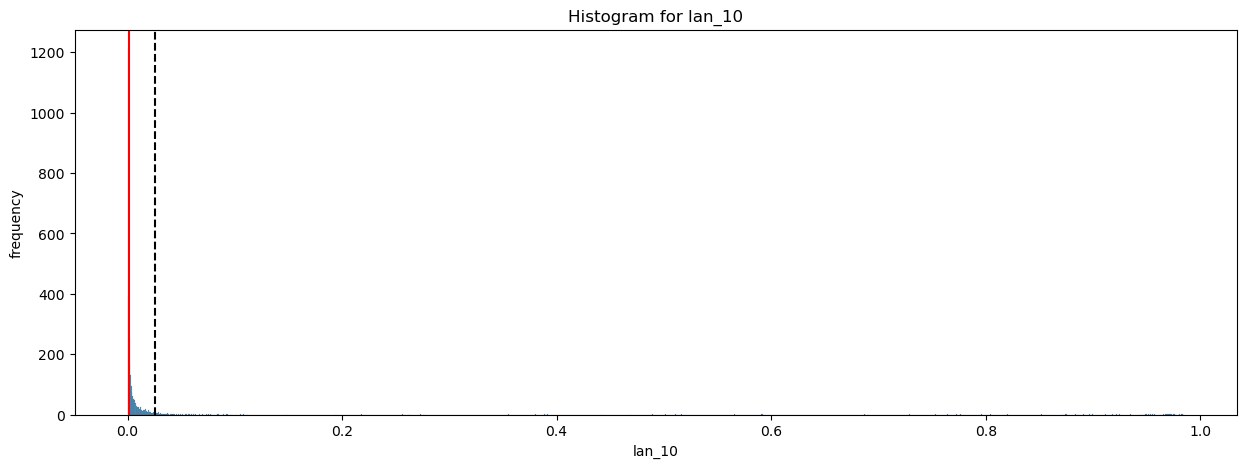

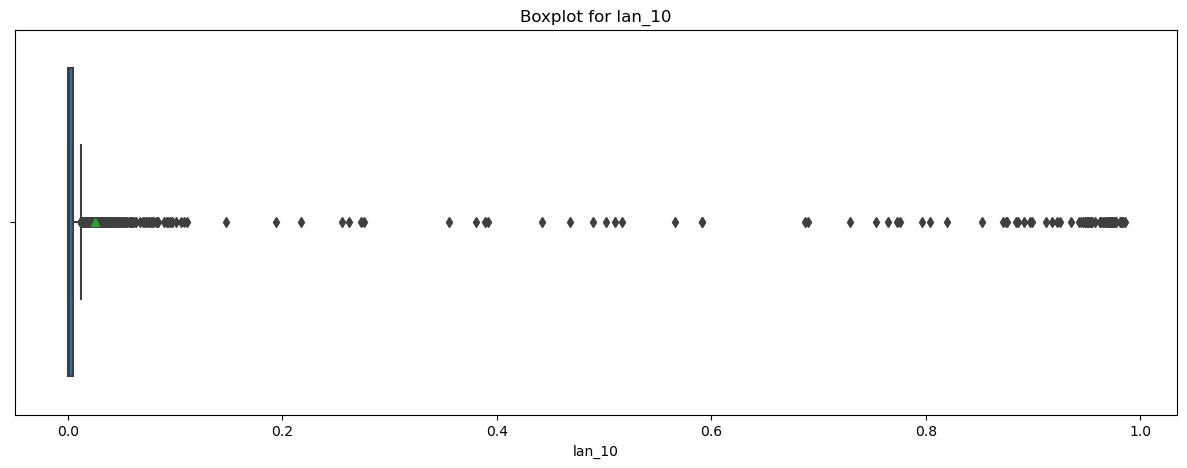

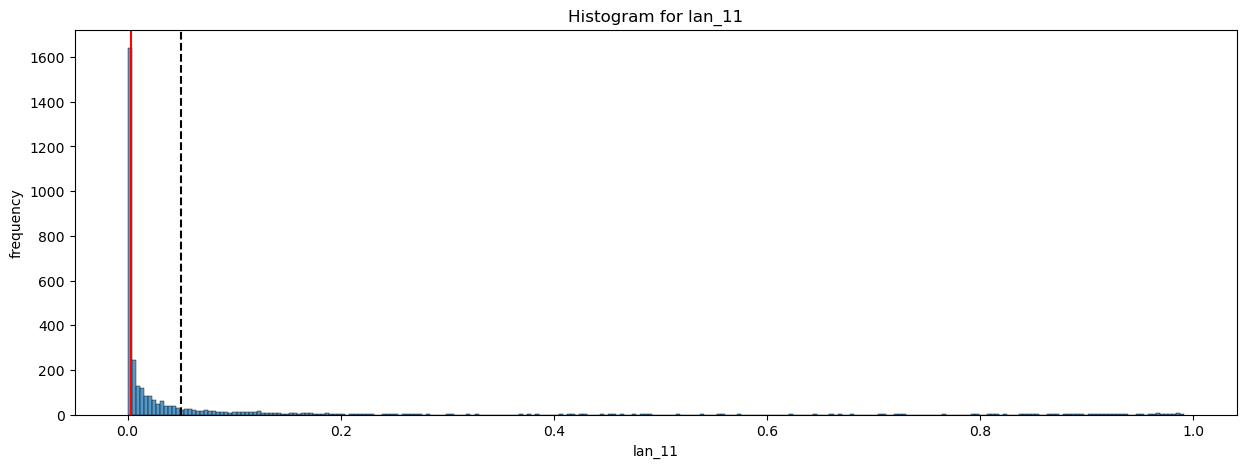

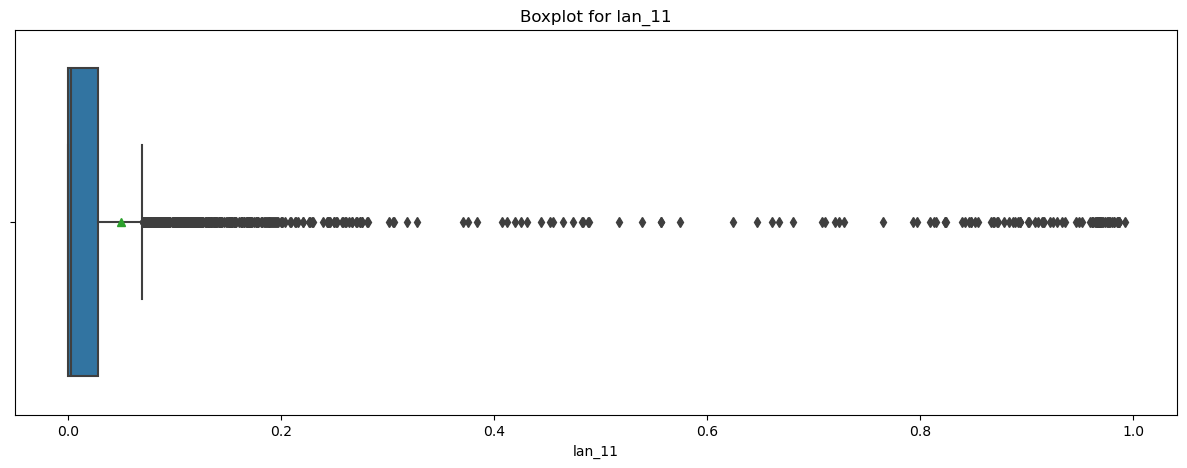

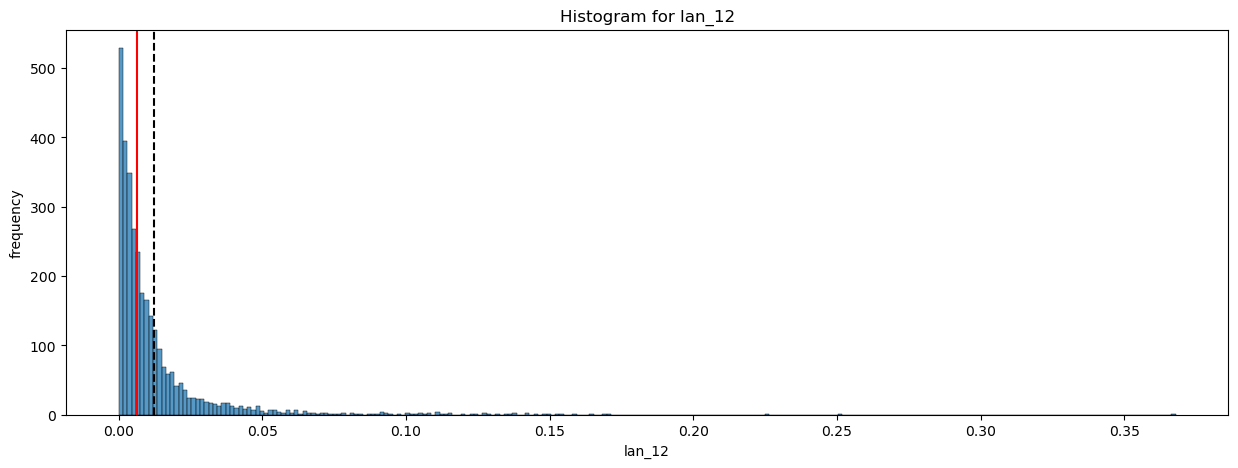

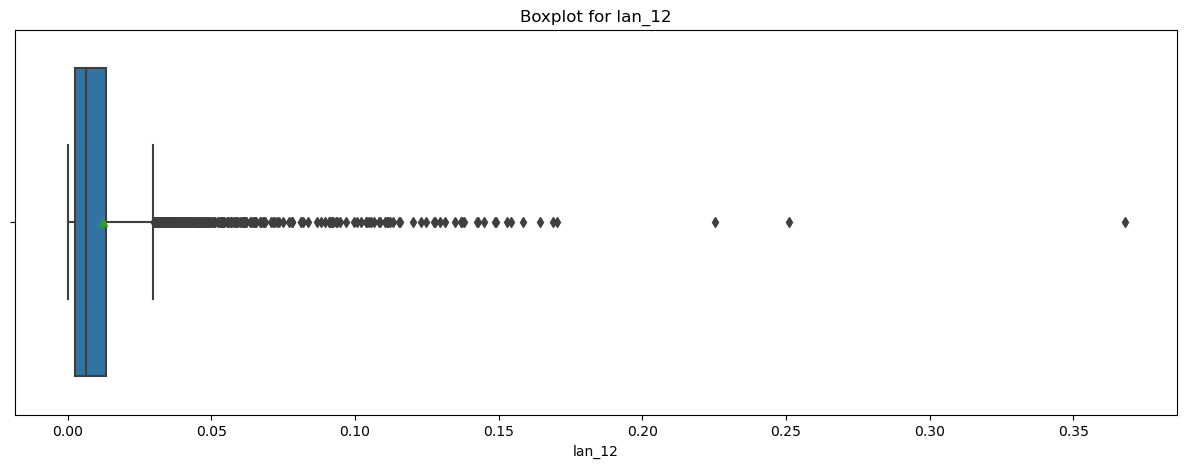

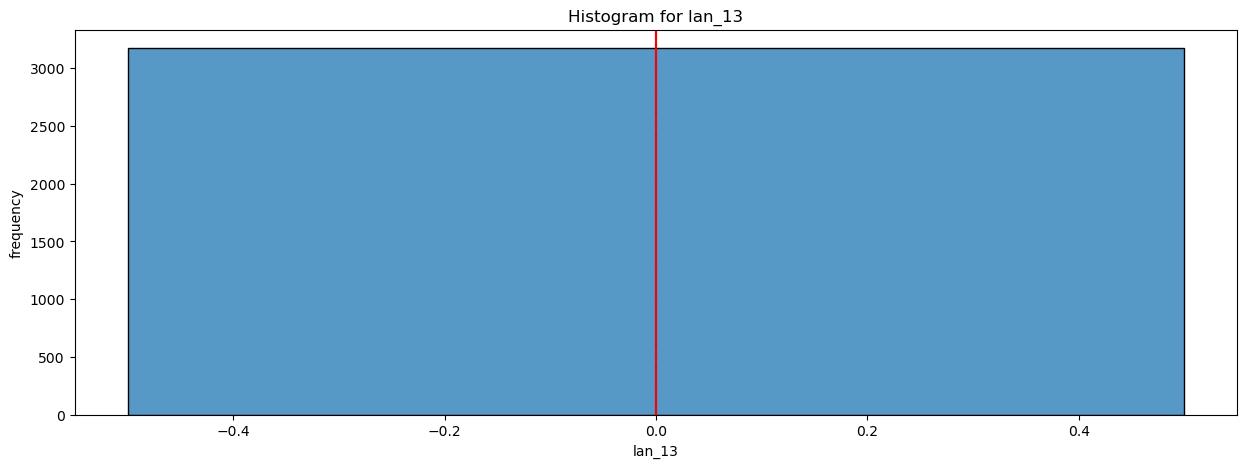

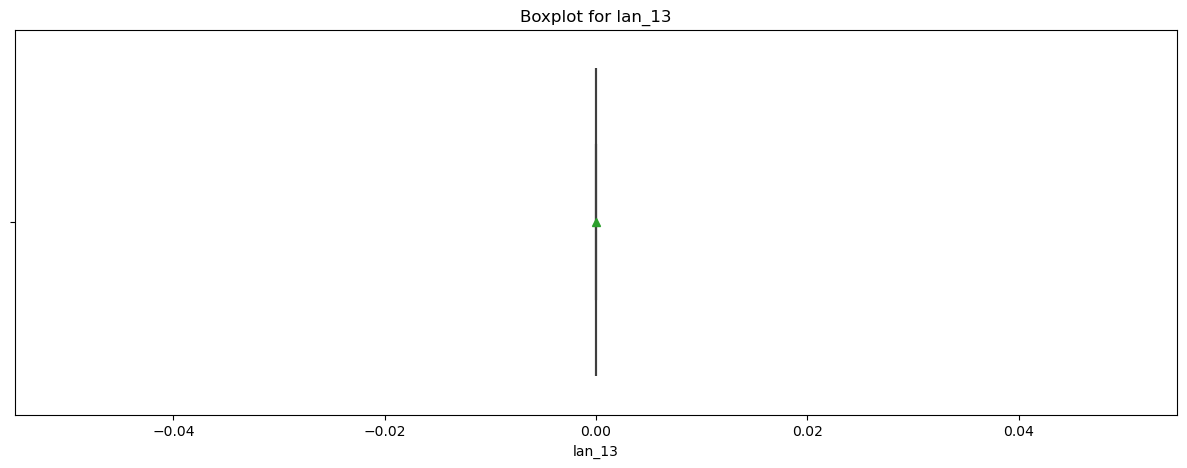

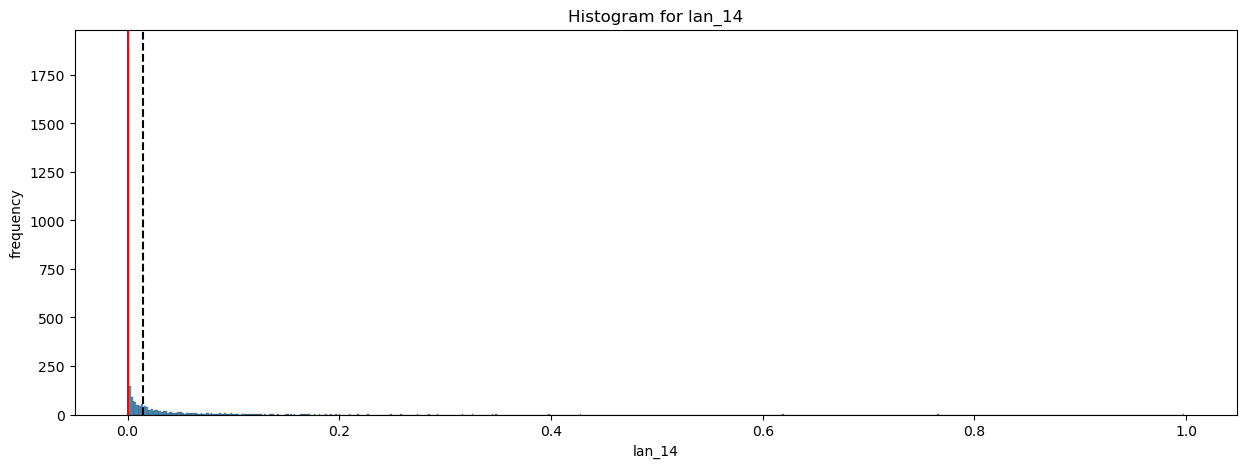

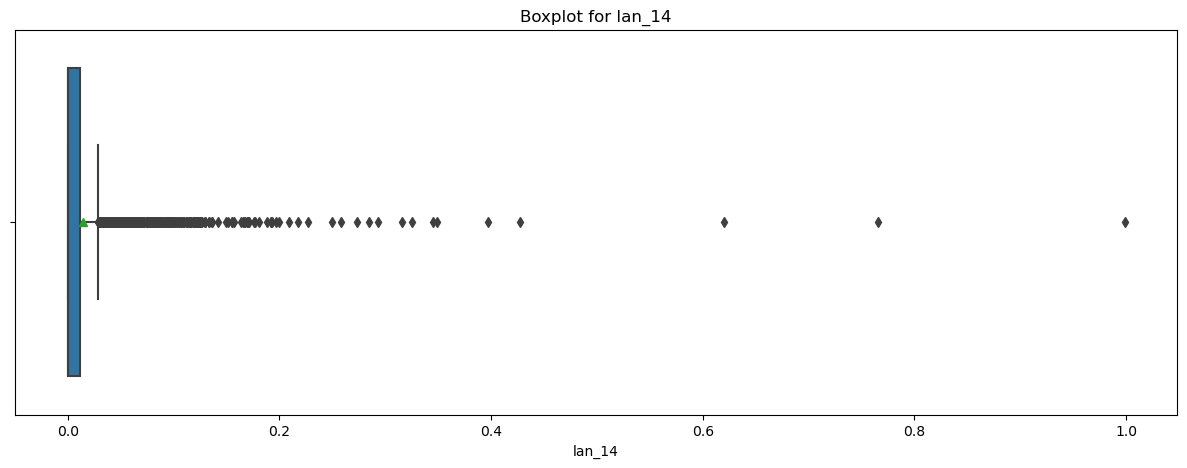

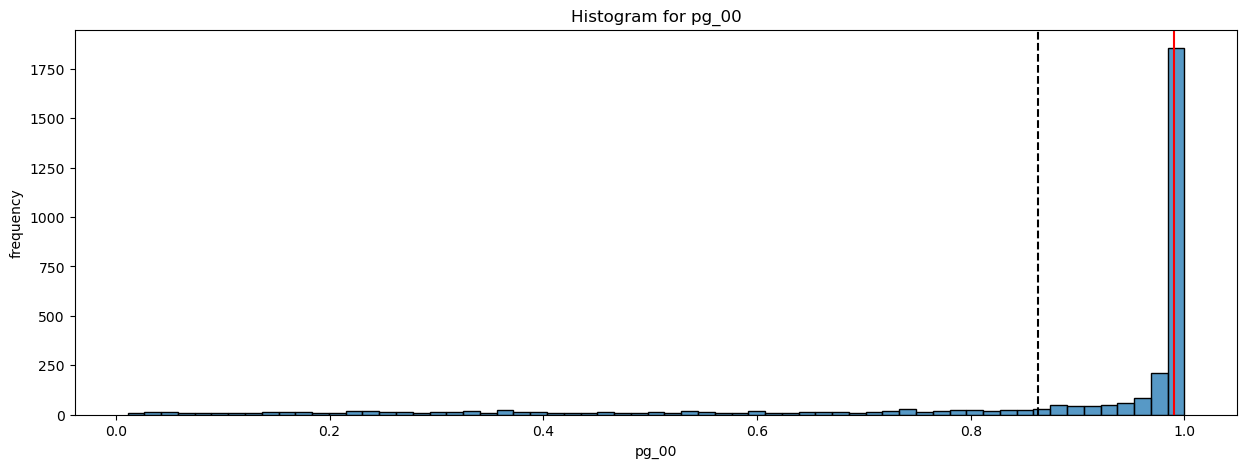

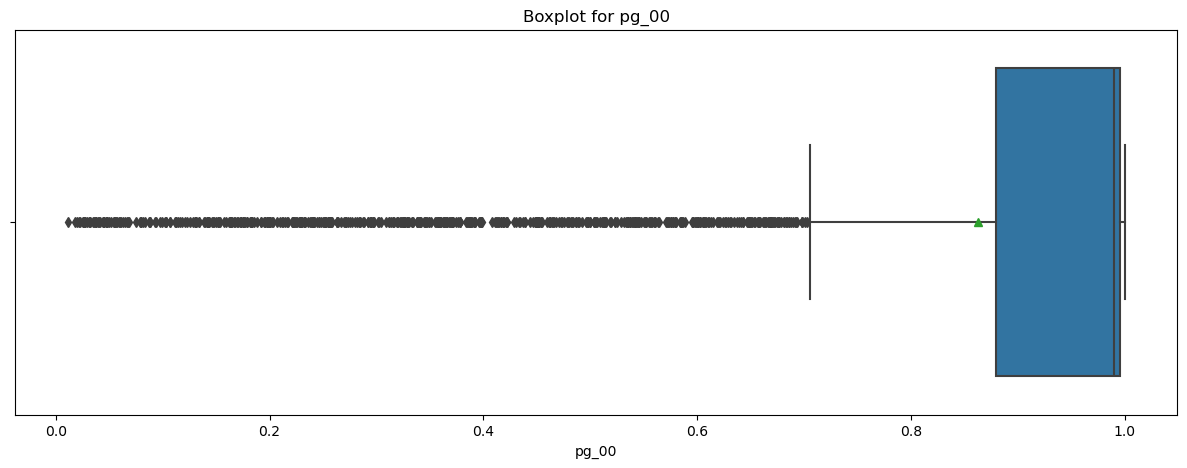

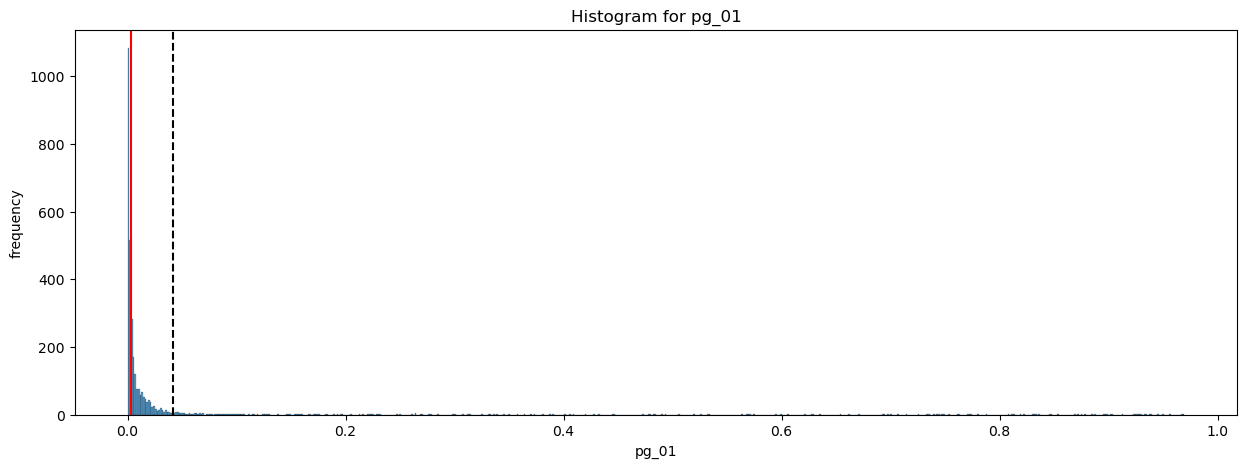

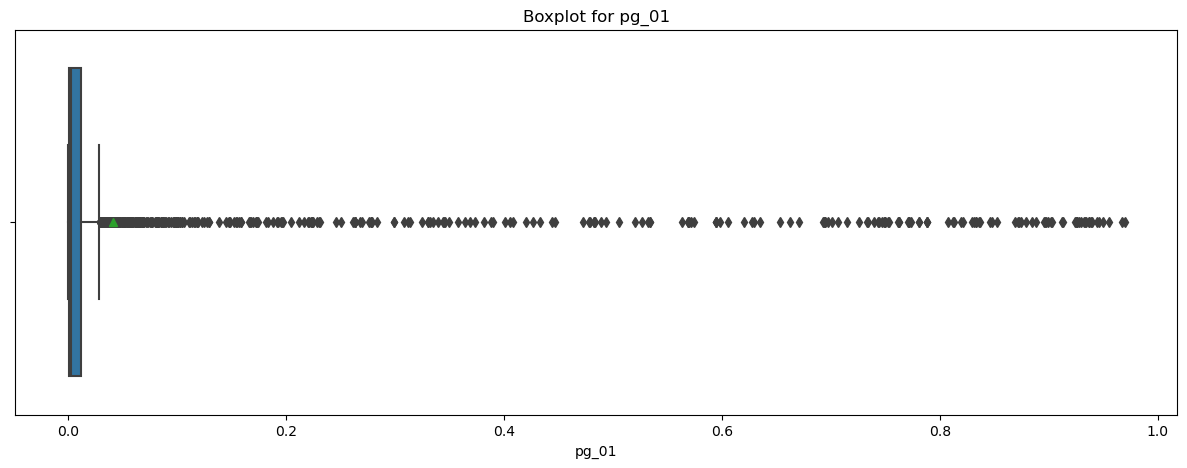

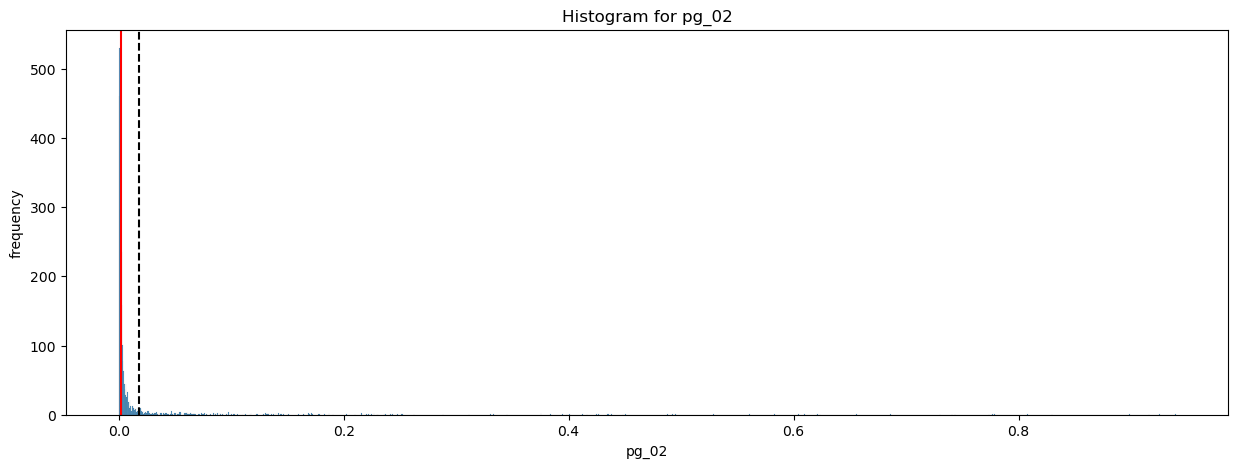

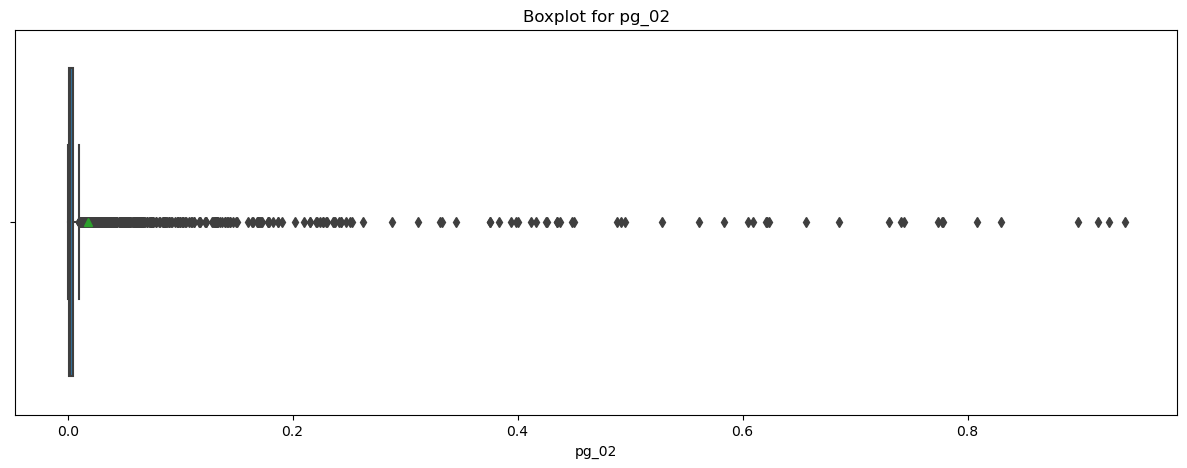

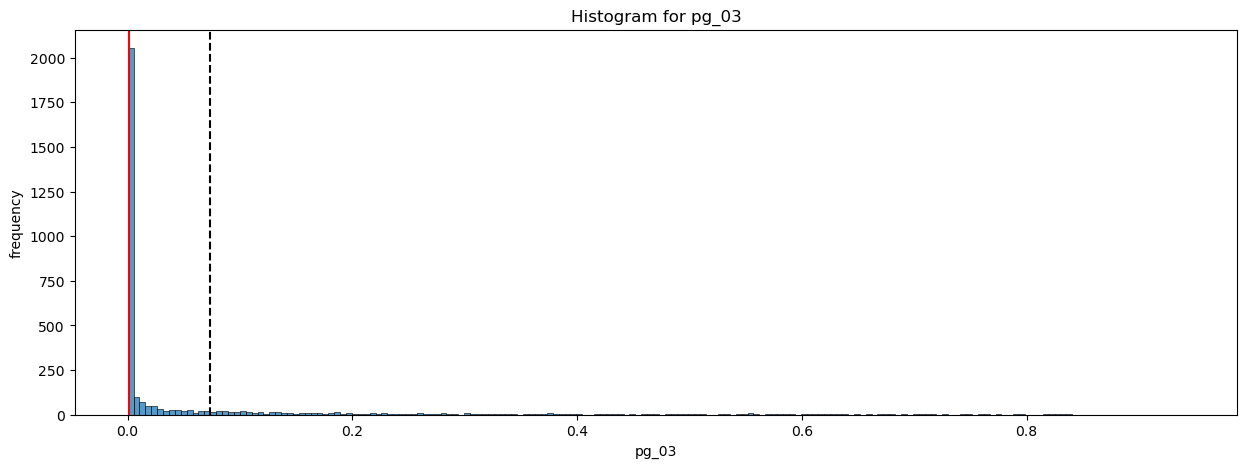

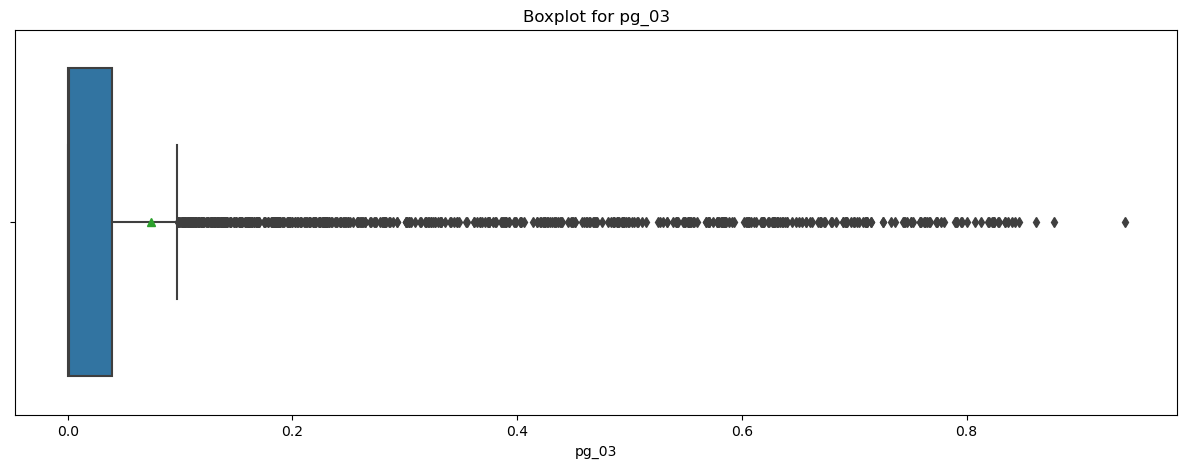

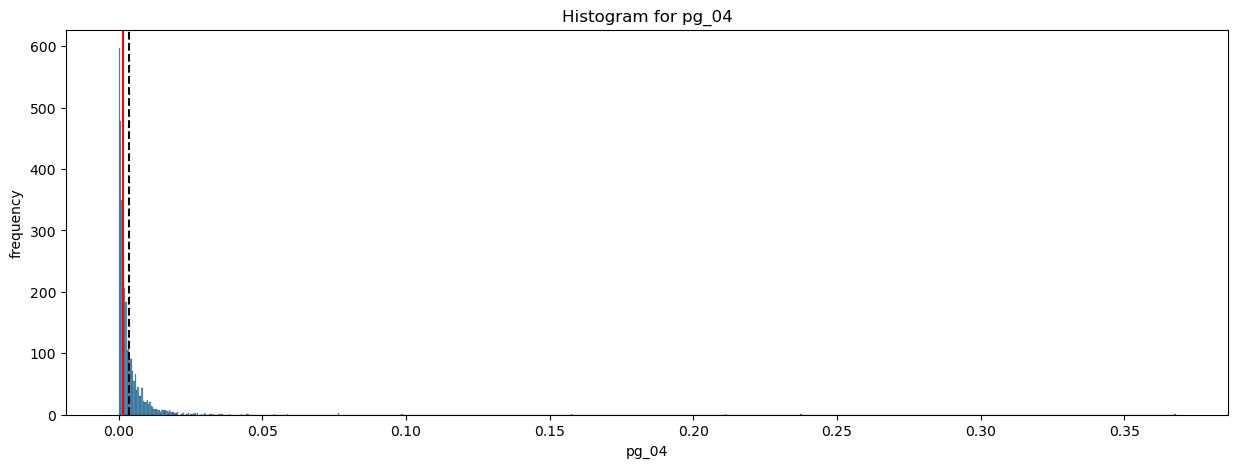

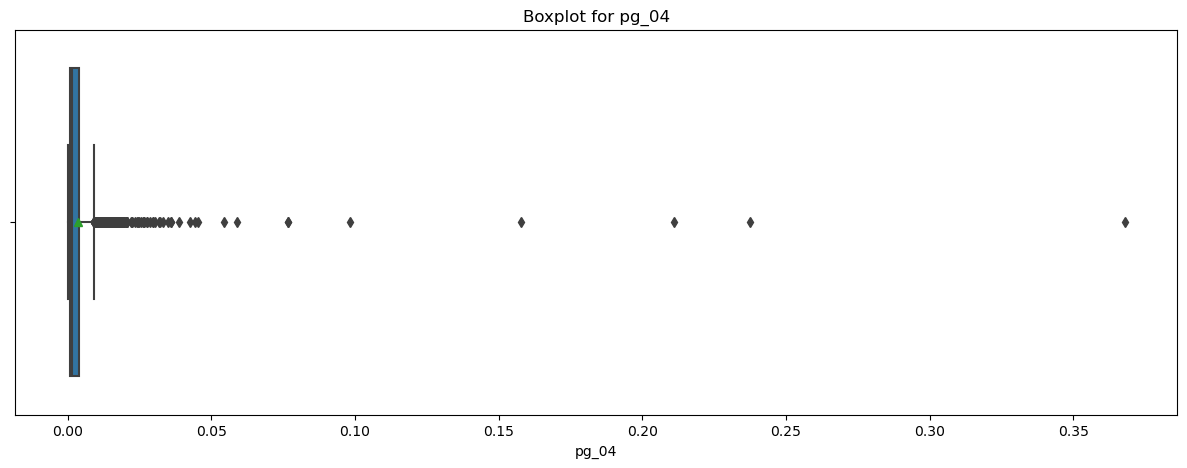

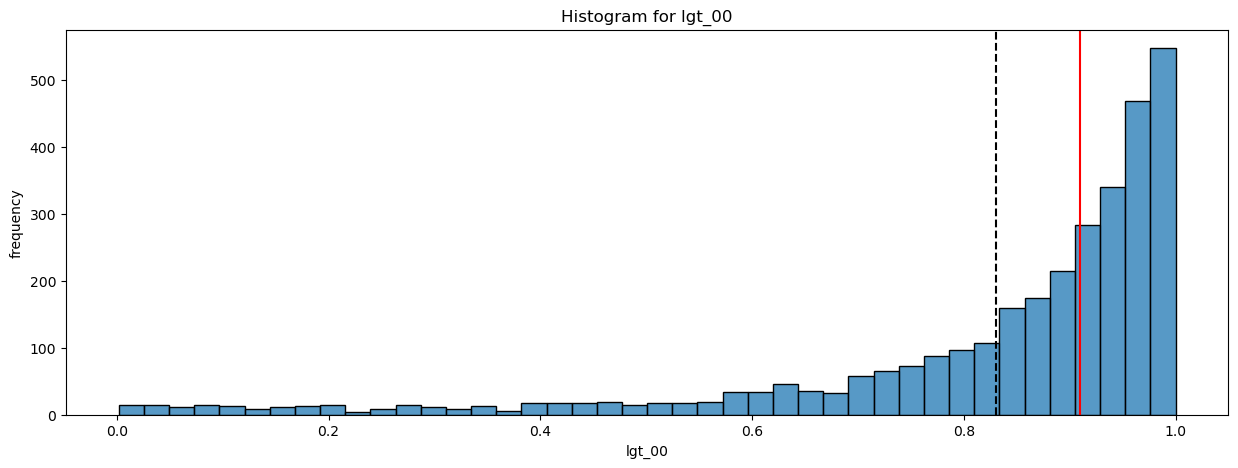

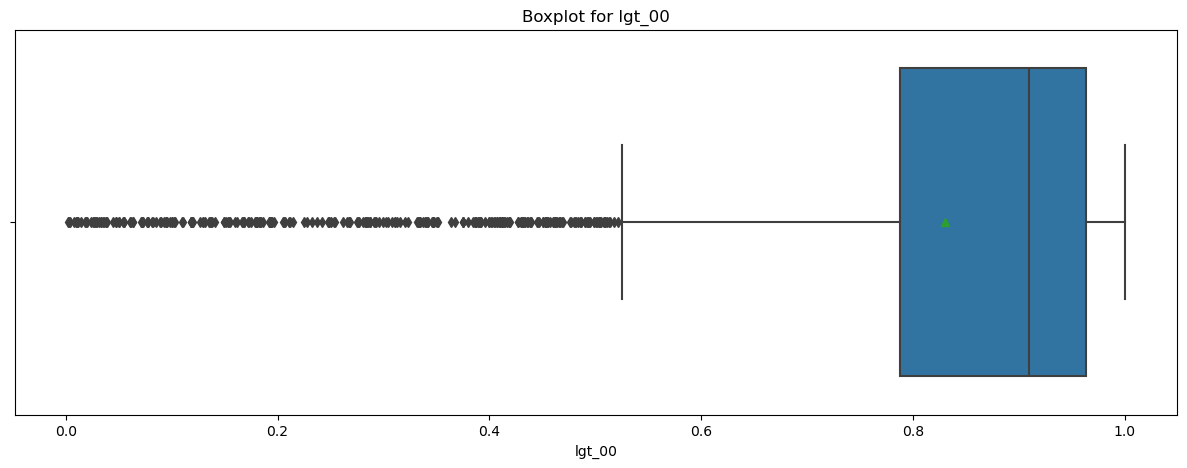

In [25]:
# Code to call the function to display the histogram and boxplots for numerical columns
for item in data[numerical_columns]:
    box_histplot(data,item)

## Categorical data analysis:

In [ ]:
# Code to select categorical columns
categorical_data = data.select_dtypes("object").columns  

In [ ]:
categorical_data

In [ ]:
## Create a function to display the bar graphs for categorical data columns
def count_plot(data,item):
    plt.figure(figsize=(5,4))            # increase the size of the plot
    sns.countplot(data=data , x=item);   # countplot for categorical columns
    plt.title(f"Countplot for {item}")   # add the title on the countplot
    plt.ylabel("frequency")              # add the label on the y-axis
    plt.xticks(rotation=90) 
    plt.show()

In [ ]:
 for variable in categorical_data:
        count_plot(green_data,variable)

### Numerical data

In [ ]:
df = data[numerical_columns].corr()

In [ ]:
## Construct a correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df,annot=True,vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Check for the presence of Mutlicollinearity 

In [26]:
### Select columns that are highly correlated
def correlation(data,cut_off):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> cut_off:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [27]:
numerical_columns= data.select_dtypes("number").columns

In [28]:
### Now lets display the highly correlated columns
feature = correlation(data[numerical_columns],0.8)
print(feature)

{'lln_00', 'lan_14', 'car_01', 'total_individuals', 'psa_01', 'lln_01', 'pg_00', 'car_00', 'stv_01', 'pg_03'}


In [ ]:
correlated_column  =  ['lan_14', 'lln_01', 'total_individuals', 'car_00', 'stv_01', 'pg_00', 'lln_00', 'psa_01', 'pg_03', 'car_01']

In [ ]:
corr_df = data[correlated_column].corr()

In [ ]:
corr_df

In [ ]:
plt.figure(figsize=(7,5))
for item in correlated_column:
    plt.subplot(5,2,2)
    sns.scatterplot(x=data[item],y=data['target_pct_vunerable'])
    plt.title(f"The Scatter plot for {item} and target_pct_vunerable")
    plt.xlabel(item)
    plt.ylabel('target_pct_vunerable')
    plt.show()

#### OUTLIER DETECTION AND TREATMENT

In [29]:
numerical_columns1= data.select_dtypes("number").columns

In [30]:
numerical_columns1

Index(['total_households', 'total_individuals', 'target_pct_vunerable',
       'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07',
       'dw_08', 'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02',
       'pg_03', 'pg_04', 'lgt_00'],
      dtype='object')

In [ ]:
plt.figure(figsize=(15, 12))
for i, variable in enumerate(numerical_columns1):
    plt.subplot(7,7, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [31]:
### Create a function to identify outliers
def outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [32]:
for column in data.columns:
    if data[column].dtypes != 'object':
        UL,LL = outliers(data[column])
        data[column] = np.where((data[column]<LL)|(data[column]>UL),np.nan,data[column])

In [33]:
## Now lets check for missing values 
data.isnull().sum()

total_households        395
total_individuals       388
target_pct_vunerable     51
dw_00                    68
dw_01                   525
dw_02                   418
dw_03                   471
dw_04                   512
dw_05                   406
dw_06                   313
dw_07                   285
dw_08                   360
dw_09                   351
dw_10                   321
dw_11                   273
dw_12                     0
dw_13                     0
psa_00                   11
psa_01                   22
psa_02                  199
psa_03                  132
psa_04                  121
stv_00                  131
stv_01                  131
car_00                  356
car_01                  356
lln_00                  338
lln_01                  338
lan_00                  569
lan_01                  492
lan_02                  370
lan_03                  389
lan_04                    0
lan_05                  583
lan_06                  473
lan_07              

In [34]:
data.head()

,total_households,total_individuals,target_pct_vunerable,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,NaN,NaN,1.740,0.355,0.005,NaN,NaN,NaN,NaN,0.015,0.044,NaN,0.005,0.001,0.007,0.000,0.000,0.193,0.627,0.000,0.071,0.109,0.275,0.725,0.344,0.656,NaN,NaN,0.013,NaN,0.010,NaN,0.300,0.002,0.015,0.005,0.004,0.004,0.001,0.002,0.028,0.000,0.027,NaN,NaN,NaN,0.029,NaN,0.599
1,NaN,NaN,1.993,0.262,0.002,NaN,0.001,0.001,0.004,NaN,NaN,NaN,NaN,0.000,0.007,0.000,0.000,0.166,0.701,0.001,0.017,0.115,0.060,0.940,0.081,0.919,0.034,0.966,0.003,0.013,0.011,NaN,0.486,0.029,0.112,0.012,0.004,0.011,0.006,0.042,0.021,0.000,0.016,0.994,0.002,0.001,0.001,0.003,0.699
2,2698.300,8261.711,0.038,0.728,0.002,0.052,NaN,0.001,0.005,NaN,NaN,0.001,0.002,0.001,0.006,0.000,0.000,0.294,0.534,0.000,0.028,0.144,0.170,0.830,0.109,0.891,0.056,0.944,0.009,0.020,0.004,NaN,0.078,0.002,NaN,0.019,0.010,0.005,0.003,0.015,0.006,0.000,NaN,0.990,0.004,0.003,0.003,0.001,0.972
3,1965.967,9069.777,7.411,0.613,0.138,0.005,0.003,0.000,0.003,0.007,NaN,0.107,0.002,0.001,0.002,0.000,0.000,0.317,0.519,0.000,0.027,0.137,0.106,0.894,0.242,0.758,0.068,0.932,0.059,0.016,0.011,0.005,0.795,0.005,0.072,0.004,0.004,0.009,0.001,0.003,0.003,0.000,0.014,0.929,0.004,0.010,0.055,0.002,0.735
4,1852.078,9908.844,8.224,0.797,0.121,0.061,0.001,0.001,0.001,0.002,0.007,0.001,0.002,0.000,0.007,0.000,0.000,0.421,0.403,0.000,0.029,0.146,0.058,0.942,0.136,0.864,0.060,0.940,0.002,0.008,0.015,0.002,0.961,0.002,0.001,0.005,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.994,0.000,0.004,0.001,0.001,0.647


### Outlier Treatment in the testing set

In [35]:
### Create a function to identify outliers
def outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [36]:
for column in data_test.columns:
    if data_test[column].dtypes != 'object':
        UL,LL = outliers(data_test[column])
        data_test[column] = np.where((data_test[column]<LL)|(data_test[column]>UL),np.nan,data_test[column])

In [37]:
## Lets check for missing values in the testing dataset
data_test.isnull().sum()

total_households     147
total_individuals    145
dw_00                  0
dw_01                  0
dw_02                110
dw_03                135
dw_04                156
dw_05                168
dw_06                113
dw_07                118
dw_08                168
dw_09                123
dw_10                105
dw_11                 95
dw_12                  0
dw_13                  0
psa_00                 0
psa_01                 4
psa_02                81
psa_03                68
psa_04                54
stv_00                29
stv_01                29
car_00                77
car_01                77
lln_00                81
lln_01                81
lan_00                 0
lan_01               159
lan_02                40
lan_03                 0
lan_04                69
lan_05                22
lan_06               159
lan_07                33
lan_08                33
lan_09                68
lan_10                76
lan_11                97
lan_12               103


### Split the data into train and validation sets

In [38]:
data1 =data.copy()

In [39]:
# Dividing train data into X and y 
X = data1.drop(['target_pct_vunerable'], axis=1)
y = data1['target_pct_vunerable']

In [40]:
# Splitting the dataset into training and validation set into a ratio of 70:30 
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.30,random_state=42)

In [41]:
print(f"The training dataset consits of {X_train.shape[0]} rows and {X_train.shape[1]} columns")

The training dataset consits of 2221 rows and 48 columns


In [42]:
print(f"The validation dataset consists of {X_val.shape[0]} rows and {X_val.shape[1]} columns")

The validation dataset consists of 953 rows and 48 columns


In [43]:
X_train.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
1071,2445.880,8600.116,0.688,0.002,0.007,0.002,0.000,0.000,0.004,NaN,0.143,0.001,0.001,0.003,0.000,0.000,0.278,0.591,0.000,0.013,0.118,0.126,0.874,0.202,0.798,0.064,0.936,NaN,0.014,0.008,NaN,0.005,0.001,0.093,NaN,0.004,0.000,0.000,0.001,0.008,0.000,0.004,0.878,NaN,0.006,0.080,0.004,0.858
261,3855.048,15212.012,0.829,0.162,0.001,0.001,0.000,0.000,0.001,0.003,0.001,0.000,0.001,0.001,0.000,0.000,0.417,0.438,0.000,0.019,0.127,0.162,0.838,0.133,0.867,0.012,0.988,0.009,0.005,0.000,0.000,0.001,0.001,0.001,0.001,0.001,0.003,NaN,0.004,0.008,0.000,0.000,0.999,0.000,0.000,0.000,0.000,0.902
3102,NaN,NaN,0.459,0.001,0.004,0.001,0.001,NaN,0.026,NaN,NaN,0.004,0.000,0.004,0.000,0.000,0.245,0.588,0.000,0.045,0.121,0.076,0.924,0.138,0.862,0.017,0.983,0.007,0.017,0.013,NaN,0.265,0.053,0.091,NaN,0.004,0.010,NaN,NaN,0.021,0.000,0.000,0.990,0.004,0.001,0.001,0.005,0.844
2448,5396.445,14984.651,0.951,0.003,0.000,NaN,0.000,0.000,0.002,0.002,0.003,0.002,0.000,0.002,0.000,0.000,0.374,0.498,0.000,0.016,0.112,0.451,0.549,0.357,0.643,0.099,0.901,0.017,NaN,0.010,0.028,0.016,0.007,0.036,NaN,0.006,0.001,0.002,0.002,NaN,0.000,0.000,0.976,0.016,0.005,0.002,0.001,0.991
195,NaN,NaN,0.943,0.001,0.001,0.000,0.000,0.000,0.025,0.016,0.004,0.005,0.000,0.003,0.000,0.000,0.274,0.567,0.001,0.048,0.110,0.327,0.673,0.309,0.691,0.110,0.890,0.011,0.026,NaN,0.053,0.581,0.075,0.110,0.046,0.004,0.011,0.003,0.023,0.008,0.000,0.012,0.990,0.005,0.001,0.001,0.003,0.990


## Data preprocessing

### Feature engineering

### Dealing with missing Values

In [44]:
X_train.isnull().sum()/X_train.shape[0] *100

total_households    12.472
total_individuals   11.977
dw_00                2.341
dw_01               17.650
dw_02               12.472
dw_03               15.308
dw_04               16.299
dw_05               12.472
dw_06                9.770
dw_07                8.915
dw_08               11.031
dw_09               10.851
dw_10               10.536
dw_11                9.590
dw_12                0.000
dw_13                0.000
psa_00               0.225
psa_01               0.495
psa_02               6.529
psa_03               4.367
psa_04               3.377
stv_00               4.367
stv_01               4.367
car_00              10.896
car_01              10.896
lln_00              10.671
lln_01              10.671
lan_00              17.695
lan_01              15.489
lan_02              11.481
lan_03              12.067
lan_04               0.000
lan_05              18.010
lan_06              15.308
lan_07              19.136
lan_08               8.510
lan_09              13.237
l

In [45]:
X_val.isnull().sum()/X_val.shape[0] *100

total_households    12.382
total_individuals   12.802
dw_00                1.679
dw_01               13.956
dw_02               14.795
dw_03               13.746
dw_04               15.740
dw_05               13.536
dw_06               10.073
dw_07                9.129
dw_08               12.067
dw_09               11.542
dw_10                9.129
dw_11                6.296
dw_12                0.000
dw_13                0.000
psa_00               0.630
psa_01               1.154
psa_02               5.666
psa_03               3.673
psa_04               4.827
stv_00               3.568
stv_01               3.568
car_00              11.962
car_01              11.962
lln_00              10.598
lln_01              10.598
lan_00              18.468
lan_01              15.530
lan_02              12.067
lan_03              12.697
lan_04               0.000
lan_05              19.203
lan_06              13.956
lan_07              19.832
lan_08               8.185
lan_09              15.740
l

In [46]:
## We need to drop columns with missing values greater than 50% in training dataset

In [47]:
## Code to print the columns with missing values greater than 50%
col_feature=[] # create an empty list
for item in data.columns:
    if ((data[item].isnull().sum()/data.shape[0])>0.50):
        col_feature.append(item)  # append the columns with missing values greater than 50% in the list
print(col_feature) 

[]


In [54]:
### code to select the numerical columns in the training dataset
train_cols = X_train.select_dtypes("number").columns

In [55]:
train_cols

Index(['total_households', 'total_individuals', 'dw_00', 'dw_01', 'dw_02',
       'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10',
       'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02', 'psa_03',
       'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00', 'lln_01',
       'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05', 'lan_06',
       'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12', 'lan_13',
       'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04', 'lgt_00'],
      dtype='object')

In [56]:
# To impute missing values
from sklearn.impute import SimpleImputer

### Perfom imputation of missing values in the training set

In [57]:
y_train.describe()

count   2182.000
mean       9.912
std       12.128
min        0.000
25%        0.460
50%        3.739
75%       17.544
max       43.630
Name: target_pct_vunerable, dtype: float64

In [58]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_train[train_cols] = median_imputer.fit_transform(X_train[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0684


In [59]:
X_train[train_cols].isnull().sum().sum()

0

In [60]:
y_train = pd.DataFrame(y_train)

In [61]:
y_train.isnull().sum().sum()

39

In [62]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
y_train = median_imputer.fit_transform(y_train)
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.007


In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2221 entries, 1071 to 860
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   total_households   2221 non-null   float64
 1   total_individuals  2221 non-null   float64
 2   dw_00              2221 non-null   float64
 3   dw_01              2221 non-null   float64
 4   dw_02              2221 non-null   float64
 5   dw_03              2221 non-null   float64
 6   dw_04              2221 non-null   float64
 7   dw_05              2221 non-null   float64
 8   dw_06              2221 non-null   float64
 9   dw_07              2221 non-null   float64
 10  dw_08              2221 non-null   float64
 11  dw_09              2221 non-null   float64
 12  dw_10              2221 non-null   float64
 13  dw_11              2221 non-null   float64
 14  dw_12              2221 non-null   float64
 15  dw_13              2221 non-null   float64
 16  psa_00             2221 non

### Imputation for categorical columns in the training dataset

In [64]:
### Imputation for categorical columns in the training dataset
## Select categorical columns and perform imputation
#categorical_train_cols=X_train.select_dtypes("object").columns

In [65]:
#categorical_train_cols

In [66]:
## Instantiate the simple imputer 
#mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
#import time
#startScript = time.time()
#X_train[categorical_train_cols] = mode_imputer.fit_transform(X_train[categorical_train_cols])
#endScript = time.time()
#display = endScript-startScript   # code to calculate the running time 
#print(f"The running time:{round(display,4)}")

In [67]:
#X_train[categorical_train_cols].isnull().sum().sum()

### Perfom imputation of missing values in the training set for numerical columns

In [68]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
X_val[train_cols] = median_imputer.fit_transform(X_val[train_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0265


In [69]:
X_val[train_cols].isnull().sum().sum()

0

In [70]:
y_val = pd.DataFrame(y_val)

In [71]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
y_val = median_imputer.fit_transform(y_val)
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0074


### Perfom imputation of missing values in the validation set for categorical columns

In [72]:
## Instantiate the simple imputer 
#mode_imputer = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
## Fit and transform the numerical columns in the training dataset
#import time
#startScript = time.time()
#X_val[categorical_train_cols] = mode_imputer.fit_transform(X_val[categorical_train_cols])
#endScript = time.time()
#display = endScript-startScript   # code to calculate the running time 
#print(f"The running time:{round(display,4)}")

In [73]:
#X_val[categorical_train_cols].isnull().sum().sum()

## Now do the same for the testing dataset

In [74]:
### Code to select the numerical columns in the testing dataset
test_cols = data_test.select_dtypes("number").columns

In [75]:
## Instantiate the simple imputer 
median_imputer = SimpleImputer(missing_values=np.nan,strategy="median")
## Fit and transform the numerical columns in the training dataset
import time
startScript = time.time()
data_test[test_cols] = median_imputer.fit_transform(data_test[test_cols])
endScript = time.time()
display = endScript-startScript   # code to calculate the running time 
print(f"The running time:{round(display,4)}")

The running time:0.0235


In [76]:
### Now check for the present of missing values
data_test[test_cols].isnull().sum().sum()

0

In [77]:
data_test.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,2514.042,8037.062,0.672,0.061,0.102,0.001,0.001,0.016,0.036,0.011,0.031,0.001,0.000,0.004,0.000,0.000,0.328,0.400,0.000,0.091,0.181,0.082,0.918,0.170,0.830,0.028,0.972,0.007,0.026,0.001,0.865,0.003,0.002,0.004,0.001,0.008,0.000,0.000,0.000,0.011,0.000,0.000,0.979,0.010,0.003,0.003,0.005,0.521
1,1829.719,7494.869,0.543,0.391,0.040,0.000,0.000,0.000,0.003,0.005,0.010,0.000,0.001,0.008,0.000,0.000,0.396,0.449,0.000,0.016,0.137,0.029,0.971,0.087,0.913,0.014,0.986,0.003,0.009,0.002,0.968,0.005,0.002,0.002,0.002,0.007,0.000,0.000,0.000,0.000,0.000,0.000,0.999,0.000,0.000,0.000,0.000,0.694
2,1721.990,5847.433,0.968,0.004,0.001,0.000,0.000,0.000,0.019,0.005,0.001,0.000,0.000,0.003,0.000,0.000,0.315,0.551,0.000,0.010,0.124,0.108,0.892,0.115,0.885,0.047,0.953,0.037,0.019,0.001,0.919,0.003,0.001,0.002,0.002,0.006,0.000,0.000,0.001,0.007,0.000,0.000,0.956,0.012,0.000,0.030,0.002,0.934
3,1846.377,7605.794,0.397,0.005,0.001,0.000,0.001,0.001,0.005,0.065,0.004,0.004,0.000,0.007,0.000,0.000,0.242,0.568,0.001,0.066,0.122,0.146,0.854,0.224,0.776,0.174,0.826,0.485,0.022,0.003,0.242,0.004,0.001,0.008,0.004,0.004,0.001,0.001,0.001,0.008,0.000,0.000,0.294,0.695,0.003,0.001,0.008,0.921
4,1754.257,4266.576,0.815,0.017,0.079,0.001,0.001,0.015,0.007,0.000,0.001,0.007,0.001,0.001,0.000,0.000,0.111,0.664,0.000,0.025,0.122,0.143,0.857,0.137,0.863,0.049,0.951,0.458,0.022,0.001,0.006,0.001,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.017,0.000,0.000,0.111,0.054,0.006,0.001,0.005,0.996


In [78]:
X_train.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
1071,2445.880,8600.116,0.688,0.002,0.007,0.002,0.000,0.000,0.004,0.013,0.143,0.001,0.001,0.003,0.000,0.000,0.278,0.591,0.000,0.013,0.118,0.126,0.874,0.202,0.798,0.064,0.936,0.005,0.014,0.008,0.005,0.005,0.001,0.093,0.006,0.004,0.000,0.000,0.001,0.008,0.000,0.004,0.878,0.002,0.006,0.080,0.004,0.858
261,3855.048,15212.012,0.829,0.162,0.001,0.001,0.000,0.000,0.001,0.003,0.001,0.000,0.001,0.001,0.000,0.000,0.417,0.438,0.000,0.019,0.127,0.162,0.838,0.133,0.867,0.012,0.988,0.009,0.005,0.000,0.000,0.001,0.001,0.001,0.001,0.001,0.003,0.001,0.004,0.008,0.000,0.000,0.999,0.000,0.000,0.000,0.000,0.902
3102,2050.172,8541.639,0.459,0.001,0.004,0.001,0.001,0.001,0.026,0.013,0.010,0.004,0.000,0.004,0.000,0.000,0.245,0.588,0.000,0.045,0.121,0.076,0.924,0.138,0.862,0.017,0.983,0.007,0.017,0.013,0.005,0.265,0.053,0.091,0.006,0.004,0.010,0.001,0.002,0.021,0.000,0.000,0.990,0.004,0.001,0.001,0.005,0.844
2448,5396.445,14984.651,0.951,0.003,0.000,0.001,0.000,0.000,0.002,0.002,0.003,0.002,0.000,0.002,0.000,0.000,0.374,0.498,0.000,0.016,0.112,0.451,0.549,0.357,0.643,0.099,0.901,0.017,0.014,0.010,0.028,0.016,0.007,0.036,0.006,0.006,0.001,0.002,0.002,0.005,0.000,0.000,0.976,0.016,0.005,0.002,0.001,0.991
195,2050.172,8541.639,0.943,0.001,0.001,0.000,0.000,0.000,0.025,0.016,0.004,0.005,0.000,0.003,0.000,0.000,0.274,0.567,0.001,0.048,0.110,0.327,0.673,0.309,0.691,0.110,0.890,0.011,0.026,0.008,0.053,0.581,0.075,0.110,0.046,0.004,0.011,0.003,0.023,0.008,0.000,0.012,0.990,0.005,0.001,0.001,0.003,0.990


In [79]:
X_train= X_train.sort_index()

In [80]:
X_train.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
1,2050.172,8541.639,0.262,0.002,0.005,0.001,0.001,0.004,0.007,0.013,0.010,0.001,0.000,0.007,0.000,0.000,0.166,0.701,0.001,0.017,0.115,0.060,0.940,0.081,0.919,0.034,0.966,0.003,0.013,0.011,0.005,0.486,0.029,0.112,0.012,0.004,0.011,0.006,0.042,0.021,0.000,0.016,0.994,0.002,0.001,0.001,0.003,0.699
2,2698.300,8261.711,0.728,0.002,0.052,0.001,0.001,0.005,0.007,0.013,0.001,0.002,0.001,0.006,0.000,0.000,0.294,0.534,0.000,0.028,0.144,0.170,0.830,0.109,0.891,0.056,0.944,0.009,0.020,0.004,0.005,0.078,0.002,0.008,0.019,0.010,0.005,0.003,0.015,0.006,0.000,0.000,0.990,0.004,0.003,0.003,0.001,0.972
3,1965.967,9069.777,0.613,0.138,0.005,0.003,0.000,0.003,0.007,0.013,0.107,0.002,0.001,0.002,0.000,0.000,0.317,0.519,0.000,0.027,0.137,0.106,0.894,0.242,0.758,0.068,0.932,0.059,0.016,0.011,0.005,0.795,0.005,0.072,0.004,0.004,0.009,0.001,0.003,0.003,0.000,0.014,0.929,0.004,0.010,0.055,0.002,0.735
4,1852.078,9908.844,0.797,0.121,0.061,0.001,0.001,0.001,0.002,0.007,0.001,0.002,0.000,0.007,0.000,0.000,0.421,0.403,0.000,0.029,0.146,0.058,0.942,0.136,0.864,0.060,0.940,0.002,0.008,0.015,0.002,0.961,0.002,0.001,0.005,0.003,0.000,0.000,0.000,0.001,0.000,0.000,0.994,0.000,0.004,0.001,0.001,0.647
5,3044.907,11450.417,0.875,0.017,0.012,0.006,0.000,0.002,0.009,0.028,0.014,0.013,0.000,0.013,0.000,0.000,0.288,0.556,0.001,0.022,0.134,0.122,0.878,0.128,0.872,0.031,0.969,0.004,0.045,0.012,0.015,0.861,0.003,0.002,0.004,0.003,0.004,0.002,0.010,0.027,0.000,0.000,0.989,0.002,0.000,0.001,0.008,0.868


In [81]:
X_val =X_val.sort_index()

In [82]:
X_val.head()

,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,2146.279,8768.716,0.355,0.005,0.004,0.001,0.000,0.001,0.015,0.044,0.009,0.005,0.001,0.007,0.000,0.000,0.193,0.627,0.000,0.071,0.109,0.275,0.725,0.344,0.656,0.033,0.967,0.013,0.015,0.010,0.005,0.300,0.002,0.015,0.005,0.004,0.004,0.001,0.002,0.028,0.000,0.027,0.992,0.002,0.001,0.029,0.001,0.599
7,3498.824,10426.116,0.543,0.007,0.004,0.001,0.000,0.007,0.020,0.001,0.003,0.005,0.000,0.004,0.000,0.000,0.266,0.536,0.001,0.052,0.145,0.623,0.377,0.167,0.833,0.033,0.967,0.005,0.015,0.003,0.032,0.015,0.005,0.133,0.032,0.002,0.000,0.002,0.007,0.020,0.000,0.000,0.992,0.002,0.001,0.001,0.001,0.995
12,2243.113,7731.917,0.781,0.082,0.002,0.001,0.000,0.004,0.002,0.042,0.067,0.001,0.000,0.013,0.000,0.000,0.353,0.492,0.000,0.022,0.132,0.375,0.625,0.174,0.826,0.061,0.939,0.011,0.011,0.002,0.007,0.051,0.001,0.010,0.003,0.003,0.000,0.000,0.002,0.006,0.000,0.016,0.997,0.001,0.000,0.001,0.001,0.921
14,1969.854,6714.730,0.867,0.027,0.001,0.002,0.000,0.005,0.007,0.051,0.035,0.001,0.000,0.005,0.000,0.000,0.301,0.556,0.001,0.009,0.133,0.104,0.896,0.114,0.886,0.017,0.983,0.003,0.027,0.006,0.000,0.008,0.001,0.003,0.006,0.002,0.000,0.000,0.001,0.003,0.000,0.000,0.996,0.000,0.002,0.001,0.001,0.916
17,1269.419,6313.010,0.945,0.012,0.002,0.001,0.000,0.000,0.001,0.036,0.002,0.001,0.000,0.001,0.000,0.000,0.365,0.511,0.000,0.011,0.112,0.386,0.614,0.220,0.780,0.011,0.989,0.002,0.012,0.005,0.004,0.010,0.003,0.014,0.090,0.002,0.000,0.001,0.002,0.009,0.000,0.000,0.993,0.000,0.002,0.002,0.003,0.968


In [83]:
X_train.shape , X_val.shape

((2221, 48), (953, 48))

In [84]:
data_test.shape

(1102, 48)

### Normalize/standardize the data

In [ ]:
# Scale the data using StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_val = scaler.transform(X_val)

### Cleaning the testing dataset

In [85]:
X_test = data_test

In [86]:
X_test =X_test.sort_index()

In [87]:
### Now normalize the testing dataset
#scaler = StandardScaler()
#X_test = scaler.fit_transform(X_test)

In [88]:
### Multicollinearity checks
##  Define a function to check VIF.
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
X.shape

In [ ]:
X_train_scaled = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
X_train_scaled.head()

In [89]:
# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# Code to check VIF on train data and arrange the feature and ViF in ascending order
vif1= checking_vif(X_train).sort_values(by="VIF",ascending=False)  

In [ ]:
['lan_14', 'lln_01', 'total_individuals', 'car_00', 'stv_01', 'pg_00', 'lln_00', 'psa_01', 'pg_03', 'car_01']

In [91]:
print(vif1)

              feature   VIF
24             car_01   inf
26             lln_01   inf
25             lln_00   inf
23             car_00   inf
22             stv_01   inf
21             stv_00   inf
17             psa_01 9.389
16             psa_00 8.647
0    total_households 2.784
1   total_individuals 2.667
31             lan_04 2.223
20             psa_04 2.073
2               dw_00 1.659
19             psa_03 1.611
42              pg_00 1.564
39             lan_12 1.563
27             lan_00 1.550
46              pg_04 1.458
43              pg_01 1.449
29             lan_02 1.446
38             lan_11 1.433
32             lan_05 1.422
33             lan_06 1.420
36             lan_09 1.395
28             lan_01 1.385
45              pg_03 1.379
37             lan_10 1.337
30             lan_03 1.313
47             lgt_00 1.312
44              pg_02 1.309
34             lan_07 1.303
9               dw_07 1.278
8               dw_06 1.257
10              dw_08 1.256
4               dw_0

In [92]:
## Lets drop the car_01 column and recheck the VIF 
X_train =X_train.drop('car_01',axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)  

,feature,VIF
24,lln_00,inf
25,lln_01,inf
22,stv_01,inf
21,stv_00,inf
17,psa_01,9.389
16,psa_00,8.647
0,total_households,2.784
1,total_individuals,2.667
30,lan_04,2.223
20,psa_04,2.073


In [93]:
### Lets drop multiples columns with higher VIF
col = ['lln_01', 'stv_01', 'lln_00', 'stv_00']
X_train =X_train.drop(col,axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)

,feature,VIF
37,pg_00,350.280
17,psa_01,151.423
42,lgt_00,93.790
16,psa_00,78.091
20,psa_04,46.144
2,dw_00,23.272
1,total_individuals,18.278
0,total_households,14.593
21,car_00,8.172
19,psa_03,6.040


In [94]:
### Lets drop the last three columns
col2 =['dw_12','dw_13','lan_13']
X_train =X_train.drop(col2,axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)

,feature,VIF
34,pg_00,350.280
15,psa_01,151.423
39,lgt_00,93.790
14,psa_00,78.091
18,psa_04,46.144
2,dw_00,23.272
1,total_individuals,18.278
0,total_households,14.593
19,car_00,8.172
17,psa_03,6.040


In [95]:
X_train =X_train.drop('pg_00',axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)  

,feature,VIF
38,lgt_00,89.488
15,psa_01,65.195
14,psa_00,45.338
18,psa_04,41.235
2,dw_00,23.264
1,total_individuals,18.276
0,total_households,14.591
19,car_00,7.951
17,psa_03,5.779
22,lan_02,4.418


In [96]:
X_train =X_train.drop('lgt_00',axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)  

,feature,VIF
15,psa_01,41.512
18,psa_04,41.151
14,psa_00,34.854
2,dw_00,21.963
1,total_individuals,18.252
0,total_households,14.590
19,car_00,7.939
17,psa_03,5.662
22,lan_02,4.418
21,lan_01,3.816


In [97]:
X_train =X_train.drop('psa_01',axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)  

,feature,VIF
17,psa_04,35.779
14,psa_00,34.666
2,dw_00,18.406
1,total_individuals,18.252
0,total_households,14.423
18,car_00,7.846
16,psa_03,5.604
21,lan_02,4.404
20,lan_01,3.800
23,lan_04,3.443


In [98]:
X_train =X_train.drop('psa_04',axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)  

,feature,VIF
14,psa_00,18.932
1,total_individuals,18.185
2,dw_00,17.983
0,total_households,14.423
17,car_00,7.841
16,psa_03,5.601
20,lan_02,4.396
19,lan_01,3.790
22,lan_04,3.440
30,lan_12,3.439


In [99]:
X_train =X_train.drop('psa_00',axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)  

,feature,VIF
1,total_individuals,16.304
0,total_households,14.208
2,dw_00,9.493
16,car_00,7.840
15,psa_03,5.592
19,lan_02,4.222
18,lan_01,3.778
29,lan_12,3.436
25,lan_08,3.293
13,dw_11,3.138


In [100]:
X_train =X_train.drop('total_individuals',axis=1)
checking_vif(X_train).sort_values(by="VIF",ascending=False)  

,feature,VIF
1,dw_00,9.083
15,car_00,7.838
0,total_households,5.672
14,psa_03,5.530
18,lan_02,4.178
17,lan_01,3.719
28,lan_12,3.434
24,lan_08,3.293
12,dw_11,3.135
20,lan_04,2.943


In [101]:
### Now the drop all highly correlated columns in the validation and testing sets
corr_col = ['car_01','dw_12','dw_13','lan_13','lln_01', 'stv_01', 'lln_00', 'stv_00',
            'total_individuals','psa_00','psa_04','psa_01','pg_00','lgt_00']
X_val =X_val.drop(corr_col,axis=1)
X_test =X_test.drop(corr_col,axis=1)

In [102]:
X_train.shape,X_val.shape,X_test.shape

((2221, 34), (953, 34), (1102, 34))

### Model Building: CATBOOST 

## Performance measures description:

In [103]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_regression_sklearn(model, predictors, target):

        # predicting using the independent variables
        pred = model.predict(predictors)
        rmse= mean_squared_error(target,pred,squared=False)  # to compute the room mean square error using the target and predicted values
        mse= mean_squared_error(target,pred,squared=True)   # compute the mean squared error  
        mae = mean_absolute_error(target, pred)  # to compute mean absolute error using target and predicted values
        r2 =r2_score(target,pred)
        
        # creating a dataframe of metrics
        df_perf = pd.DataFrame( {"Root Mean Squared error":rmse,"Mean Squared error":mse,
                                 "Mean Absolute error": mae,"R2 Score":r2},index=[0],)

        return df_perf

In [104]:
# To help with model building
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (AdaBoostRegressor,GradientBoostingRegressor, RandomForestRegressor,BaggingRegressor,)
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBRegressor

In [105]:
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.r2_score)

In [106]:
from sklearn.model_selection import  cross_val_score

In [107]:
models = {
    "Linear Regression": LinearRegression(),
     "K-Nearest Neighbors": KNeighborsRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Bagging": BaggingRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Ada boost": AdaBoostRegressor(),
    "Support Vector Machine": SVR(),
    "XGBoost":  XGBRegressor(),
}

for name, model in models.items():
    scores = cross_val_score(estimator=model, X=X_train,y=y_train,scoring=scorer,cv=3)
    print(f"{name} R2-Score: {round(np.mean(scores),4)}")

Linear Regression R2-Score: -0.0232
K-Nearest Neighbors R2-Score: -0.2138
Random Forest R2-Score: -0.0915
Bagging R2-Score: -0.1979
Gradient Boosting R2-Score: -0.1021
Ada boost R2-Score: -0.1042
Support Vector Machine R2-Score: -0.2518
XGBoost R2-Score: -0.2893


In [108]:
## Check the performamce for each model in the training data
linear_train_perf = model_performance_regression_sklearn(models["Linear Regression"].fit(X_train,
                        y_train),X_train,y_train)
kneighbor_train_perf = model_performance_regression_sklearn(models["K-Nearest Neighbors"].fit(X_train,
                        y_train),X_train,y_train)
randomf_train_perf = model_performance_regression_sklearn(models["Random Forest"].fit(X_train,
                        y_train),X_train,y_train)
bagging_train_perf = model_performance_regression_sklearn(models["Bagging"].fit(X_train,
                        y_train),X_train,y_train)
gradient_train_perf = model_performance_regression_sklearn(models["Gradient Boosting"].fit(X_train,
                        y_train),X_train,y_train)
adaboost_train_perf = model_performance_regression_sklearn(models["Ada boost"].fit(X_train,
                        y_train),X_train,y_train)
svm_train_perf = model_performance_regression_sklearn(models["Support Vector Machine"].fit(X_train,
                        y_train),X_train,y_train)
xgb_train_perf = model_performance_regression_sklearn(models["XGBoost"].fit(X_train,
                        y_train),X_train,y_train)

In [109]:
### Display the peformance measures for each model
models_train_comp_df = pd.concat([ linear_train_perf.T, kneighbor_train_perf.T,randomf_train_perf.T, 
        bagging_train_perf.T, gradient_train_perf.T, adaboost_train_perf.T, svm_train_perf.T,xgb_train_perf.T],axis=1,)
models_train_comp_df.columns = ["Linear ","KNeighbor","Random forest","Bagging",
                                "Gradient boost","Adaboost","SVM","XGBoost"]

In [110]:
## Check the performamce for each model in the validation data
linear_val_perf = model_performance_regression_sklearn(models["Linear Regression"].fit(X_val,
                        y_val),X_val,y_val)
kneighbor_val_perf = model_performance_regression_sklearn(models["K-Nearest Neighbors"].fit(X_val,
                        y_val),X_val,y_val)

randomf_val_perf = model_performance_regression_sklearn(models["Random Forest"].fit(X_val,
                        y_val),X_val,y_val)
bagging_val_perf = model_performance_regression_sklearn(models["Bagging"].fit(X_val,
                        y_val),X_val,y_val)
gradient_val_perf = model_performance_regression_sklearn(models["Gradient Boosting"].fit(X_val,
                        y_val),X_val,y_val)
adaboost_val_perf = model_performance_regression_sklearn(models["Ada boost"].fit(X_val,
                        y_val),X_val,y_val)
svm_val_perf = model_performance_regression_sklearn(models["Support Vector Machine"].fit(X_val,
                        y_val),X_val,y_val)
xgb_val_perf = model_performance_regression_sklearn(models["XGBoost"].fit(X_val,
                        y_val),X_val,y_val)

In [111]:
### Display the peformance measures for each model
models_validation_comp_df = pd.concat([linear_val_perf.T, kneighbor_val_perf.T,
randomf_val_perf.T, bagging_val_perf.T, gradient_val_perf.T, adaboost_val_perf.T, svm_val_perf.T,xgb_val_perf.T],axis=1,)
models_validation_comp_df.columns = [
    "Linear ","KNeighbor","Random forest","Bagging","Gradient boost","Adaboost","SVM","XGBoost"]


In [112]:
print("Training performance measures comparison")
models_train_comp_df

Training performance measures comparison


,Linear,KNeighbor,Random forest,Bagging,Gradient boost,Adaboost,SVM,XGBoost
Root Mean Squared error,11.949,10.887,4.698,5.445,10.160,13.000,13.483,1.526
Mean Squared error,142.770,118.519,22.070,29.646,103.231,168.992,181.791,2.328
Mean Absolute error,9.873,8.614,3.893,4.063,8.419,11.983,8.816,1.108
R2 Score,0.016,0.183,0.848,0.796,0.289,-0.165,-0.253,0.984


In [113]:
print("Validation performance measures comparison")
models_validation_comp_df

Validation performance measures comparison


,Linear,KNeighbor,Random forest,Bagging,Gradient boost,Adaboost,SVM,XGBoost
Root Mean Squared error,11.145,10.286,4.368,5.224,7.755,11.312,12.745,0.259
Mean Squared error,124.207,105.807,19.076,27.292,60.147,127.953,162.443,0.067
Mean Absolute error,8.987,8.014,3.546,3.798,6.312,9.849,8.114,0.182
R2 Score,0.043,0.185,0.853,0.790,0.537,0.014,-0.251,0.999


### XGBoost Regression 

In [114]:
model = XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.12, max_bin=256,
             max_cat_to_onehot=4, max_delta_step=0, max_depth=4, max_leaves=0,
             min_child_weight=4, monotone_constraints='()',
             n_estimators=60, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=123, reg_alpha=0.1, reg_lambda=1,subsample=0.7)
xgboost_model = model.fit(X_train,y_train)

In [115]:
## Check the performamce for each model in the training data of the imbalanced data 
xg_train_perf = model_performance_regression_sklearn(xgboost_model,X_train,y_train)
## Check the performamce for each model in the imbalanced validation data
xg_val_perf= model_performance_regression_sklearn(xgboost_model,X_val,y_val)

In [116]:
xg_perf = pd.concat([xg_train_perf.T,xg_val_perf.T],axis=1)
xg_perf.columns =["Training","Validation"]

In [117]:
print("XGBoost Peformance measures on the original data")
xg_perf

XGBoost Peformance measures on the original data


,Training,Validation
Root Mean Squared error,9.407,11.683
Mean Squared error,88.488,136.502
Mean Absolute error,7.711,9.697
R2 Score,0.390,-0.052


##  Feature importances

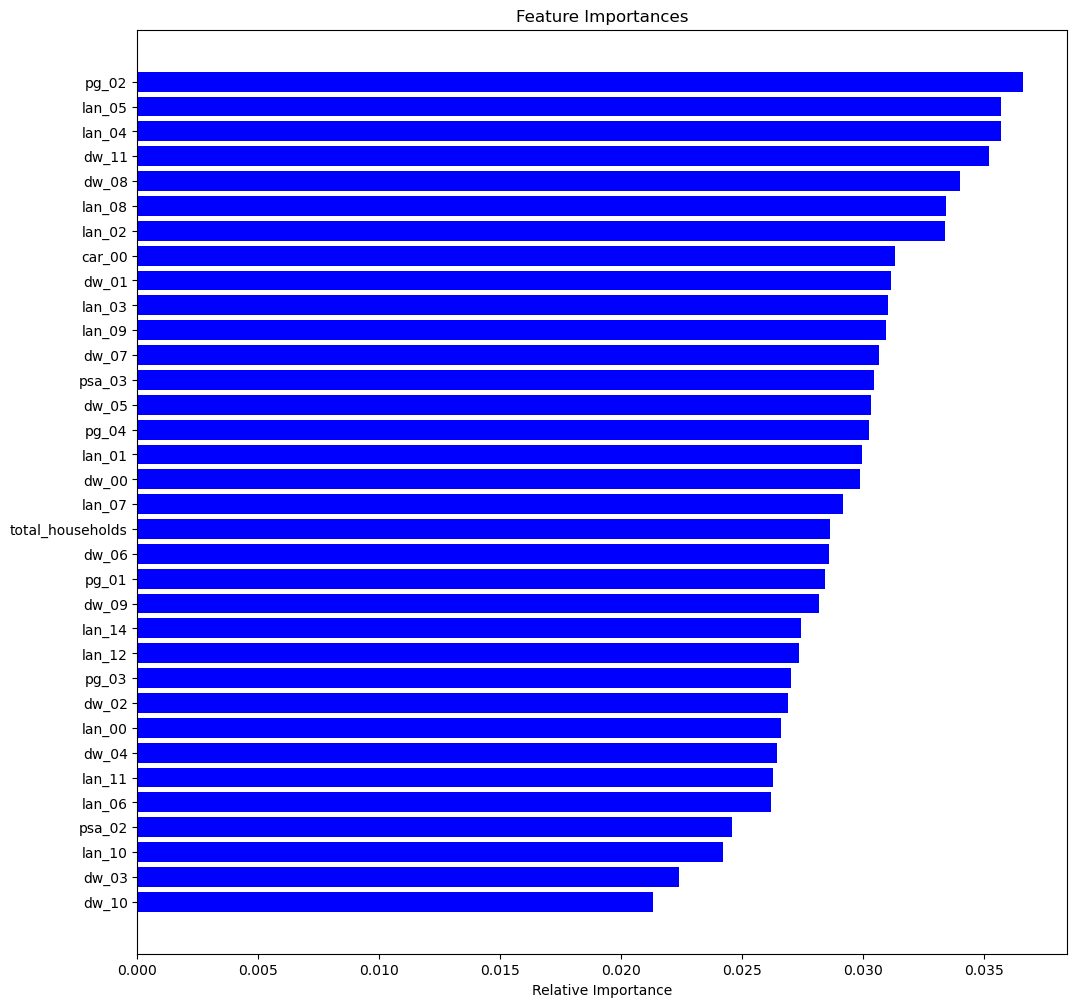

In [118]:
 ## Code to check the feature importance on the best model
feature_names = X_train.columns
importances =xgboost_model.feature_importances_   
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [119]:
test_data.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00
0,00A93O0,2514.042,8037.062,0.672,0.061,0.102,0.007,0.021,0.016,0.036,0.011,0.031,0.001,0.005,0.039,0,0,0.328,0.400,0.000,0.091,0.181,0.082,0.918,0.170,0.830,0.028,0.972,0.007,0.026,0.001,0.865,0.010,0.002,0.004,0.001,0.008,0.000,0.000,0.000,0.011,0,0.064,0.979,0.010,0.003,0.003,0.005,0.521
1,01V40KO,1829.719,7494.869,0.543,0.391,0.040,0.000,0.000,0.000,0.003,0.005,0.010,0.000,0.001,0.008,0,0,0.396,0.449,0.002,0.016,0.137,0.029,0.971,0.087,0.913,0.014,0.986,0.003,0.009,0.002,0.968,0.005,0.002,0.002,0.002,0.007,0.000,0.000,0.000,0.000,0,0.000,0.999,0.000,0.000,0.000,0.000,0.694
2,01ZHVW0,1721.990,5847.433,0.968,0.004,0.001,0.000,0.000,0.000,0.019,0.005,0.001,0.000,0.000,0.003,0,0,0.315,0.551,0.000,0.010,0.124,0.108,0.892,0.115,0.885,0.047,0.953,0.037,0.019,0.001,0.919,0.003,0.001,0.002,0.002,0.006,0.000,0.002,0.001,0.007,0,0.000,0.956,0.012,0.000,0.030,0.002,0.934
3,028YQJX,12388.023,52211.669,0.397,0.005,0.001,0.000,0.001,0.198,0.005,0.065,0.317,0.004,0.000,0.007,0,0,0.242,0.568,0.001,0.066,0.122,0.146,0.854,0.224,0.776,0.174,0.826,0.485,0.240,0.003,0.242,0.004,0.001,0.008,0.004,0.004,0.001,0.001,0.001,0.008,0,0.000,0.294,0.695,0.003,0.001,0.008,0.921
4,02G8W11,1754.257,4266.576,0.815,0.017,0.079,0.009,0.048,0.015,0.007,0.000,0.001,0.007,0.001,0.001,0,0,0.111,0.664,0.000,0.025,0.201,0.723,0.277,0.931,0.069,0.809,0.191,0.458,0.335,0.001,0.006,0.001,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.017,0,0.179,0.111,0.054,0.006,0.823,0.005,0.996


In [121]:
X_test.shape

(1102, 34)

In [122]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data['target_pct_vunerable'] = xgboost_model.predict(X_test)

In [123]:
test_data.head()

,ward,total_households,total_individuals,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,target_pct_vunerable
0,00A93O0,2514.042,8037.062,0.672,0.061,0.102,0.007,0.021,0.016,0.036,0.011,0.031,0.001,0.005,0.039,0,0,0.328,0.400,0.000,0.091,0.181,0.082,0.918,0.170,0.830,0.028,0.972,0.007,0.026,0.001,0.865,0.010,0.002,0.004,0.001,0.008,0.000,0.000,0.000,0.011,0,0.064,0.979,0.010,0.003,0.003,0.005,0.521,13.242
1,01V40KO,1829.719,7494.869,0.543,0.391,0.040,0.000,0.000,0.000,0.003,0.005,0.010,0.000,0.001,0.008,0,0,0.396,0.449,0.002,0.016,0.137,0.029,0.971,0.087,0.913,0.014,0.986,0.003,0.009,0.002,0.968,0.005,0.002,0.002,0.002,0.007,0.000,0.000,0.000,0.000,0,0.000,0.999,0.000,0.000,0.000,0.000,0.694,14.363
2,01ZHVW0,1721.990,5847.433,0.968,0.004,0.001,0.000,0.000,0.000,0.019,0.005,0.001,0.000,0.000,0.003,0,0,0.315,0.551,0.000,0.010,0.124,0.108,0.892,0.115,0.885,0.047,0.953,0.037,0.019,0.001,0.919,0.003,0.001,0.002,0.002,0.006,0.000,0.002,0.001,0.007,0,0.000,0.956,0.012,0.000,0.030,0.002,0.934,19.401
3,028YQJX,12388.023,52211.669,0.397,0.005,0.001,0.000,0.001,0.198,0.005,0.065,0.317,0.004,0.000,0.007,0,0,0.242,0.568,0.001,0.066,0.122,0.146,0.854,0.224,0.776,0.174,0.826,0.485,0.240,0.003,0.242,0.004,0.001,0.008,0.004,0.004,0.001,0.001,0.001,0.008,0,0.000,0.294,0.695,0.003,0.001,0.008,0.921,20.644
4,02G8W11,1754.257,4266.576,0.815,0.017,0.079,0.009,0.048,0.015,0.007,0.000,0.001,0.007,0.001,0.001,0,0,0.111,0.664,0.000,0.025,0.201,0.723,0.277,0.931,0.069,0.809,0.191,0.458,0.335,0.001,0.006,0.001,0.000,0.003,0.001,0.000,0.000,0.000,0.000,0.017,0,0.179,0.111,0.054,0.006,0.823,0.005,0.996,9.452


In [128]:
data_df =pd.DataFrame({"ward":test_data["ward"],'target_pct_vunerable':test_data['target_pct_vunerable']/4})

In [129]:
data_df.head()

,ward,target_pct_vunerable
0,00A93O0,3.311
1,01V40KO,3.591
2,01ZHVW0,4.850
3,028YQJX,5.161
4,02G8W11,2.363


In [130]:
data_df.tail()

,ward,target_pct_vunerable
1097,ZV3KA4K,4.123
1098,ZV99Z7P,4.078
1099,ZVO9F7A,5.228
1100,ZVVA1LV,3.679
1101,ZXHN2A8,3.988


In [131]:
 # code to save the predicted dataset as a csv file
data_df.to_csv("Submission_file(Covid3).csv",index=False)   # code to save the predicted values as a csv file

##### Benchmark

### Lightgbm Regression

In [ ]:
import lightgbm as lgb

In [ ]:
dtrain = lgb.Dataset(X_train,label=y_train)
dvalid = lgb.Dataset(X_val,label=y_val)

In [ ]:
### Now lets first specify the lightgbm parameters a dictionary
parameter = { 'objective':'regression' , 'metric':'rmse',
             'is_unbalance':'true', 'boosting':'gbdt','max_depth':7,'min_data_in_leaf':120,
             'num_leaves':127, 'feature_fraction': 0.5,
             'bagging_fraction':0.5,'bagging_freq':20,
             'learning_rate':0.01 ,'verbose': -1    
}

In [ ]:
lgb_model = lgb.train(parameter,dtrain,valid_sets=dvalid,num_boost_round=5000,
                      callbacks=[lgb.early_stopping(stopping_rounds=100)])

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
y_train_pred =lgb_model.predict(X_train)
print(f"The training AUC is {round(roc_auc_score(y_train,y_train_pred),4)}")

In [ ]:
y_valid_pred = lgb_model.predict(X_val)
print(f"The Validation AUC is {round(roc_auc_score(y_val,y_valid_pred),4)}")

In [ ]:
## Check the performamce for each model in the training data of the imbalanced data 
lgb_train_perf = model_performance_classification_sklearn(lgb_model,X_train,y_train)
## Check the performamce for each model in the imbalanced validation data
lgb_val_perf = model_performance_classification_sklearn(lgb_model,X_val,y_val)
lgb_perf = pd.concat([lgb_train_perf.T,lgb_val_perf.T],axis=1)
lgb_perf.columns =["Training","Validation"]

In [ ]:
print("Peformance measures on the original data")
lgb_perf

### Feature importances for LIGHTGBM REGRESSION

In [ ]:
## Code to check the feature importance on the best model
feature_names = X_train.columns
importances =lgb_model.feature_importances_   
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test_data['target_pct_vunerable'] = lgb_model.predict(X_test)

In [ ]:
data_df2 =pd.DataFrame({"ward":test_data["ward"],'target_pct_vunerable':test_data['target_pct_vunerable']})

In [ ]:
# code to save the predicted dataset as a csv file
data_df2.to_csv("Submission_file(Covid3).csv",index=False) 

### CATBOOST REGRESSION

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
### Code to select all the features on the training dataset
features = list(X_train.columns)

In [ ]:
### Code to select categorical features
cat_features = np.where(X_train.dtypes !=float)[0]

In [ ]:
### Instantiate the Catboost model
model_over= CatBoostRegressor( 
                          iterations=10000,
                          eval_metric="RMSE",
                          learning_rate=0.001,
                          depth=3,
                          loss_function ="RMSE",
                          random_seed = 20,    
                          od_type ='Iter',    # Overfit detector
                          od_wait = 20,  # most recent best iteration to wait before stopping
                          verbose=True,
                          use_best_model=True,
                         metric_period =20
                         )
### Now fit the model in the training dataset
cat_model = model.fit(X_train,y_train,cat_features= cat_features,use_best_model=True,plot=True,
                     eval_set= (X_val,y_val))

In [ ]:
## Check the performamce for each model in the training data of the imbalanced data 
cat_train_perf = model_performance_classification_sklearn(cat_model,X_train,y_train)
## Check the performamce for each model in the imbalanced validation data
cat_val_perf= model_performance_classification_sklearn(cat_model,X_val,y_val)

In [ ]:
cat_perf = pd.concat([cat_train_perf.T,cat_val_perf.T],axis=1)
cat_perf.columns =["Training","Validation"]

In [ ]:
cat_perf = pd.concat([cat_train_perf.T,cat_val_perf.T],axis=1)
cat_perf.columns =["Training","Validation"]

In [ ]:
print("Peformance measures on the original data")
cat_perf

### Feature Importance for CatBoost Regression

In [ ]:
 ## Code to check the feature importance on the best model
feature_names = X.columns
importances =cat_model.feature_importances_   
indices = np.argsort(importances)
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
# Code   to predict  the target  variable using the best model on the  testing dataset
test["target"] = cat_model.predict(X_test)

In [ ]:
data_df3 =pd.DataFrame({"client_id":test['client_id'],"target":test["target"]})

In [ ]:
# code to save the predicted dataset as a csv file
data_df3.to_csv("Submission_file(Fraud10).csv",index=False)   # code to save the predicted values as a csv file